In [37]:
import numpy as np
np.random.seed(123)

%matplotlib inline
import matplotlib.pyplot as plt
plt.set_cmap("viridis")

from skopt.benchmarks import branin
from skopt import Optimizer
from pyDOE import *

<Figure size 432x288 with 0 Axes>

In [38]:
def plot_branin_with_points(X):
    fig, ax = plt.subplots(figsize = (12,8))

    x1_values = np.linspace(-5, 10, 100)
    x2_values = np.linspace(0, 15, 100)
    x_ax, y_ax = np.meshgrid(x1_values, x2_values)
    vals = np.c_[x_ax.ravel(), y_ax.ravel()]
    fx = np.reshape([branin(val) for val in vals], (100, 100))

    cm = ax.pcolormesh(x_ax, y_ax, fx,
                       norm=LogNorm(vmin=fx.min(), 
                                    vmax=fx.max()))
    ax.plot(X[:,0], X[:, 1], "k.", markersize=14, lw=0, label="points")

    cb = fig.colorbar(cm)
    cb.set_label("f(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 11])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])

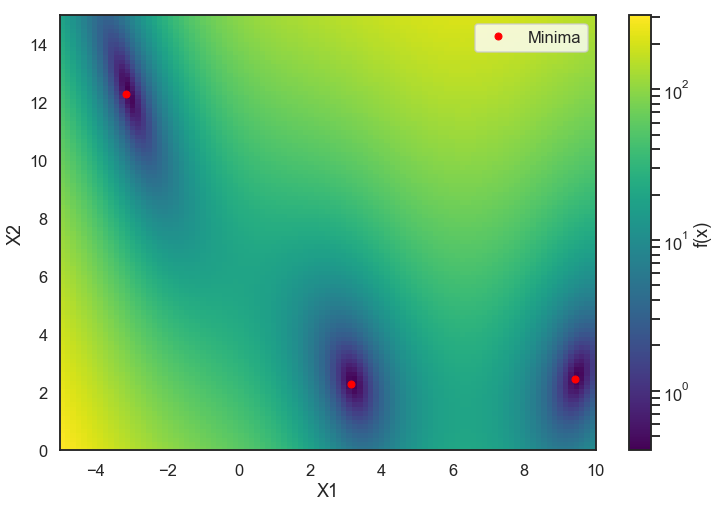

In [39]:
from matplotlib.colors import LogNorm

def plot_branin_with_minima():
    fig, ax = plt.subplots(figsize = (12,8))

    x1_values = np.linspace(-5, 10, 100)
    x2_values = np.linspace(0, 15, 100)
    x_ax, y_ax = np.meshgrid(x1_values, x2_values)
    vals = np.c_[x_ax.ravel(), y_ax.ravel()]
    fx = np.reshape([branin(val) for val in vals], (100, 100))

    cm = ax.pcolormesh(x_ax, y_ax, fx,
                       norm=LogNorm(vmin=fx.min(), 
                                    vmax=fx.max()))

    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    ax.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("f(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])

plot_branin_with_minima()

In [40]:
ntrain = 500 # number of initial training points
d = 2 # number of dimensions of the input features

X_train_norm = lhs(2, samples= ntrain, criterion='maximin') # Initial training points
X_train = np.zeros(X_train_norm.shape)
X_train[:,0] = X_train_norm[:,0]*15 - 5.
X_train[:,1] = X_train_norm[:,1]*15
Y_train = branin(X_train.T)
bounds = [(-5.0, 10.0), (0.0, 15.0)]

In [41]:
opt = Optimizer(bounds, base_estimator="llbnn", acq_func = 'EI',
                acq_optimizer = 'sampling', random_state = 123)

In [42]:
opt.acq_optimizer

'sampling'

In [43]:
opt.tell(X_train.tolist(), Y_train.tolist())

Epoch 1/3000
500/500 [==============================] - 0s 439us/step - loss: 5600.0858 - mean_squared_error: 5600.0858
Epoch 2/3000
500/500 [==============================] - 0s 31us/step - loss: 5581.7796 - mean_squared_error: 5581.7796
Epoch 3/3000
500/500 [==============================] - 0s 30us/step - loss: 5531.0701 - mean_squared_error: 5531.0701
Epoch 4/3000
500/500 [==============================] - 0s 33us/step - loss: 5414.9066 - mean_squared_error: 5414.9066
Epoch 5/3000
500/500 [==============================] - 0s 32us/step - loss: 5255.8211 - mean_squared_error: 5255.8211
Epoch 6/3000
500/500 [==============================] - 0s 32us/step - loss: 5117.9097 - mean_squared_error: 5117.9097
Epoch 7/3000
500/500 [==============================] - 0s 32us/step - loss: 5021.8384 - mean_squared_error: 5021.8384
Epoch 8/3000
500/500 [==============================] - 0s 31us/step - loss: 4943.0159 - mean_squared_error: 4943.0159
Epoch 9/3000
500/500 [=========================

500/500 [==============================] - 0s 32us/step - loss: 3143.1757 - mean_squared_error: 3143.1757
Epoch 70/3000
500/500 [==============================] - 0s 32us/step - loss: 3130.8497 - mean_squared_error: 3130.8497
Epoch 71/3000
500/500 [==============================] - 0s 31us/step - loss: 3118.7816 - mean_squared_error: 3118.7816
Epoch 72/3000
500/500 [==============================] - 0s 31us/step - loss: 3106.5987 - mean_squared_error: 3106.5987
Epoch 73/3000
500/500 [==============================] - 0s 31us/step - loss: 3095.3753 - mean_squared_error: 3095.3753
Epoch 74/3000
500/500 [==============================] - 0s 30us/step - loss: 3084.5609 - mean_squared_error: 3084.5609
Epoch 75/3000
500/500 [==============================] - 0s 30us/step - loss: 3073.0418 - mean_squared_error: 3073.0418
Epoch 76/3000
500/500 [==============================] - 0s 31us/step - loss: 3063.3537 - mean_squared_error: 3063.3537
Epoch 77/3000
500/500 [==============================]

500/500 [==============================] - 0s 30us/step - loss: 2780.4889 - mean_squared_error: 2780.4889
Epoch 138/3000
500/500 [==============================] - 0s 32us/step - loss: 2778.9355 - mean_squared_error: 2778.9355
Epoch 139/3000
500/500 [==============================] - 0s 32us/step - loss: 2777.9954 - mean_squared_error: 2777.9954
Epoch 140/3000
500/500 [==============================] - 0s 30us/step - loss: 2776.8747 - mean_squared_error: 2776.8747
Epoch 141/3000
500/500 [==============================] - 0s 28us/step - loss: 2775.8008 - mean_squared_error: 2775.8008
Epoch 142/3000
500/500 [==============================] - 0s 28us/step - loss: 2774.5684 - mean_squared_error: 2774.5684
Epoch 143/3000
500/500 [==============================] - 0s 32us/step - loss: 2773.7244 - mean_squared_error: 2773.7244
Epoch 144/3000
500/500 [==============================] - 0s 29us/step - loss: 2772.7008 - mean_squared_error: 2772.7008
Epoch 145/3000
500/500 [=======================

500/500 [==============================] - 0s 29us/step - loss: 2755.1658 - mean_squared_error: 2755.1658
Epoch 205/3000
500/500 [==============================] - 0s 33us/step - loss: 2755.1425 - mean_squared_error: 2755.1425
Epoch 206/3000
500/500 [==============================] - 0s 30us/step - loss: 2755.1755 - mean_squared_error: 2755.1755
Epoch 207/3000
500/500 [==============================] - 0s 27us/step - loss: 2755.1322 - mean_squared_error: 2755.1322
Epoch 208/3000
500/500 [==============================] - 0s 27us/step - loss: 2755.0372 - mean_squared_error: 2755.0372
Epoch 209/3000
500/500 [==============================] - 0s 29us/step - loss: 2755.2380 - mean_squared_error: 2755.2380
Epoch 210/3000
500/500 [==============================] - 0s 30us/step - loss: 2755.0946 - mean_squared_error: 2755.0946
Epoch 211/3000
500/500 [==============================] - 0s 30us/step - loss: 2755.0104 - mean_squared_error: 2755.0104
Epoch 212/3000
500/500 [=======================

500/500 [==============================] - 0s 30us/step - loss: 2754.7143 - mean_squared_error: 2754.7143
Epoch 272/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6384 - mean_squared_error: 2754.6384
Epoch 273/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.8880 - mean_squared_error: 2754.8880
Epoch 274/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.7130 - mean_squared_error: 2754.7130
Epoch 275/3000
500/500 [==============================] - 0s 28us/step - loss: 2754.7332 - mean_squared_error: 2754.7332
Epoch 276/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6505 - mean_squared_error: 2754.6505
Epoch 277/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7145 - mean_squared_error: 2754.7145
Epoch 278/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7098 - mean_squared_error: 2754.7098
Epoch 279/3000
500/500 [=======================

500/500 [==============================] - 0s 32us/step - loss: 2754.7610 - mean_squared_error: 2754.7610
Epoch 339/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6927 - mean_squared_error: 2754.6927
Epoch 340/3000
500/500 [==============================] - 0s 34us/step - loss: 2754.7299 - mean_squared_error: 2754.7299
Epoch 341/3000
500/500 [==============================] - 0s 34us/step - loss: 2754.7043 - mean_squared_error: 2754.7043
Epoch 342/3000
500/500 [==============================] - 0s 34us/step - loss: 2754.6748 - mean_squared_error: 2754.6748
Epoch 343/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7194 - mean_squared_error: 2754.7194
Epoch 344/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7905 - mean_squared_error: 2754.7905
Epoch 345/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.6934 - mean_squared_error: 2754.6934
Epoch 346/3000
500/500 [=======================

500/500 [==============================] - 0s 32us/step - loss: 2754.6823 - mean_squared_error: 2754.6823
Epoch 406/3000
500/500 [==============================] - 0s 34us/step - loss: 2754.8193 - mean_squared_error: 2754.8193
Epoch 407/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7471 - mean_squared_error: 2754.7471
Epoch 408/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7407 - mean_squared_error: 2754.7407
Epoch 409/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7885 - mean_squared_error: 2754.7885
Epoch 410/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.8578 - mean_squared_error: 2754.8578
Epoch 411/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6683 - mean_squared_error: 2754.6683
Epoch 412/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6902 - mean_squared_error: 2754.6902
Epoch 413/3000
500/500 [=======================

500/500 [==============================] - 0s 32us/step - loss: 2754.7024 - mean_squared_error: 2754.7024
Epoch 473/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6534 - mean_squared_error: 2754.6534
Epoch 474/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6829 - mean_squared_error: 2754.6829
Epoch 475/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7208 - mean_squared_error: 2754.7208
Epoch 476/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6557 - mean_squared_error: 2754.6557
Epoch 477/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7541 - mean_squared_error: 2754.7541
Epoch 478/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7390 - mean_squared_error: 2754.7390
Epoch 479/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6599 - mean_squared_error: 2754.6599
Epoch 480/3000
500/500 [=======================

500/500 [==============================] - 0s 30us/step - loss: 2754.7139 - mean_squared_error: 2754.7139
Epoch 540/3000
500/500 [==============================] - 0s 34us/step - loss: 2754.6898 - mean_squared_error: 2754.6898
Epoch 541/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6521 - mean_squared_error: 2754.6521
Epoch 542/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.8390 - mean_squared_error: 2754.8390
Epoch 543/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7094 - mean_squared_error: 2754.7094
Epoch 544/3000
500/500 [==============================] - 0s 33us/step - loss: 2755.0284 - mean_squared_error: 2755.0284
Epoch 545/3000
500/500 [==============================] - 0s 28us/step - loss: 2754.8538 - mean_squared_error: 2754.8538
Epoch 546/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.9417 - mean_squared_error: 2754.9417
Epoch 547/3000
500/500 [=======================

500/500 [==============================] - 0s 30us/step - loss: 2754.6762 - mean_squared_error: 2754.6762
Epoch 607/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.6634 - mean_squared_error: 2754.6634
Epoch 608/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6740 - mean_squared_error: 2754.6740
Epoch 609/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.8120 - mean_squared_error: 2754.8120
Epoch 610/3000
500/500 [==============================] - 0s 30us/step - loss: 2755.0605 - mean_squared_error: 2755.0605
Epoch 611/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6457 - mean_squared_error: 2754.6457
Epoch 612/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6598 - mean_squared_error: 2754.6598
Epoch 613/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.7136 - mean_squared_error: 2754.7136
Epoch 614/3000
500/500 [=======================

500/500 [==============================] - 0s 32us/step - loss: 2754.7286 - mean_squared_error: 2754.7286
Epoch 674/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.7272 - mean_squared_error: 2754.7272
Epoch 675/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7636 - mean_squared_error: 2754.7636
Epoch 676/3000
500/500 [==============================] - 0s 34us/step - loss: 2754.7689 - mean_squared_error: 2754.7689
Epoch 677/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.8634 - mean_squared_error: 2754.8634
Epoch 678/3000
500/500 [==============================] - 0s 37us/step - loss: 2754.6868 - mean_squared_error: 2754.6868
Epoch 679/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6663 - mean_squared_error: 2754.6663
Epoch 680/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.7197 - mean_squared_error: 2754.7197
Epoch 681/3000
500/500 [=======================

500/500 [==============================] - 0s 32us/step - loss: 2754.7656 - mean_squared_error: 2754.7656
Epoch 741/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.9845 - mean_squared_error: 2754.9845
Epoch 742/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7998 - mean_squared_error: 2754.7998
Epoch 743/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7045 - mean_squared_error: 2754.7045
Epoch 744/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.8270 - mean_squared_error: 2754.8270
Epoch 745/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.7242 - mean_squared_error: 2754.7242
Epoch 746/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6973 - mean_squared_error: 2754.6973
Epoch 747/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7861 - mean_squared_error: 2754.7861
Epoch 748/3000
500/500 [=======================

500/500 [==============================] - 0s 29us/step - loss: 2754.7442 - mean_squared_error: 2754.7442
Epoch 808/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7427 - mean_squared_error: 2754.7427
Epoch 809/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.7274 - mean_squared_error: 2754.7274
Epoch 810/3000
500/500 [==============================] - 0s 27us/step - loss: 2754.7150 - mean_squared_error: 2754.7150
Epoch 811/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7053 - mean_squared_error: 2754.7053
Epoch 812/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7441 - mean_squared_error: 2754.7441
Epoch 813/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6486 - mean_squared_error: 2754.6486
Epoch 814/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.7098 - mean_squared_error: 2754.7098
Epoch 815/3000
500/500 [=======================

500/500 [==============================] - 0s 34us/step - loss: 2754.7006 - mean_squared_error: 2754.7006
Epoch 875/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6541 - mean_squared_error: 2754.6541
Epoch 876/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6890 - mean_squared_error: 2754.6890
Epoch 877/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6940 - mean_squared_error: 2754.6940
Epoch 878/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7678 - mean_squared_error: 2754.7678
Epoch 879/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.6610 - mean_squared_error: 2754.6610
Epoch 880/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.6741 - mean_squared_error: 2754.6741
Epoch 881/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7125 - mean_squared_error: 2754.7125
Epoch 882/3000
500/500 [=======================

500/500 [==============================] - 0s 31us/step - loss: 2754.6665 - mean_squared_error: 2754.6665
Epoch 942/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7135 - mean_squared_error: 2754.7135
Epoch 943/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.6826 - mean_squared_error: 2754.6826
Epoch 944/3000
500/500 [==============================] - 0s 31us/step - loss: 2755.0387 - mean_squared_error: 2755.0387
Epoch 945/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6608 - mean_squared_error: 2754.6608
Epoch 946/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6972 - mean_squared_error: 2754.6972
Epoch 947/3000
500/500 [==============================] - 0s 32us/step - loss: 2755.0077 - mean_squared_error: 2755.0077
Epoch 948/3000
500/500 [==============================] - 0s 28us/step - loss: 2754.7678 - mean_squared_error: 2754.7678
Epoch 949/3000
500/500 [=======================

500/500 [==============================] - 0s 34us/step - loss: 2754.7262 - mean_squared_error: 2754.7262
Epoch 1009/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7936 - mean_squared_error: 2754.7936
Epoch 1010/3000
500/500 [==============================] - 0s 34us/step - loss: 2754.8734 - mean_squared_error: 2754.8734
Epoch 1011/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.7162 - mean_squared_error: 2754.7162
Epoch 1012/3000
500/500 [==============================] - 0s 32us/step - loss: 2755.0306 - mean_squared_error: 2755.0306
Epoch 1013/3000
500/500 [==============================] - 0s 30us/step - loss: 2755.1088 - mean_squared_error: 2755.1088
Epoch 1014/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7262 - mean_squared_error: 2754.7262
Epoch 1015/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.6683 - mean_squared_error: 2754.6683
Epoch 1016/3000
500/500 [===============

500/500 [==============================] - 0s 32us/step - loss: 2754.7159 - mean_squared_error: 2754.7159
Epoch 1076/3000
500/500 [==============================] - 0s 32us/step - loss: 2755.0483 - mean_squared_error: 2755.0483
Epoch 1077/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6632 - mean_squared_error: 2754.6632
Epoch 1078/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7179 - mean_squared_error: 2754.7179
Epoch 1079/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6580 - mean_squared_error: 2754.6580
Epoch 1080/3000
500/500 [==============================] - 0s 28us/step - loss: 2754.9619 - mean_squared_error: 2754.9619
Epoch 1081/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7926 - mean_squared_error: 2754.7926
Epoch 1082/3000
500/500 [==============================] - 0s 28us/step - loss: 2754.6815 - mean_squared_error: 2754.6815
Epoch 1083/3000
500/500 [===============

500/500 [==============================] - 0s 31us/step - loss: 2754.7305 - mean_squared_error: 2754.7305
Epoch 1143/3000
500/500 [==============================] - 0s 34us/step - loss: 2754.6731 - mean_squared_error: 2754.6731
Epoch 1144/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.6746 - mean_squared_error: 2754.6746
Epoch 1145/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7086 - mean_squared_error: 2754.7086
Epoch 1146/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6851 - mean_squared_error: 2754.6851
Epoch 1147/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7132 - mean_squared_error: 2754.7132
Epoch 1148/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7953 - mean_squared_error: 2754.7953
Epoch 1149/3000
500/500 [==============================] - 0s 36us/step - loss: 2755.0078 - mean_squared_error: 2755.0078
Epoch 1150/3000
500/500 [===============

500/500 [==============================] - 0s 31us/step - loss: 2754.6864 - mean_squared_error: 2754.6864
Epoch 1210/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6924 - mean_squared_error: 2754.6924
Epoch 1211/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6998 - mean_squared_error: 2754.6998
Epoch 1212/3000
500/500 [==============================] - 0s 34us/step - loss: 2754.6537 - mean_squared_error: 2754.6537
Epoch 1213/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7808 - mean_squared_error: 2754.7808
Epoch 1214/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.6762 - mean_squared_error: 2754.6762
Epoch 1215/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6510 - mean_squared_error: 2754.6510
Epoch 1216/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7426 - mean_squared_error: 2754.7426
Epoch 1217/3000
500/500 [===============

500/500 [==============================] - 0s 27us/step - loss: 2755.4464 - mean_squared_error: 2755.4464
Epoch 1277/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7375 - mean_squared_error: 2754.7375
Epoch 1278/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.7257 - mean_squared_error: 2754.7257
Epoch 1279/3000
500/500 [==============================] - 0s 27us/step - loss: 2754.6818 - mean_squared_error: 2754.6818
Epoch 1280/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6972 - mean_squared_error: 2754.6972
Epoch 1281/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7924 - mean_squared_error: 2754.7924
Epoch 1282/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7140 - mean_squared_error: 2754.7140
Epoch 1283/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6848 - mean_squared_error: 2754.6848
Epoch 1284/3000
500/500 [===============

500/500 [==============================] - 0s 31us/step - loss: 2754.6862 - mean_squared_error: 2754.6862
Epoch 1344/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6652 - mean_squared_error: 2754.6652
Epoch 1345/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.7045 - mean_squared_error: 2754.7045
Epoch 1346/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7279 - mean_squared_error: 2754.7279
Epoch 1347/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6547 - mean_squared_error: 2754.6547
Epoch 1348/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7046 - mean_squared_error: 2754.7046
Epoch 1349/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7498 - mean_squared_error: 2754.7498
Epoch 1350/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6768 - mean_squared_error: 2754.6768
Epoch 1351/3000
500/500 [===============

500/500 [==============================] - 0s 32us/step - loss: 2754.7122 - mean_squared_error: 2754.7122
Epoch 1411/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.8687 - mean_squared_error: 2754.8687
Epoch 1412/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6472 - mean_squared_error: 2754.6472
Epoch 1413/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.6732 - mean_squared_error: 2754.6732
Epoch 1414/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.7656 - mean_squared_error: 2754.7656
Epoch 1415/3000
500/500 [==============================] - 0s 30us/step - loss: 2755.0403 - mean_squared_error: 2755.0403
Epoch 1416/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6691 - mean_squared_error: 2754.6691
Epoch 1417/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6929 - mean_squared_error: 2754.6929
Epoch 1418/3000
500/500 [===============

500/500 [==============================] - 0s 33us/step - loss: 2754.6905 - mean_squared_error: 2754.6905
Epoch 1478/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.6876 - mean_squared_error: 2754.6876
Epoch 1479/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.6611 - mean_squared_error: 2754.6611
Epoch 1480/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7461 - mean_squared_error: 2754.7461
Epoch 1481/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.7289 - mean_squared_error: 2754.7289
Epoch 1482/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.6628 - mean_squared_error: 2754.6628
Epoch 1483/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7170 - mean_squared_error: 2754.7170
Epoch 1484/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6776 - mean_squared_error: 2754.6776
Epoch 1485/3000
500/500 [===============

500/500 [==============================] - 0s 31us/step - loss: 2754.6673 - mean_squared_error: 2754.6673
Epoch 1545/3000
500/500 [==============================] - 0s 34us/step - loss: 2754.7882 - mean_squared_error: 2754.7882
Epoch 1546/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7380 - mean_squared_error: 2754.7380
Epoch 1547/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.8253 - mean_squared_error: 2754.8253
Epoch 1548/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.6909 - mean_squared_error: 2754.6909
Epoch 1549/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6830 - mean_squared_error: 2754.6830
Epoch 1550/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6664 - mean_squared_error: 2754.6664
Epoch 1551/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.7154 - mean_squared_error: 2754.7154
Epoch 1552/3000
500/500 [===============

500/500 [==============================] - 0s 32us/step - loss: 2754.6817 - mean_squared_error: 2754.6817
Epoch 1612/3000
500/500 [==============================] - 0s 34us/step - loss: 2754.7263 - mean_squared_error: 2754.7263
Epoch 1613/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.7244 - mean_squared_error: 2754.7244
Epoch 1614/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7088 - mean_squared_error: 2754.7088
Epoch 1615/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7020 - mean_squared_error: 2754.7020
Epoch 1616/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6758 - mean_squared_error: 2754.6758
Epoch 1617/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.8075 - mean_squared_error: 2754.8075
Epoch 1618/3000
500/500 [==============================] - 0s 28us/step - loss: 2754.7062 - mean_squared_error: 2754.7062
Epoch 1619/3000
500/500 [===============

500/500 [==============================] - 0s 30us/step - loss: 2449.7161 - mean_squared_error: 2449.7161
Epoch 1679/3000
500/500 [==============================] - 0s 31us/step - loss: 2446.6154 - mean_squared_error: 2446.6154
Epoch 1680/3000
500/500 [==============================] - 0s 30us/step - loss: 2445.4729 - mean_squared_error: 2445.4729
Epoch 1681/3000
500/500 [==============================] - 0s 30us/step - loss: 2439.9306 - mean_squared_error: 2439.9306
Epoch 1682/3000
500/500 [==============================] - 0s 34us/step - loss: 2439.3694 - mean_squared_error: 2439.3694
Epoch 1683/3000
500/500 [==============================] - 0s 35us/step - loss: 2431.5678 - mean_squared_error: 2431.5678
Epoch 1684/3000
500/500 [==============================] - 0s 33us/step - loss: 2427.8203 - mean_squared_error: 2427.8203
Epoch 1685/3000
500/500 [==============================] - 0s 32us/step - loss: 2428.0703 - mean_squared_error: 2428.0703
Epoch 1686/3000
500/500 [===============

500/500 [==============================] - 0s 34us/step - loss: 2386.1920 - mean_squared_error: 2386.1920
Epoch 1746/3000
500/500 [==============================] - 0s 37us/step - loss: 2386.9029 - mean_squared_error: 2386.9029
Epoch 1747/3000
500/500 [==============================] - 0s 32us/step - loss: 2388.1405 - mean_squared_error: 2388.1405
Epoch 1748/3000
500/500 [==============================] - 0s 35us/step - loss: 2386.7688 - mean_squared_error: 2386.7688
Epoch 1749/3000
500/500 [==============================] - 0s 34us/step - loss: 2385.3247 - mean_squared_error: 2385.3247
Epoch 1750/3000
500/500 [==============================] - 0s 34us/step - loss: 2385.9546 - mean_squared_error: 2385.9546
Epoch 1751/3000
500/500 [==============================] - 0s 34us/step - loss: 2385.8924 - mean_squared_error: 2385.8924
Epoch 1752/3000
500/500 [==============================] - 0s 34us/step - loss: 2384.3807 - mean_squared_error: 2384.3807
Epoch 1753/3000
500/500 [===============

500/500 [==============================] - 0s 31us/step - loss: 2143.9026 - mean_squared_error: 2143.9026
Epoch 1813/3000
500/500 [==============================] - 0s 31us/step - loss: 2110.3173 - mean_squared_error: 2110.3173
Epoch 1814/3000
500/500 [==============================] - 0s 33us/step - loss: 2053.1864 - mean_squared_error: 2053.1864
Epoch 1815/3000
500/500 [==============================] - 0s 32us/step - loss: 2025.2838 - mean_squared_error: 2025.2838
Epoch 1816/3000
500/500 [==============================] - 0s 32us/step - loss: 1990.6189 - mean_squared_error: 1990.6189
Epoch 1817/3000
500/500 [==============================] - 0s 32us/step - loss: 1982.5920 - mean_squared_error: 1982.5920
Epoch 1818/3000
500/500 [==============================] - 0s 31us/step - loss: 1959.0341 - mean_squared_error: 1959.0341
Epoch 1819/3000
500/500 [==============================] - 0s 31us/step - loss: 1953.0926 - mean_squared_error: 1953.0926
Epoch 1820/3000
500/500 [===============

500/500 [==============================] - 0s 36us/step - loss: 1726.7056 - mean_squared_error: 1726.7056
Epoch 1880/3000
500/500 [==============================] - 0s 31us/step - loss: 1721.7874 - mean_squared_error: 1721.7874
Epoch 1881/3000
500/500 [==============================] - 0s 30us/step - loss: 1712.6599 - mean_squared_error: 1712.6599
Epoch 1882/3000
500/500 [==============================] - 0s 31us/step - loss: 1698.4034 - mean_squared_error: 1698.4034
Epoch 1883/3000
500/500 [==============================] - 0s 30us/step - loss: 1696.5980 - mean_squared_error: 1696.5980
Epoch 1884/3000
500/500 [==============================] - 0s 31us/step - loss: 1686.8837 - mean_squared_error: 1686.8837
Epoch 1885/3000
500/500 [==============================] - 0s 32us/step - loss: 1669.8665 - mean_squared_error: 1669.8665
Epoch 1886/3000
500/500 [==============================] - 0s 32us/step - loss: 1654.6453 - mean_squared_error: 1654.6453
Epoch 1887/3000
500/500 [===============

500/500 [==============================] - 0s 31us/step - loss: 558.6883 - mean_squared_error: 558.6883
Epoch 1947/3000
500/500 [==============================] - 0s 30us/step - loss: 551.7742 - mean_squared_error: 551.7742
Epoch 1948/3000
500/500 [==============================] - 0s 30us/step - loss: 549.5300 - mean_squared_error: 549.5300
Epoch 1949/3000
500/500 [==============================] - 0s 32us/step - loss: 539.4143 - mean_squared_error: 539.4143
Epoch 1950/3000
500/500 [==============================] - 0s 31us/step - loss: 534.1678 - mean_squared_error: 534.1678
Epoch 1951/3000
500/500 [==============================] - 0s 31us/step - loss: 527.3326 - mean_squared_error: 527.3326
Epoch 1952/3000
500/500 [==============================] - 0s 31us/step - loss: 521.9379 - mean_squared_error: 521.9379
Epoch 1953/3000
500/500 [==============================] - 0s 31us/step - loss: 516.5456 - mean_squared_error: 516.5456
Epoch 1954/3000
500/500 [==============================]

500/500 [==============================] - 0s 31us/step - loss: 297.6978 - mean_squared_error: 297.6978
Epoch 2015/3000
500/500 [==============================] - 0s 32us/step - loss: 294.5982 - mean_squared_error: 294.5982
Epoch 2016/3000
500/500 [==============================] - 0s 31us/step - loss: 291.2918 - mean_squared_error: 291.2918
Epoch 2017/3000
500/500 [==============================] - 0s 31us/step - loss: 289.9003 - mean_squared_error: 289.9003
Epoch 2018/3000
500/500 [==============================] - 0s 30us/step - loss: 287.8700 - mean_squared_error: 287.8700
Epoch 2019/3000
500/500 [==============================] - 0s 32us/step - loss: 287.4651 - mean_squared_error: 287.4651
Epoch 2020/3000
500/500 [==============================] - 0s 33us/step - loss: 284.1372 - mean_squared_error: 284.1372
Epoch 2021/3000
500/500 [==============================] - 0s 32us/step - loss: 283.7852 - mean_squared_error: 283.7852
Epoch 2022/3000
500/500 [==============================]

500/500 [==============================] - 0s 30us/step - loss: 199.4794 - mean_squared_error: 199.4794
Epoch 2083/3000
500/500 [==============================] - 0s 30us/step - loss: 196.5758 - mean_squared_error: 196.5758
Epoch 2084/3000
500/500 [==============================] - 0s 29us/step - loss: 196.0514 - mean_squared_error: 196.0514
Epoch 2085/3000
500/500 [==============================] - 0s 31us/step - loss: 196.5490 - mean_squared_error: 196.5490
Epoch 2086/3000
500/500 [==============================] - 0s 31us/step - loss: 196.1884 - mean_squared_error: 196.1884
Epoch 2087/3000
500/500 [==============================] - 0s 30us/step - loss: 193.7963 - mean_squared_error: 193.7963
Epoch 2088/3000
500/500 [==============================] - 0s 30us/step - loss: 191.6061 - mean_squared_error: 191.6061
Epoch 2089/3000
500/500 [==============================] - 0s 30us/step - loss: 190.3177 - mean_squared_error: 190.3177
Epoch 2090/3000
500/500 [==============================]

500/500 [==============================] - 0s 30us/step - loss: 128.1370 - mean_squared_error: 128.1370
Epoch 2151/3000
500/500 [==============================] - 0s 31us/step - loss: 126.5748 - mean_squared_error: 126.5748
Epoch 2152/3000
500/500 [==============================] - 0s 29us/step - loss: 123.7741 - mean_squared_error: 123.7741
Epoch 2153/3000
500/500 [==============================] - 0s 30us/step - loss: 123.7216 - mean_squared_error: 123.7216
Epoch 2154/3000
500/500 [==============================] - 0s 31us/step - loss: 124.3710 - mean_squared_error: 124.3710
Epoch 2155/3000
500/500 [==============================] - 0s 30us/step - loss: 122.6767 - mean_squared_error: 122.6767
Epoch 2156/3000
500/500 [==============================] - 0s 33us/step - loss: 121.7829 - mean_squared_error: 121.7829
Epoch 2157/3000
500/500 [==============================] - 0s 32us/step - loss: 120.4715 - mean_squared_error: 120.4715
Epoch 2158/3000
500/500 [==============================]

500/500 [==============================] - 0s 32us/step - loss: 76.1281 - mean_squared_error: 76.1281
Epoch 2220/3000
500/500 [==============================] - 0s 31us/step - loss: 74.4127 - mean_squared_error: 74.4127
Epoch 2221/3000
500/500 [==============================] - 0s 32us/step - loss: 73.6676 - mean_squared_error: 73.6676
Epoch 2222/3000
500/500 [==============================] - 0s 32us/step - loss: 73.2203 - mean_squared_error: 73.2203
Epoch 2223/3000
500/500 [==============================] - 0s 31us/step - loss: 72.7874 - mean_squared_error: 72.7874
Epoch 2224/3000
500/500 [==============================] - 0s 32us/step - loss: 72.3668 - mean_squared_error: 72.3668
Epoch 2225/3000
500/500 [==============================] - 0s 30us/step - loss: 72.0641 - mean_squared_error: 72.0641
Epoch 2226/3000
500/500 [==============================] - 0s 31us/step - loss: 71.6155 - mean_squared_error: 71.6155
Epoch 2227/3000
500/500 [==============================] - 0s 31us/step 

500/500 [==============================] - 0s 31us/step - loss: 49.2288 - mean_squared_error: 49.2288
Epoch 2289/3000
500/500 [==============================] - 0s 29us/step - loss: 49.2374 - mean_squared_error: 49.2374
Epoch 2290/3000
500/500 [==============================] - 0s 30us/step - loss: 48.9484 - mean_squared_error: 48.9484
Epoch 2291/3000
500/500 [==============================] - 0s 30us/step - loss: 49.4186 - mean_squared_error: 49.4186
Epoch 2292/3000
500/500 [==============================] - 0s 29us/step - loss: 50.0358 - mean_squared_error: 50.0358
Epoch 2293/3000
500/500 [==============================] - 0s 29us/step - loss: 49.7198 - mean_squared_error: 49.7198
Epoch 2294/3000
500/500 [==============================] - 0s 30us/step - loss: 48.7954 - mean_squared_error: 48.7954
Epoch 2295/3000
500/500 [==============================] - 0s 30us/step - loss: 47.6383 - mean_squared_error: 47.6383
Epoch 2296/3000
500/500 [==============================] - 0s 30us/step 

500/500 [==============================] - 0s 32us/step - loss: 33.2775 - mean_squared_error: 33.2775
Epoch 2358/3000
500/500 [==============================] - 0s 32us/step - loss: 33.2816 - mean_squared_error: 33.2816
Epoch 2359/3000
500/500 [==============================] - 0s 30us/step - loss: 33.1926 - mean_squared_error: 33.1926
Epoch 2360/3000
500/500 [==============================] - 0s 31us/step - loss: 33.1030 - mean_squared_error: 33.1030
Epoch 2361/3000
500/500 [==============================] - 0s 30us/step - loss: 32.6426 - mean_squared_error: 32.6426
Epoch 2362/3000
500/500 [==============================] - 0s 32us/step - loss: 32.2313 - mean_squared_error: 32.2313
Epoch 2363/3000
500/500 [==============================] - 0s 29us/step - loss: 32.1204 - mean_squared_error: 32.1204
Epoch 2364/3000
500/500 [==============================] - 0s 31us/step - loss: 32.0017 - mean_squared_error: 32.0017
Epoch 2365/3000
500/500 [==============================] - 0s 28us/step 

500/500 [==============================] - 0s 29us/step - loss: 22.0696 - mean_squared_error: 22.0696
Epoch 2427/3000
500/500 [==============================] - 0s 30us/step - loss: 22.0754 - mean_squared_error: 22.0754
Epoch 2428/3000
500/500 [==============================] - 0s 27us/step - loss: 21.9491 - mean_squared_error: 21.9491
Epoch 2429/3000
500/500 [==============================] - 0s 28us/step - loss: 22.0882 - mean_squared_error: 22.0882
Epoch 2430/3000
500/500 [==============================] - 0s 28us/step - loss: 21.8268 - mean_squared_error: 21.8268
Epoch 2431/3000
500/500 [==============================] - 0s 28us/step - loss: 21.6779 - mean_squared_error: 21.6779
Epoch 2432/3000
500/500 [==============================] - 0s 29us/step - loss: 21.3637 - mean_squared_error: 21.3637
Epoch 2433/3000
500/500 [==============================] - 0s 29us/step - loss: 21.2953 - mean_squared_error: 21.2953
Epoch 2434/3000
500/500 [==============================] - 0s 30us/step 

500/500 [==============================] - 0s 31us/step - loss: 15.2456 - mean_squared_error: 15.2456
Epoch 2496/3000
500/500 [==============================] - 0s 34us/step - loss: 15.0837 - mean_squared_error: 15.0837
Epoch 2497/3000
500/500 [==============================] - 0s 30us/step - loss: 14.8833 - mean_squared_error: 14.8833
Epoch 2498/3000
500/500 [==============================] - 0s 29us/step - loss: 14.7593 - mean_squared_error: 14.7593
Epoch 2499/3000
500/500 [==============================] - 0s 31us/step - loss: 14.6013 - mean_squared_error: 14.6013
Epoch 2500/3000
500/500 [==============================] - 0s 29us/step - loss: 14.5959 - mean_squared_error: 14.5959
Epoch 2501/3000
500/500 [==============================] - 0s 31us/step - loss: 14.9368 - mean_squared_error: 14.9368
Epoch 2502/3000
500/500 [==============================] - 0s 31us/step - loss: 14.5564 - mean_squared_error: 14.5564
Epoch 2503/3000
500/500 [==============================] - 0s 31us/step 

500/500 [==============================] - 0s 30us/step - loss: 10.2306 - mean_squared_error: 10.2306
Epoch 2565/3000
500/500 [==============================] - 0s 32us/step - loss: 10.1967 - mean_squared_error: 10.1967
Epoch 2566/3000
500/500 [==============================] - 0s 29us/step - loss: 10.5237 - mean_squared_error: 10.5237
Epoch 2567/3000
500/500 [==============================] - 0s 31us/step - loss: 10.0553 - mean_squared_error: 10.0553
Epoch 2568/3000
500/500 [==============================] - 0s 29us/step - loss: 9.8699 - mean_squared_error: 9.8699
Epoch 2569/3000
500/500 [==============================] - 0s 27us/step - loss: 9.9811 - mean_squared_error: 9.9811
Epoch 2570/3000
500/500 [==============================] - 0s 30us/step - loss: 9.6541 - mean_squared_error: 9.6541
Epoch 2571/3000
500/500 [==============================] - 0s 29us/step - loss: 9.8436 - mean_squared_error: 9.8436
Epoch 2572/3000
500/500 [==============================] - 0s 28us/step - loss: 

500/500 [==============================] - 0s 31us/step - loss: 6.8768 - mean_squared_error: 6.8768
Epoch 2635/3000
500/500 [==============================] - 0s 28us/step - loss: 6.8960 - mean_squared_error: 6.8960
Epoch 2636/3000
500/500 [==============================] - 0s 26us/step - loss: 6.6149 - mean_squared_error: 6.6149
Epoch 2637/3000
500/500 [==============================] - 0s 29us/step - loss: 6.4838 - mean_squared_error: 6.4838
Epoch 2638/3000
500/500 [==============================] - 0s 30us/step - loss: 6.3986 - mean_squared_error: 6.3986
Epoch 2639/3000
500/500 [==============================] - 0s 29us/step - loss: 6.4121 - mean_squared_error: 6.4121
Epoch 2640/3000
500/500 [==============================] - 0s 32us/step - loss: 6.4921 - mean_squared_error: 6.4921
Epoch 2641/3000
500/500 [==============================] - 0s 31us/step - loss: 6.5402 - mean_squared_error: 6.5402
Epoch 2642/3000
500/500 [==============================] - 0s 32us/step - loss: 6.5338 -

500/500 [==============================] - 0s 30us/step - loss: 4.8259 - mean_squared_error: 4.8259
Epoch 2705/3000
500/500 [==============================] - 0s 32us/step - loss: 4.6589 - mean_squared_error: 4.6589
Epoch 2706/3000
500/500 [==============================] - 0s 30us/step - loss: 4.8588 - mean_squared_error: 4.8588
Epoch 2707/3000
500/500 [==============================] - 0s 31us/step - loss: 4.8234 - mean_squared_error: 4.8234
Epoch 2708/3000
500/500 [==============================] - 0s 31us/step - loss: 4.7344 - mean_squared_error: 4.7344
Epoch 2709/3000
500/500 [==============================] - 0s 29us/step - loss: 4.5040 - mean_squared_error: 4.5040
Epoch 2710/3000
500/500 [==============================] - 0s 29us/step - loss: 4.3838 - mean_squared_error: 4.3838
Epoch 2711/3000
500/500 [==============================] - 0s 29us/step - loss: 4.4057 - mean_squared_error: 4.4057
Epoch 2712/3000
500/500 [==============================] - 0s 30us/step - loss: 4.3734 -

500/500 [==============================] - 0s 31us/step - loss: 3.2610 - mean_squared_error: 3.2610
Epoch 2775/3000
500/500 [==============================] - 0s 31us/step - loss: 3.3377 - mean_squared_error: 3.3377
Epoch 2776/3000
500/500 [==============================] - 0s 29us/step - loss: 3.2850 - mean_squared_error: 3.2850
Epoch 2777/3000
500/500 [==============================] - 0s 29us/step - loss: 3.2918 - mean_squared_error: 3.2918
Epoch 2778/3000
500/500 [==============================] - 0s 28us/step - loss: 3.1810 - mean_squared_error: 3.1810
Epoch 2779/3000
500/500 [==============================] - 0s 28us/step - loss: 3.2728 - mean_squared_error: 3.2728
Epoch 2780/3000
500/500 [==============================] - 0s 28us/step - loss: 3.4436 - mean_squared_error: 3.4436
Epoch 2781/3000
500/500 [==============================] - 0s 30us/step - loss: 3.3398 - mean_squared_error: 3.3398
Epoch 2782/3000
500/500 [==============================] - 0s 30us/step - loss: 3.2789 -

500/500 [==============================] - 0s 29us/step - loss: 2.9031 - mean_squared_error: 2.9031
Epoch 2845/3000
500/500 [==============================] - 0s 30us/step - loss: 2.6797 - mean_squared_error: 2.6797
Epoch 2846/3000
500/500 [==============================] - 0s 27us/step - loss: 2.5066 - mean_squared_error: 2.5066
Epoch 2847/3000
500/500 [==============================] - 0s 25us/step - loss: 2.4409 - mean_squared_error: 2.4409
Epoch 2848/3000
500/500 [==============================] - 0s 28us/step - loss: 2.4449 - mean_squared_error: 2.4449
Epoch 2849/3000
500/500 [==============================] - 0s 28us/step - loss: 2.6312 - mean_squared_error: 2.6312
Epoch 2850/3000
500/500 [==============================] - 0s 27us/step - loss: 2.3983 - mean_squared_error: 2.3983
Epoch 2851/3000
500/500 [==============================] - 0s 29us/step - loss: 2.6209 - mean_squared_error: 2.6209
Epoch 2852/3000
500/500 [==============================] - 0s 28us/step - loss: 2.6788 -

500/500 [==============================] - 0s 32us/step - loss: 2.2575 - mean_squared_error: 2.2575
Epoch 2915/3000
500/500 [==============================] - 0s 30us/step - loss: 2.0138 - mean_squared_error: 2.0138
Epoch 2916/3000
500/500 [==============================] - 0s 29us/step - loss: 1.9266 - mean_squared_error: 1.9266
Epoch 2917/3000
500/500 [==============================] - 0s 29us/step - loss: 1.8482 - mean_squared_error: 1.8482
Epoch 2918/3000
500/500 [==============================] - 0s 28us/step - loss: 1.7898 - mean_squared_error: 1.7898
Epoch 2919/3000
500/500 [==============================] - 0s 28us/step - loss: 1.7698 - mean_squared_error: 1.7698
Epoch 2920/3000
500/500 [==============================] - 0s 28us/step - loss: 1.8516 - mean_squared_error: 1.8516
Epoch 2921/3000
500/500 [==============================] - 0s 26us/step - loss: 1.9113 - mean_squared_error: 1.9113
Epoch 2922/3000
500/500 [==============================] - 0s 26us/step - loss: 1.8716 -

500/500 [==============================] - 0s 29us/step - loss: 1.4337 - mean_squared_error: 1.4337
Epoch 2985/3000
500/500 [==============================] - 0s 30us/step - loss: 1.3767 - mean_squared_error: 1.3767
Epoch 2986/3000
500/500 [==============================] - 0s 25us/step - loss: 1.3440 - mean_squared_error: 1.3440
Epoch 2987/3000
500/500 [==============================] - 0s 29us/step - loss: 1.3614 - mean_squared_error: 1.3614
Epoch 2988/3000
500/500 [==============================] - 0s 30us/step - loss: 1.3561 - mean_squared_error: 1.3561
Epoch 2989/3000
500/500 [==============================] - 0s 29us/step - loss: 1.3294 - mean_squared_error: 1.3294
Epoch 2990/3000
500/500 [==============================] - 0s 29us/step - loss: 1.3453 - mean_squared_error: 1.3453
Epoch 2991/3000
500/500 [==============================] - 0s 30us/step - loss: 1.3477 - mean_squared_error: 1.3477
Epoch 2992/3000
500/500 [==============================] - 0s 31us/step - loss: 1.2824 -

          fun: 0.5041852448099746
    func_vals: array([ 71.42801526,   6.5590623 ,  21.35667714,  47.21753534,
       102.06699278,  28.18045155,  10.78563773,  47.87856911,
        50.82292568, 132.71480002,  23.57686332,  30.59904501,
        10.3626141 ,  63.23861349,  24.03202862,  11.49840998,
       143.12931299,  61.81806261,  10.80135053,  28.44401395,
        28.42213382,   1.12069151, 146.3223977 ,  54.57847719,
       179.38922602,  26.60363624,  29.70975575, 104.40012407,
       110.89348513,  52.71813616,  18.87412247,  68.07632418,
        89.02260203,  15.2631475 ,  11.83011193, 165.10252008,
        49.70074359,  17.52459929, 107.33913329,  24.7049005 ,
        37.05278824,  83.25938969,  22.74347587,  19.21010399,
       143.81773492,  46.68308626,   1.56638671,   1.05411363,
       131.46639775,   0.86661859,  46.986303  ,  10.70777203,
         7.39117035,   2.43787794, 106.36099249,   1.97717826,
        18.66745157, 222.30683188,  29.98208337,  13.31067664,
      

In [44]:
qei_args_dict = {'num_sampled_points': 3,
               'num_batches_eval' : 4000,
               'strategy_batch_selection' : 'random'}

rui_ei_args_dict = {'num_sampled_points': 5}

In [45]:
r = opt.ask(n_points= 5)

Epoch 1/3000
500/500 [==============================] - 0s 518us/step - loss: 5601.4791 - mean_squared_error: 5601.4791
Epoch 2/3000
500/500 [==============================] - 0s 31us/step - loss: 5587.5893 - mean_squared_error: 5587.5893
Epoch 3/3000
500/500 [==============================] - 0s 32us/step - loss: 5545.2967 - mean_squared_error: 5545.2967
Epoch 4/3000
500/500 [==============================] - 0s 30us/step - loss: 5442.8439 - mean_squared_error: 5442.8439
Epoch 5/3000
500/500 [==============================] - 0s 31us/step - loss: 5297.4539 - mean_squared_error: 5297.4539
Epoch 6/3000
500/500 [==============================] - 0s 31us/step - loss: 5170.0836 - mean_squared_error: 5170.0836
Epoch 7/3000
500/500 [==============================] - 0s 30us/step - loss: 5072.4210 - mean_squared_error: 5072.4210
Epoch 8/3000
500/500 [==============================] - 0s 30us/step - loss: 4996.5304 - mean_squared_error: 4996.5304
Epoch 9/3000
500/500 [=========================

500/500 [==============================] - 0s 33us/step - loss: 3163.1418 - mean_squared_error: 3163.1418
Epoch 70/3000
500/500 [==============================] - 0s 35us/step - loss: 3150.0997 - mean_squared_error: 3150.0997
Epoch 71/3000
500/500 [==============================] - 0s 32us/step - loss: 3137.3171 - mean_squared_error: 3137.3171
Epoch 72/3000
500/500 [==============================] - 0s 31us/step - loss: 3125.3897 - mean_squared_error: 3125.3897
Epoch 73/3000
500/500 [==============================] - 0s 31us/step - loss: 3113.3222 - mean_squared_error: 3113.3222
Epoch 74/3000
500/500 [==============================] - 0s 30us/step - loss: 3101.9204 - mean_squared_error: 3101.9204
Epoch 75/3000
500/500 [==============================] - 0s 30us/step - loss: 3090.8059 - mean_squared_error: 3090.8059
Epoch 76/3000
500/500 [==============================] - 0s 30us/step - loss: 3080.1281 - mean_squared_error: 3080.1281
Epoch 77/3000
500/500 [==============================]

500/500 [==============================] - 0s 34us/step - loss: 2782.6908 - mean_squared_error: 2782.6908
Epoch 138/3000
500/500 [==============================] - 0s 34us/step - loss: 2781.4847 - mean_squared_error: 2781.4847
Epoch 139/3000
500/500 [==============================] - 0s 33us/step - loss: 2780.3658 - mean_squared_error: 2780.3658
Epoch 140/3000
500/500 [==============================] - 0s 34us/step - loss: 2779.2240 - mean_squared_error: 2779.2240
Epoch 141/3000
500/500 [==============================] - 0s 34us/step - loss: 2777.8082 - mean_squared_error: 2777.8082
Epoch 142/3000
500/500 [==============================] - 0s 36us/step - loss: 2776.8719 - mean_squared_error: 2776.8719
Epoch 143/3000
500/500 [==============================] - 0s 36us/step - loss: 2775.7571 - mean_squared_error: 2775.7571
Epoch 144/3000
500/500 [==============================] - 0s 33us/step - loss: 2775.2130 - mean_squared_error: 2775.2130
Epoch 145/3000
500/500 [=======================

500/500 [==============================] - 0s 31us/step - loss: 2755.2314 - mean_squared_error: 2755.2314
Epoch 205/3000
500/500 [==============================] - 0s 33us/step - loss: 2755.2156 - mean_squared_error: 2755.2156
Epoch 206/3000
500/500 [==============================] - 0s 31us/step - loss: 2755.1695 - mean_squared_error: 2755.1695
Epoch 207/3000
500/500 [==============================] - 0s 29us/step - loss: 2755.1574 - mean_squared_error: 2755.1574
Epoch 208/3000
500/500 [==============================] - 0s 32us/step - loss: 2755.1170 - mean_squared_error: 2755.1170
Epoch 209/3000
500/500 [==============================] - 0s 31us/step - loss: 2755.2905 - mean_squared_error: 2755.2905
Epoch 210/3000
500/500 [==============================] - 0s 32us/step - loss: 2755.0703 - mean_squared_error: 2755.0703
Epoch 211/3000
500/500 [==============================] - 0s 32us/step - loss: 2755.0438 - mean_squared_error: 2755.0438
Epoch 212/3000
500/500 [=======================

500/500 [==============================] - 0s 33us/step - loss: 2754.6593 - mean_squared_error: 2754.6593
Epoch 272/3000
500/500 [==============================] - 0s 34us/step - loss: 2754.6851 - mean_squared_error: 2754.6851
Epoch 273/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.6911 - mean_squared_error: 2754.6911
Epoch 274/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6658 - mean_squared_error: 2754.6658
Epoch 275/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6501 - mean_squared_error: 2754.6501
Epoch 276/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6957 - mean_squared_error: 2754.6957
Epoch 277/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6673 - mean_squared_error: 2754.6673
Epoch 278/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7039 - mean_squared_error: 2754.7039
Epoch 279/3000
500/500 [=======================

500/500 [==============================] - 0s 30us/step - loss: 2754.6496 - mean_squared_error: 2754.6496
Epoch 339/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6673 - mean_squared_error: 2754.6673
Epoch 340/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7331 - mean_squared_error: 2754.7331
Epoch 341/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.6481 - mean_squared_error: 2754.6481
Epoch 342/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7545 - mean_squared_error: 2754.7545
Epoch 343/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6932 - mean_squared_error: 2754.6932
Epoch 344/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6785 - mean_squared_error: 2754.6785
Epoch 345/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.6561 - mean_squared_error: 2754.6561
Epoch 346/3000
500/500 [=======================

500/500 [==============================] - 0s 30us/step - loss: 2754.7215 - mean_squared_error: 2754.7215
Epoch 406/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7302 - mean_squared_error: 2754.7302
Epoch 407/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6813 - mean_squared_error: 2754.6813
Epoch 408/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7255 - mean_squared_error: 2754.7255
Epoch 409/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6823 - mean_squared_error: 2754.6823
Epoch 410/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7230 - mean_squared_error: 2754.7230
Epoch 411/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.7862 - mean_squared_error: 2754.7862
Epoch 412/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.6677 - mean_squared_error: 2754.6677
Epoch 413/3000
500/500 [=======================

500/500 [==============================] - 0s 31us/step - loss: 2754.8963 - mean_squared_error: 2754.8963
Epoch 473/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.8267 - mean_squared_error: 2754.8267
Epoch 474/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.6594 - mean_squared_error: 2754.6594
Epoch 475/3000
500/500 [==============================] - 0s 28us/step - loss: 2754.6777 - mean_squared_error: 2754.6777
Epoch 476/3000
500/500 [==============================] - 0s 28us/step - loss: 2754.7198 - mean_squared_error: 2754.7198
Epoch 477/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.6890 - mean_squared_error: 2754.6890
Epoch 478/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.7353 - mean_squared_error: 2754.7353
Epoch 479/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7724 - mean_squared_error: 2754.7724
Epoch 480/3000
500/500 [=======================

500/500 [==============================] - 0s 34us/step - loss: 2754.6906 - mean_squared_error: 2754.6906
Epoch 540/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7427 - mean_squared_error: 2754.7427
Epoch 541/3000
500/500 [==============================] - 0s 34us/step - loss: 2754.6731 - mean_squared_error: 2754.6731
Epoch 542/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.6527 - mean_squared_error: 2754.6527
Epoch 543/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.7077 - mean_squared_error: 2754.7077
Epoch 544/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7204 - mean_squared_error: 2754.7204
Epoch 545/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6745 - mean_squared_error: 2754.6745
Epoch 546/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6489 - mean_squared_error: 2754.6489
Epoch 547/3000
500/500 [=======================

500/500 [==============================] - 0s 30us/step - loss: 2754.8393 - mean_squared_error: 2754.8393
Epoch 607/3000
500/500 [==============================] - 0s 28us/step - loss: 2754.7965 - mean_squared_error: 2754.7965
Epoch 608/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6839 - mean_squared_error: 2754.6839
Epoch 609/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.7031 - mean_squared_error: 2754.7031
Epoch 610/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.6660 - mean_squared_error: 2754.6660
Epoch 611/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6729 - mean_squared_error: 2754.6729
Epoch 612/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6607 - mean_squared_error: 2754.6607
Epoch 613/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7735 - mean_squared_error: 2754.7735
Epoch 614/3000
500/500 [=======================

500/500 [==============================] - 0s 31us/step - loss: 2754.6995 - mean_squared_error: 2754.6995
Epoch 674/3000
500/500 [==============================] - 0s 28us/step - loss: 2754.6867 - mean_squared_error: 2754.6867
Epoch 675/3000
500/500 [==============================] - 0s 28us/step - loss: 2754.6720 - mean_squared_error: 2754.6720
Epoch 676/3000
500/500 [==============================] - 0s 28us/step - loss: 2754.7631 - mean_squared_error: 2754.7631
Epoch 677/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.7370 - mean_squared_error: 2754.7370
Epoch 678/3000
500/500 [==============================] - 0s 28us/step - loss: 2754.6500 - mean_squared_error: 2754.6500
Epoch 679/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.7452 - mean_squared_error: 2754.7452
Epoch 680/3000
500/500 [==============================] - 0s 28us/step - loss: 2754.6510 - mean_squared_error: 2754.6510
Epoch 681/3000
500/500 [=======================

500/500 [==============================] - 0s 30us/step - loss: 2754.6766 - mean_squared_error: 2754.6766
Epoch 741/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.6589 - mean_squared_error: 2754.6589
Epoch 742/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.7146 - mean_squared_error: 2754.7146
Epoch 743/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6893 - mean_squared_error: 2754.6893
Epoch 744/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7706 - mean_squared_error: 2754.7706
Epoch 745/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7653 - mean_squared_error: 2754.7653
Epoch 746/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6887 - mean_squared_error: 2754.6887
Epoch 747/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.6830 - mean_squared_error: 2754.6830
Epoch 748/3000
500/500 [=======================

500/500 [==============================] - 0s 28us/step - loss: 2754.6554 - mean_squared_error: 2754.6554
Epoch 808/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.7146 - mean_squared_error: 2754.7146
Epoch 809/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6666 - mean_squared_error: 2754.6666
Epoch 810/3000
500/500 [==============================] - 0s 28us/step - loss: 2754.6797 - mean_squared_error: 2754.6797
Epoch 811/3000
500/500 [==============================] - 0s 28us/step - loss: 2754.8177 - mean_squared_error: 2754.8177
Epoch 812/3000
500/500 [==============================] - 0s 28us/step - loss: 2754.6745 - mean_squared_error: 2754.6745
Epoch 813/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.7195 - mean_squared_error: 2754.7195
Epoch 814/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.6930 - mean_squared_error: 2754.6930
Epoch 815/3000
500/500 [=======================

500/500 [==============================] - 0s 31us/step - loss: 2754.6740 - mean_squared_error: 2754.6740
Epoch 875/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.6776 - mean_squared_error: 2754.6776
Epoch 876/3000
500/500 [==============================] - 0s 28us/step - loss: 2754.8093 - mean_squared_error: 2754.8093
Epoch 877/3000
500/500 [==============================] - 0s 29us/step - loss: 2755.2609 - mean_squared_error: 2755.2609
Epoch 878/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.7931 - mean_squared_error: 2754.7931
Epoch 879/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.9464 - mean_squared_error: 2754.9464
Epoch 880/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6711 - mean_squared_error: 2754.6711
Epoch 881/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.9635 - mean_squared_error: 2754.9635
Epoch 882/3000
500/500 [=======================

500/500 [==============================] - 0s 30us/step - loss: 2754.6924 - mean_squared_error: 2754.6924
Epoch 942/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6515 - mean_squared_error: 2754.6515
Epoch 943/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6405 - mean_squared_error: 2754.6405
Epoch 944/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6715 - mean_squared_error: 2754.6715
Epoch 945/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7005 - mean_squared_error: 2754.7005
Epoch 946/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.7515 - mean_squared_error: 2754.7515
Epoch 947/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.6421 - mean_squared_error: 2754.6421
Epoch 948/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7083 - mean_squared_error: 2754.7083
Epoch 949/3000
500/500 [=======================

500/500 [==============================] - 0s 28us/step - loss: 2754.8856 - mean_squared_error: 2754.8856
Epoch 1009/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.7002 - mean_squared_error: 2754.7002
Epoch 1010/3000
500/500 [==============================] - 0s 28us/step - loss: 2754.6569 - mean_squared_error: 2754.6569
Epoch 1011/3000
500/500 [==============================] - 0s 28us/step - loss: 2754.6600 - mean_squared_error: 2754.6600
Epoch 1012/3000
500/500 [==============================] - 0s 27us/step - loss: 2754.7096 - mean_squared_error: 2754.7096
Epoch 1013/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.7297 - mean_squared_error: 2754.7297
Epoch 1014/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.7306 - mean_squared_error: 2754.7306
Epoch 1015/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7333 - mean_squared_error: 2754.7333
Epoch 1016/3000
500/500 [===============

500/500 [==============================] - 0s 31us/step - loss: 2754.7551 - mean_squared_error: 2754.7551
Epoch 1076/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.9944 - mean_squared_error: 2754.9944
Epoch 1077/3000
500/500 [==============================] - 0s 30us/step - loss: 2755.2366 - mean_squared_error: 2755.2366
Epoch 1078/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6783 - mean_squared_error: 2754.6783
Epoch 1079/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.6949 - mean_squared_error: 2754.6949
Epoch 1080/3000
500/500 [==============================] - 0s 28us/step - loss: 2754.7887 - mean_squared_error: 2754.7887
Epoch 1081/3000
500/500 [==============================] - 0s 28us/step - loss: 2754.6708 - mean_squared_error: 2754.6708
Epoch 1082/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.8663 - mean_squared_error: 2754.8663
Epoch 1083/3000
500/500 [===============

500/500 [==============================] - 0s 28us/step - loss: 2754.7209 - mean_squared_error: 2754.7209
Epoch 1143/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6626 - mean_squared_error: 2754.6626
Epoch 1144/3000
500/500 [==============================] - 0s 33us/step - loss: 2754.6903 - mean_squared_error: 2754.6903
Epoch 1145/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6686 - mean_squared_error: 2754.6686
Epoch 1146/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7068 - mean_squared_error: 2754.7068
Epoch 1147/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7335 - mean_squared_error: 2754.7335
Epoch 1148/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7111 - mean_squared_error: 2754.7111
Epoch 1149/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7175 - mean_squared_error: 2754.7175
Epoch 1150/3000
500/500 [===============

500/500 [==============================] - 0s 30us/step - loss: 2754.6854 - mean_squared_error: 2754.6854
Epoch 1210/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.8059 - mean_squared_error: 2754.8059
Epoch 1211/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.8092 - mean_squared_error: 2754.8092
Epoch 1212/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.8597 - mean_squared_error: 2754.8597
Epoch 1213/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.7905 - mean_squared_error: 2754.7905
Epoch 1214/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6877 - mean_squared_error: 2754.6877
Epoch 1215/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.6597 - mean_squared_error: 2754.6597
Epoch 1216/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7266 - mean_squared_error: 2754.7266
Epoch 1217/3000
500/500 [===============

500/500 [==============================] - 0s 29us/step - loss: 2754.7247 - mean_squared_error: 2754.7247
Epoch 1277/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7871 - mean_squared_error: 2754.7871
Epoch 1278/3000
500/500 [==============================] - 0s 32us/step - loss: 2754.6725 - mean_squared_error: 2754.6725
Epoch 1279/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7726 - mean_squared_error: 2754.7726
Epoch 1280/3000
500/500 [==============================] - 0s 31us/step - loss: 2754.7064 - mean_squared_error: 2754.7064
Epoch 1281/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6751 - mean_squared_error: 2754.6751
Epoch 1282/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.7632 - mean_squared_error: 2754.7632
Epoch 1283/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6753 - mean_squared_error: 2754.6753
Epoch 1284/3000
500/500 [===============

500/500 [==============================] - 0s 29us/step - loss: 2754.6480 - mean_squared_error: 2754.6480
Epoch 1344/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7837 - mean_squared_error: 2754.7837
Epoch 1345/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.8475 - mean_squared_error: 2754.8475
Epoch 1346/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.6840 - mean_squared_error: 2754.6840
Epoch 1347/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6892 - mean_squared_error: 2754.6892
Epoch 1348/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6663 - mean_squared_error: 2754.6663
Epoch 1349/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.6771 - mean_squared_error: 2754.6771
Epoch 1350/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.7410 - mean_squared_error: 2754.7410
Epoch 1351/3000
500/500 [===============

500/500 [==============================] - 0s 31us/step - loss: 2754.7151 - mean_squared_error: 2754.7151
Epoch 1411/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.8385 - mean_squared_error: 2754.8385
Epoch 1412/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.6535 - mean_squared_error: 2754.6535
Epoch 1413/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.6906 - mean_squared_error: 2754.6906
Epoch 1414/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.6476 - mean_squared_error: 2754.6476
Epoch 1415/3000
500/500 [==============================] - 0s 28us/step - loss: 2754.6599 - mean_squared_error: 2754.6599
Epoch 1416/3000
500/500 [==============================] - 0s 30us/step - loss: 2754.9360 - mean_squared_error: 2754.9360
Epoch 1417/3000
500/500 [==============================] - 0s 29us/step - loss: 2754.6882 - mean_squared_error: 2754.6882
Epoch 1418/3000
500/500 [===============

500/500 [==============================] - 0s 32us/step - loss: 2754.6695 - mean_squared_error: 2754.6695
Epoch 1478/3000
500/500 [==============================] - 0s 32us/step - loss: 2738.4399 - mean_squared_error: 2738.4399
Epoch 1479/3000
500/500 [==============================] - 0s 30us/step - loss: 2584.0627 - mean_squared_error: 2584.0627
Epoch 1480/3000
500/500 [==============================] - 0s 30us/step - loss: 2514.2359 - mean_squared_error: 2514.2359
Epoch 1481/3000
500/500 [==============================] - 0s 31us/step - loss: 2510.2777 - mean_squared_error: 2510.2777
Epoch 1482/3000
500/500 [==============================] - 0s 31us/step - loss: 2504.4761 - mean_squared_error: 2504.4761
Epoch 1483/3000
500/500 [==============================] - 0s 30us/step - loss: 2481.6196 - mean_squared_error: 2481.6196
Epoch 1484/3000
500/500 [==============================] - 0s 31us/step - loss: 2480.0217 - mean_squared_error: 2480.0217
Epoch 1485/3000
500/500 [===============

500/500 [==============================] - 0s 31us/step - loss: 2384.2902 - mean_squared_error: 2384.2902
Epoch 1545/3000
500/500 [==============================] - 0s 31us/step - loss: 2384.0516 - mean_squared_error: 2384.0516
Epoch 1546/3000
500/500 [==============================] - 0s 28us/step - loss: 2383.4515 - mean_squared_error: 2383.4515
Epoch 1547/3000
500/500 [==============================] - 0s 29us/step - loss: 2388.8012 - mean_squared_error: 2388.8012
Epoch 1548/3000
500/500 [==============================] - 0s 29us/step - loss: 2383.7818 - mean_squared_error: 2383.7818
Epoch 1549/3000
500/500 [==============================] - 0s 30us/step - loss: 2386.3690 - mean_squared_error: 2386.3690
Epoch 1550/3000
500/500 [==============================] - 0s 30us/step - loss: 2386.9641 - mean_squared_error: 2386.9641
Epoch 1551/3000
500/500 [==============================] - 0s 28us/step - loss: 2384.5800 - mean_squared_error: 2384.5800
Epoch 1552/3000
500/500 [===============

500/500 [==============================] - 0s 28us/step - loss: 1875.3084 - mean_squared_error: 1875.3084
Epoch 1612/3000
500/500 [==============================] - 0s 30us/step - loss: 1870.4814 - mean_squared_error: 1870.4814
Epoch 1613/3000
500/500 [==============================] - 0s 28us/step - loss: 1856.0302 - mean_squared_error: 1856.0302
Epoch 1614/3000
500/500 [==============================] - 0s 30us/step - loss: 1854.1169 - mean_squared_error: 1854.1169
Epoch 1615/3000
500/500 [==============================] - 0s 29us/step - loss: 1848.7222 - mean_squared_error: 1848.7222
Epoch 1616/3000
500/500 [==============================] - 0s 27us/step - loss: 1850.9139 - mean_squared_error: 1850.9139
Epoch 1617/3000
500/500 [==============================] - 0s 26us/step - loss: 1851.4186 - mean_squared_error: 1851.4186
Epoch 1618/3000
500/500 [==============================] - 0s 29us/step - loss: 1844.5215 - mean_squared_error: 1844.5215
Epoch 1619/3000
500/500 [===============

500/500 [==============================] - 0s 30us/step - loss: 1433.3919 - mean_squared_error: 1433.3919
Epoch 1679/3000
500/500 [==============================] - 0s 30us/step - loss: 1392.7889 - mean_squared_error: 1392.7889
Epoch 1680/3000
500/500 [==============================] - 0s 32us/step - loss: 1364.1536 - mean_squared_error: 1364.1536
Epoch 1681/3000
500/500 [==============================] - 0s 29us/step - loss: 1316.9404 - mean_squared_error: 1316.9404
Epoch 1682/3000
500/500 [==============================] - 0s 28us/step - loss: 1260.2223 - mean_squared_error: 1260.2223
Epoch 1683/3000
500/500 [==============================] - 0s 30us/step - loss: 1188.1247 - mean_squared_error: 1188.1247
Epoch 1684/3000
500/500 [==============================] - 0s 29us/step - loss: 1113.8049 - mean_squared_error: 1113.8049
Epoch 1685/3000
500/500 [==============================] - 0s 31us/step - loss: 1049.6192 - mean_squared_error: 1049.6192
Epoch 1686/3000
500/500 [===============

500/500 [==============================] - 0s 28us/step - loss: 437.7984 - mean_squared_error: 437.7984
Epoch 1747/3000
500/500 [==============================] - 0s 29us/step - loss: 433.5722 - mean_squared_error: 433.5722
Epoch 1748/3000
500/500 [==============================] - 0s 30us/step - loss: 429.8444 - mean_squared_error: 429.8444
Epoch 1749/3000
500/500 [==============================] - 0s 30us/step - loss: 423.9966 - mean_squared_error: 423.9966
Epoch 1750/3000
500/500 [==============================] - 0s 31us/step - loss: 418.9557 - mean_squared_error: 418.9557
Epoch 1751/3000
500/500 [==============================] - 0s 31us/step - loss: 415.5341 - mean_squared_error: 415.5341
Epoch 1752/3000
500/500 [==============================] - 0s 31us/step - loss: 411.9911 - mean_squared_error: 411.9911
Epoch 1753/3000
500/500 [==============================] - 0s 32us/step - loss: 410.2649 - mean_squared_error: 410.2649
Epoch 1754/3000
500/500 [==============================]

500/500 [==============================] - 0s 28us/step - loss: 256.3035 - mean_squared_error: 256.3035
Epoch 1815/3000
500/500 [==============================] - 0s 30us/step - loss: 254.1031 - mean_squared_error: 254.1031
Epoch 1816/3000
500/500 [==============================] - 0s 28us/step - loss: 251.9795 - mean_squared_error: 251.9795
Epoch 1817/3000
500/500 [==============================] - 0s 28us/step - loss: 251.3304 - mean_squared_error: 251.3304
Epoch 1818/3000
500/500 [==============================] - 0s 29us/step - loss: 249.8914 - mean_squared_error: 249.8914
Epoch 1819/3000
500/500 [==============================] - 0s 28us/step - loss: 249.5370 - mean_squared_error: 249.5370
Epoch 1820/3000
500/500 [==============================] - 0s 29us/step - loss: 248.4912 - mean_squared_error: 248.4912
Epoch 1821/3000
500/500 [==============================] - 0s 29us/step - loss: 245.0241 - mean_squared_error: 245.0241
Epoch 1822/3000
500/500 [==============================]

500/500 [==============================] - 0s 31us/step - loss: 181.8130 - mean_squared_error: 181.8130
Epoch 1883/3000
500/500 [==============================] - 0s 31us/step - loss: 180.2729 - mean_squared_error: 180.2729
Epoch 1884/3000
500/500 [==============================] - 0s 28us/step - loss: 181.3105 - mean_squared_error: 181.3105
Epoch 1885/3000
500/500 [==============================] - 0s 29us/step - loss: 178.7204 - mean_squared_error: 178.7204
Epoch 1886/3000
500/500 [==============================] - 0s 30us/step - loss: 178.2667 - mean_squared_error: 178.2667
Epoch 1887/3000
500/500 [==============================] - 0s 30us/step - loss: 176.5184 - mean_squared_error: 176.5184
Epoch 1888/3000
500/500 [==============================] - 0s 31us/step - loss: 175.9613 - mean_squared_error: 175.9613
Epoch 1889/3000
500/500 [==============================] - 0s 30us/step - loss: 174.9941 - mean_squared_error: 174.9941
Epoch 1890/3000
500/500 [==============================]

500/500 [==============================] - 0s 28us/step - loss: 120.4907 - mean_squared_error: 120.4907
Epoch 1951/3000
500/500 [==============================] - 0s 28us/step - loss: 120.3091 - mean_squared_error: 120.3091
Epoch 1952/3000
500/500 [==============================] - 0s 26us/step - loss: 118.8190 - mean_squared_error: 118.8190
Epoch 1953/3000
500/500 [==============================] - 0s 27us/step - loss: 116.7117 - mean_squared_error: 116.7117
Epoch 1954/3000
500/500 [==============================] - 0s 31us/step - loss: 116.2244 - mean_squared_error: 116.2244
Epoch 1955/3000
500/500 [==============================] - 0s 30us/step - loss: 116.2021 - mean_squared_error: 116.2021
Epoch 1956/3000
500/500 [==============================] - 0s 30us/step - loss: 114.8535 - mean_squared_error: 114.8535
Epoch 1957/3000
500/500 [==============================] - 0s 30us/step - loss: 114.2510 - mean_squared_error: 114.2510
Epoch 1958/3000
500/500 [==============================]

500/500 [==============================] - 0s 30us/step - loss: 71.9866 - mean_squared_error: 71.9866
Epoch 2020/3000
500/500 [==============================] - 0s 30us/step - loss: 71.0950 - mean_squared_error: 71.0950
Epoch 2021/3000
500/500 [==============================] - 0s 30us/step - loss: 70.7690 - mean_squared_error: 70.7690
Epoch 2022/3000
500/500 [==============================] - 0s 29us/step - loss: 69.6377 - mean_squared_error: 69.6377
Epoch 2023/3000
500/500 [==============================] - 0s 28us/step - loss: 69.1115 - mean_squared_error: 69.1115
Epoch 2024/3000
500/500 [==============================] - 0s 30us/step - loss: 69.6996 - mean_squared_error: 69.6996
Epoch 2025/3000
500/500 [==============================] - 0s 28us/step - loss: 69.6375 - mean_squared_error: 69.6375
Epoch 2026/3000
500/500 [==============================] - 0s 29us/step - loss: 68.2961 - mean_squared_error: 68.2961
Epoch 2027/3000
500/500 [==============================] - 0s 28us/step 

500/500 [==============================] - 0s 36us/step - loss: 46.4054 - mean_squared_error: 46.4054
Epoch 2089/3000
500/500 [==============================] - 0s 34us/step - loss: 46.1526 - mean_squared_error: 46.1526
Epoch 2090/3000
500/500 [==============================] - 0s 32us/step - loss: 46.0320 - mean_squared_error: 46.0320
Epoch 2091/3000
500/500 [==============================] - 0s 31us/step - loss: 45.7511 - mean_squared_error: 45.7511
Epoch 2092/3000
500/500 [==============================] - 0s 31us/step - loss: 45.7403 - mean_squared_error: 45.7403
Epoch 2093/3000
500/500 [==============================] - 0s 31us/step - loss: 45.5985 - mean_squared_error: 45.5985
Epoch 2094/3000
500/500 [==============================] - 0s 31us/step - loss: 45.3896 - mean_squared_error: 45.3896
Epoch 2095/3000
500/500 [==============================] - 0s 29us/step - loss: 45.2178 - mean_squared_error: 45.2178
Epoch 2096/3000
500/500 [==============================] - 0s 30us/step 

500/500 [==============================] - 0s 30us/step - loss: 31.0067 - mean_squared_error: 31.0067
Epoch 2158/3000
500/500 [==============================] - 0s 31us/step - loss: 31.2213 - mean_squared_error: 31.2213
Epoch 2159/3000
500/500 [==============================] - 0s 31us/step - loss: 30.6809 - mean_squared_error: 30.6809
Epoch 2160/3000
500/500 [==============================] - 0s 29us/step - loss: 30.4535 - mean_squared_error: 30.4535
Epoch 2161/3000
500/500 [==============================] - 0s 29us/step - loss: 30.3511 - mean_squared_error: 30.3511
Epoch 2162/3000
500/500 [==============================] - 0s 29us/step - loss: 30.0355 - mean_squared_error: 30.0355
Epoch 2163/3000
500/500 [==============================] - 0s 28us/step - loss: 29.9056 - mean_squared_error: 29.9056
Epoch 2164/3000
500/500 [==============================] - 0s 30us/step - loss: 29.8188 - mean_squared_error: 29.8188
Epoch 2165/3000
500/500 [==============================] - 0s 29us/step 

500/500 [==============================] - 0s 28us/step - loss: 20.1561 - mean_squared_error: 20.1561
Epoch 2227/3000
500/500 [==============================] - 0s 29us/step - loss: 19.9640 - mean_squared_error: 19.9640
Epoch 2228/3000
500/500 [==============================] - 0s 30us/step - loss: 20.1875 - mean_squared_error: 20.1875
Epoch 2229/3000
500/500 [==============================] - 0s 27us/step - loss: 20.0929 - mean_squared_error: 20.0929
Epoch 2230/3000
500/500 [==============================] - 0s 30us/step - loss: 19.6435 - mean_squared_error: 19.6435
Epoch 2231/3000
500/500 [==============================] - 0s 30us/step - loss: 19.7658 - mean_squared_error: 19.7658
Epoch 2232/3000
500/500 [==============================] - 0s 29us/step - loss: 19.4723 - mean_squared_error: 19.4723
Epoch 2233/3000
500/500 [==============================] - 0s 30us/step - loss: 19.6090 - mean_squared_error: 19.6090
Epoch 2234/3000
500/500 [==============================] - 0s 28us/step 

500/500 [==============================] - 0s 41us/step - loss: 13.5260 - mean_squared_error: 13.5260
Epoch 2296/3000
500/500 [==============================] - 0s 37us/step - loss: 13.5577 - mean_squared_error: 13.5577
Epoch 2297/3000
500/500 [==============================] - 0s 32us/step - loss: 13.6046 - mean_squared_error: 13.6046
Epoch 2298/3000
500/500 [==============================] - 0s 34us/step - loss: 13.3151 - mean_squared_error: 13.3151
Epoch 2299/3000
500/500 [==============================] - 0s 35us/step - loss: 13.1400 - mean_squared_error: 13.1400
Epoch 2300/3000
500/500 [==============================] - 0s 32us/step - loss: 12.9778 - mean_squared_error: 12.9778
Epoch 2301/3000
500/500 [==============================] - 0s 30us/step - loss: 13.0326 - mean_squared_error: 13.0326
Epoch 2302/3000
500/500 [==============================] - 0s 30us/step - loss: 12.8245 - mean_squared_error: 12.8245
Epoch 2303/3000
500/500 [==============================] - 0s 31us/step 

500/500 [==============================] - 0s 34us/step - loss: 9.5925 - mean_squared_error: 9.5925
Epoch 2365/3000
500/500 [==============================] - 0s 36us/step - loss: 9.5399 - mean_squared_error: 9.5399
Epoch 2366/3000
500/500 [==============================] - 0s 32us/step - loss: 9.3249 - mean_squared_error: 9.3249
Epoch 2367/3000
500/500 [==============================] - 0s 33us/step - loss: 9.4941 - mean_squared_error: 9.4941
Epoch 2368/3000
500/500 [==============================] - 0s 34us/step - loss: 9.0358 - mean_squared_error: 9.0358
Epoch 2369/3000
500/500 [==============================] - 0s 32us/step - loss: 9.1245 - mean_squared_error: 9.1245
Epoch 2370/3000
500/500 [==============================] - 0s 33us/step - loss: 8.9452 - mean_squared_error: 8.9452
Epoch 2371/3000
500/500 [==============================] - 0s 31us/step - loss: 8.7438 - mean_squared_error: 8.7438
Epoch 2372/3000
500/500 [==============================] - 0s 32us/step - loss: 8.6366 -

500/500 [==============================] - 0s 29us/step - loss: 6.2319 - mean_squared_error: 6.2319
Epoch 2435/3000
500/500 [==============================] - 0s 29us/step - loss: 6.1714 - mean_squared_error: 6.1714
Epoch 2436/3000
500/500 [==============================] - 0s 28us/step - loss: 6.0769 - mean_squared_error: 6.0769
Epoch 2437/3000
500/500 [==============================] - 0s 28us/step - loss: 6.1544 - mean_squared_error: 6.1544
Epoch 2438/3000
500/500 [==============================] - 0s 28us/step - loss: 5.9480 - mean_squared_error: 5.9480
Epoch 2439/3000
500/500 [==============================] - 0s 28us/step - loss: 6.1650 - mean_squared_error: 6.1650
Epoch 2440/3000
500/500 [==============================] - 0s 30us/step - loss: 6.3541 - mean_squared_error: 6.3541
Epoch 2441/3000
500/500 [==============================] - 0s 29us/step - loss: 6.3402 - mean_squared_error: 6.3402
Epoch 2442/3000
500/500 [==============================] - 0s 29us/step - loss: 5.9198 -

500/500 [==============================] - 0s 32us/step - loss: 4.3538 - mean_squared_error: 4.3538
Epoch 2505/3000
500/500 [==============================] - 0s 30us/step - loss: 4.5461 - mean_squared_error: 4.5461
Epoch 2506/3000
500/500 [==============================] - 0s 30us/step - loss: 4.6503 - mean_squared_error: 4.6503
Epoch 2507/3000
500/500 [==============================] - 0s 30us/step - loss: 4.4606 - mean_squared_error: 4.4606
Epoch 2508/3000
500/500 [==============================] - 0s 30us/step - loss: 4.3911 - mean_squared_error: 4.3911
Epoch 2509/3000
500/500 [==============================] - 0s 28us/step - loss: 4.4642 - mean_squared_error: 4.4642
Epoch 2510/3000
500/500 [==============================] - 0s 28us/step - loss: 4.4486 - mean_squared_error: 4.4486
Epoch 2511/3000
500/500 [==============================] - 0s 26us/step - loss: 4.2241 - mean_squared_error: 4.2241
Epoch 2512/3000
500/500 [==============================] - 0s 28us/step - loss: 4.1183 -

500/500 [==============================] - 0s 30us/step - loss: 3.1345 - mean_squared_error: 3.1345
Epoch 2575/3000
500/500 [==============================] - 0s 30us/step - loss: 3.1279 - mean_squared_error: 3.1279
Epoch 2576/3000
500/500 [==============================] - 0s 28us/step - loss: 3.2272 - mean_squared_error: 3.2272
Epoch 2577/3000
500/500 [==============================] - 0s 28us/step - loss: 3.3717 - mean_squared_error: 3.3717
Epoch 2578/3000
500/500 [==============================] - 0s 30us/step - loss: 3.0896 - mean_squared_error: 3.0896
Epoch 2579/3000
500/500 [==============================] - 0s 31us/step - loss: 3.2701 - mean_squared_error: 3.2701
Epoch 2580/3000
500/500 [==============================] - 0s 30us/step - loss: 3.1293 - mean_squared_error: 3.1293
Epoch 2581/3000
500/500 [==============================] - 0s 29us/step - loss: 3.0557 - mean_squared_error: 3.0557
Epoch 2582/3000
500/500 [==============================] - 0s 32us/step - loss: 3.1892 -

500/500 [==============================] - 0s 27us/step - loss: 3.2276 - mean_squared_error: 3.2276
Epoch 2645/3000
500/500 [==============================] - 0s 34us/step - loss: 3.1848 - mean_squared_error: 3.1848
Epoch 2646/3000
500/500 [==============================] - 0s 29us/step - loss: 2.8238 - mean_squared_error: 2.8238
Epoch 2647/3000
500/500 [==============================] - 0s 30us/step - loss: 2.6263 - mean_squared_error: 2.6263
Epoch 2648/3000
500/500 [==============================] - 0s 28us/step - loss: 3.0124 - mean_squared_error: 3.0124
Epoch 2649/3000
500/500 [==============================] - 0s 29us/step - loss: 3.6918 - mean_squared_error: 3.6918
Epoch 2650/3000
500/500 [==============================] - 0s 28us/step - loss: 4.2718 - mean_squared_error: 4.2718
Epoch 2651/3000
500/500 [==============================] - 0s 31us/step - loss: 4.7691 - mean_squared_error: 4.7691
Epoch 2652/3000
500/500 [==============================] - 0s 30us/step - loss: 3.5750 -

500/500 [==============================] - 0s 32us/step - loss: 2.0000 - mean_squared_error: 2.0000
Epoch 2715/3000
500/500 [==============================] - 0s 33us/step - loss: 1.9347 - mean_squared_error: 1.9347
Epoch 2716/3000
500/500 [==============================] - 0s 33us/step - loss: 1.9125 - mean_squared_error: 1.9125
Epoch 2717/3000
500/500 [==============================] - 0s 34us/step - loss: 1.9501 - mean_squared_error: 1.9501
Epoch 2718/3000
500/500 [==============================] - 0s 29us/step - loss: 2.0108 - mean_squared_error: 2.0108
Epoch 2719/3000
500/500 [==============================] - 0s 30us/step - loss: 2.2830 - mean_squared_error: 2.2830
Epoch 2720/3000
500/500 [==============================] - 0s 31us/step - loss: 2.3681 - mean_squared_error: 2.3681
Epoch 2721/3000
500/500 [==============================] - 0s 28us/step - loss: 2.1480 - mean_squared_error: 2.1480
Epoch 2722/3000
500/500 [==============================] - 0s 29us/step - loss: 1.9240 -

500/500 [==============================] - 0s 27us/step - loss: 1.5820 - mean_squared_error: 1.5820
Epoch 2785/3000
500/500 [==============================] - 0s 29us/step - loss: 1.5657 - mean_squared_error: 1.5657
Epoch 2786/3000
500/500 [==============================] - 0s 28us/step - loss: 1.5521 - mean_squared_error: 1.5521
Epoch 2787/3000
500/500 [==============================] - 0s 29us/step - loss: 1.8222 - mean_squared_error: 1.8222
Epoch 2788/3000
500/500 [==============================] - 0s 30us/step - loss: 1.8745 - mean_squared_error: 1.8745
Epoch 2789/3000
500/500 [==============================] - 0s 27us/step - loss: 1.6516 - mean_squared_error: 1.6516
Epoch 2790/3000
500/500 [==============================] - 0s 28us/step - loss: 1.8441 - mean_squared_error: 1.8441
Epoch 2791/3000
500/500 [==============================] - 0s 28us/step - loss: 1.8376 - mean_squared_error: 1.8376
Epoch 2792/3000
500/500 [==============================] - 0s 29us/step - loss: 1.6922 -

500/500 [==============================] - 0s 34us/step - loss: 1.3364 - mean_squared_error: 1.3364
Epoch 2855/3000
500/500 [==============================] - 0s 30us/step - loss: 1.3325 - mean_squared_error: 1.3325
Epoch 2856/3000
500/500 [==============================] - 0s 31us/step - loss: 1.2721 - mean_squared_error: 1.2721
Epoch 2857/3000
500/500 [==============================] - 0s 29us/step - loss: 1.1687 - mean_squared_error: 1.1687
Epoch 2858/3000
500/500 [==============================] - 0s 28us/step - loss: 1.2424 - mean_squared_error: 1.2424
Epoch 2859/3000
500/500 [==============================] - 0s 30us/step - loss: 1.2549 - mean_squared_error: 1.2549
Epoch 2860/3000
500/500 [==============================] - 0s 30us/step - loss: 1.2603 - mean_squared_error: 1.2603
Epoch 2861/3000
500/500 [==============================] - 0s 30us/step - loss: 1.2795 - mean_squared_error: 1.2795
Epoch 2862/3000
500/500 [==============================] - 0s 30us/step - loss: 1.1708 -

500/500 [==============================] - 0s 28us/step - loss: 1.0071 - mean_squared_error: 1.0071
Epoch 2925/3000
500/500 [==============================] - 0s 29us/step - loss: 1.0997 - mean_squared_error: 1.0997
Epoch 2926/3000
500/500 [==============================] - 0s 30us/step - loss: 1.0979 - mean_squared_error: 1.0979
Epoch 2927/3000
500/500 [==============================] - 0s 33us/step - loss: 1.1513 - mean_squared_error: 1.1513
Epoch 2928/3000
500/500 [==============================] - 0s 29us/step - loss: 1.2390 - mean_squared_error: 1.2390
Epoch 2929/3000
500/500 [==============================] - 0s 27us/step - loss: 1.0757 - mean_squared_error: 1.0757
Epoch 2930/3000
500/500 [==============================] - 0s 29us/step - loss: 1.0055 - mean_squared_error: 1.0055
Epoch 2931/3000
500/500 [==============================] - 0s 29us/step - loss: 1.0485 - mean_squared_error: 1.0485
Epoch 2932/3000
500/500 [==============================] - 0s 28us/step - loss: 1.0229 -

500/500 [==============================] - 0s 29us/step - loss: 0.8360 - mean_squared_error: 0.8360
Epoch 2995/3000
500/500 [==============================] - 0s 28us/step - loss: 1.0801 - mean_squared_error: 1.0801
Epoch 2996/3000
500/500 [==============================] - 0s 26us/step - loss: 1.3497 - mean_squared_error: 1.3497
Epoch 2997/3000
500/500 [==============================] - 0s 28us/step - loss: 1.0961 - mean_squared_error: 1.0961
Epoch 2998/3000
500/500 [==============================] - 0s 29us/step - loss: 0.8698 - mean_squared_error: 0.8698
Epoch 2999/3000
500/500 [==============================] - 0s 29us/step - loss: 0.8871 - mean_squared_error: 0.8871
Epoch 3000/3000
500/500 [==============================] - 0s 28us/step - loss: 0.7921 - mean_squared_error: 0.7921
we are here :: other Acq than qEI
Epoch 1/3000
501/501 [==============================] - 0s 561us/step - loss: 5589.7891 - mean_squared_error: 5589.7891
Epoch 2/3000
501/501 [============================

501/501 [==============================] - 0s 33us/step - loss: 3187.1703 - mean_squared_error: 3187.1703
Epoch 63/3000
501/501 [==============================] - 0s 33us/step - loss: 3170.2165 - mean_squared_error: 3170.2165
Epoch 64/3000
501/501 [==============================] - 0s 32us/step - loss: 3156.5647 - mean_squared_error: 3156.5647
Epoch 65/3000
501/501 [==============================] - 0s 32us/step - loss: 3145.7796 - mean_squared_error: 3145.7796
Epoch 66/3000
501/501 [==============================] - 0s 29us/step - loss: 3134.1813 - mean_squared_error: 3134.1813
Epoch 67/3000
501/501 [==============================] - 0s 32us/step - loss: 3124.2975 - mean_squared_error: 3124.2975
Epoch 68/3000
501/501 [==============================] - 0s 31us/step - loss: 3115.0732 - mean_squared_error: 3115.0732
Epoch 69/3000
501/501 [==============================] - 0s 29us/step - loss: 3105.6842 - mean_squared_error: 3105.6842
Epoch 70/3000
501/501 [==============================]

501/501 [==============================] - 0s 32us/step - loss: 2788.7533 - mean_squared_error: 2788.7533
Epoch 131/3000
501/501 [==============================] - 0s 30us/step - loss: 2788.1165 - mean_squared_error: 2788.1165
Epoch 132/3000
501/501 [==============================] - 0s 30us/step - loss: 2786.4050 - mean_squared_error: 2786.4050
Epoch 133/3000
501/501 [==============================] - 0s 29us/step - loss: 2785.2801 - mean_squared_error: 2785.2801
Epoch 134/3000
501/501 [==============================] - 0s 32us/step - loss: 2783.9309 - mean_squared_error: 2783.9309
Epoch 135/3000
501/501 [==============================] - 0s 29us/step - loss: 2782.7711 - mean_squared_error: 2782.7711
Epoch 136/3000
501/501 [==============================] - 0s 29us/step - loss: 2781.9103 - mean_squared_error: 2781.9103
Epoch 137/3000
501/501 [==============================] - 0s 30us/step - loss: 2781.3222 - mean_squared_error: 2781.3222
Epoch 138/3000
501/501 [=======================

501/501 [==============================] - 0s 32us/step - loss: 2758.6103 - mean_squared_error: 2758.6103
Epoch 198/3000
501/501 [==============================] - 0s 31us/step - loss: 2758.7000 - mean_squared_error: 2758.7000
Epoch 199/3000
501/501 [==============================] - 0s 32us/step - loss: 2758.7796 - mean_squared_error: 2758.7796
Epoch 200/3000
501/501 [==============================] - 0s 32us/step - loss: 2758.8670 - mean_squared_error: 2758.8670
Epoch 201/3000
501/501 [==============================] - 0s 30us/step - loss: 2759.0281 - mean_squared_error: 2759.0281
Epoch 202/3000
501/501 [==============================] - 0s 30us/step - loss: 2759.2557 - mean_squared_error: 2759.2557
Epoch 203/3000
501/501 [==============================] - 0s 29us/step - loss: 2759.4657 - mean_squared_error: 2759.4657
Epoch 204/3000
501/501 [==============================] - 0s 30us/step - loss: 2758.8586 - mean_squared_error: 2758.8586
Epoch 205/3000
501/501 [=======================

501/501 [==============================] - 0s 31us/step - loss: 2754.8859 - mean_squared_error: 2754.8859
Epoch 265/3000
501/501 [==============================] - 0s 30us/step - loss: 2754.7087 - mean_squared_error: 2754.7087
Epoch 266/3000
501/501 [==============================] - 0s 30us/step - loss: 2754.7302 - mean_squared_error: 2754.7302
Epoch 267/3000
501/501 [==============================] - 0s 29us/step - loss: 2754.6067 - mean_squared_error: 2754.6067
Epoch 268/3000
501/501 [==============================] - 0s 30us/step - loss: 2754.6657 - mean_squared_error: 2754.6657
Epoch 269/3000
501/501 [==============================] - 0s 30us/step - loss: 2755.0166 - mean_squared_error: 2755.0166
Epoch 270/3000
501/501 [==============================] - 0s 31us/step - loss: 2754.6782 - mean_squared_error: 2754.6782
Epoch 271/3000
501/501 [==============================] - 0s 30us/step - loss: 2754.8019 - mean_squared_error: 2754.8019
Epoch 272/3000
501/501 [=======================

501/501 [==============================] - 0s 35us/step - loss: 2756.0410 - mean_squared_error: 2756.0410
Epoch 332/3000
501/501 [==============================] - 0s 34us/step - loss: 2756.3512 - mean_squared_error: 2756.3512
Epoch 333/3000
501/501 [==============================] - 0s 39us/step - loss: 2756.5408 - mean_squared_error: 2756.5408
Epoch 334/3000
501/501 [==============================] - 0s 35us/step - loss: 2756.4922 - mean_squared_error: 2756.4922
Epoch 335/3000
501/501 [==============================] - 0s 36us/step - loss: 2756.6237 - mean_squared_error: 2756.6237
Epoch 336/3000
501/501 [==============================] - 0s 32us/step - loss: 2756.8297 - mean_squared_error: 2756.8297
Epoch 337/3000
501/501 [==============================] - 0s 34us/step - loss: 2757.0467 - mean_squared_error: 2757.0467
Epoch 338/3000
501/501 [==============================] - 0s 33us/step - loss: 2757.3589 - mean_squared_error: 2757.3589
Epoch 339/3000
501/501 [=======================

501/501 [==============================] - 0s 37us/step - loss: 2755.3314 - mean_squared_error: 2755.3314
Epoch 399/3000
501/501 [==============================] - 0s 37us/step - loss: 2755.5005 - mean_squared_error: 2755.5005
Epoch 400/3000
501/501 [==============================] - 0s 37us/step - loss: 2755.5569 - mean_squared_error: 2755.5569
Epoch 401/3000
501/501 [==============================] - 0s 38us/step - loss: 2755.8967 - mean_squared_error: 2755.8967
Epoch 402/3000
501/501 [==============================] - 0s 35us/step - loss: 2755.7649 - mean_squared_error: 2755.7649
Epoch 403/3000
501/501 [==============================] - 0s 40us/step - loss: 2755.6706 - mean_squared_error: 2755.6706
Epoch 404/3000
501/501 [==============================] - 0s 40us/step - loss: 2755.4756 - mean_squared_error: 2755.4756
Epoch 405/3000
501/501 [==============================] - 0s 39us/step - loss: 2755.8157 - mean_squared_error: 2755.8157
Epoch 406/3000
501/501 [=======================

501/501 [==============================] - 0s 35us/step - loss: 2755.0687 - mean_squared_error: 2755.0687
Epoch 466/3000
501/501 [==============================] - 0s 34us/step - loss: 2754.7851 - mean_squared_error: 2754.7851
Epoch 467/3000
501/501 [==============================] - 0s 37us/step - loss: 2754.8637 - mean_squared_error: 2754.8637
Epoch 468/3000
501/501 [==============================] - 0s 38us/step - loss: 2754.8488 - mean_squared_error: 2754.8488
Epoch 469/3000
501/501 [==============================] - 0s 39us/step - loss: 2754.8261 - mean_squared_error: 2754.8261
Epoch 470/3000
501/501 [==============================] - 0s 37us/step - loss: 2754.8511 - mean_squared_error: 2754.8511
Epoch 471/3000
501/501 [==============================] - 0s 38us/step - loss: 2754.8713 - mean_squared_error: 2754.8713
Epoch 472/3000
501/501 [==============================] - 0s 36us/step - loss: 2754.9250 - mean_squared_error: 2754.9250
Epoch 473/3000
501/501 [=======================

501/501 [==============================] - 0s 33us/step - loss: 2754.7416 - mean_squared_error: 2754.7416
Epoch 533/3000
501/501 [==============================] - 0s 32us/step - loss: 2754.7540 - mean_squared_error: 2754.7540
Epoch 534/3000
501/501 [==============================] - 0s 33us/step - loss: 2754.6968 - mean_squared_error: 2754.6968
Epoch 535/3000
501/501 [==============================] - 0s 40us/step - loss: 2754.6929 - mean_squared_error: 2754.6929
Epoch 536/3000
501/501 [==============================] - 0s 33us/step - loss: 2754.7493 - mean_squared_error: 2754.7493
Epoch 537/3000
501/501 [==============================] - 0s 35us/step - loss: 2754.6266 - mean_squared_error: 2754.6266
Epoch 538/3000
501/501 [==============================] - 0s 33us/step - loss: 2754.7177 - mean_squared_error: 2754.7177
Epoch 539/3000
501/501 [==============================] - 0s 32us/step - loss: 2754.5184 - mean_squared_error: 2754.5184
Epoch 540/3000
501/501 [=======================

501/501 [==============================] - 0s 33us/step - loss: 2756.1152 - mean_squared_error: 2756.1152
Epoch 600/3000
501/501 [==============================] - 0s 32us/step - loss: 2756.2104 - mean_squared_error: 2756.2104
Epoch 601/3000
501/501 [==============================] - 0s 34us/step - loss: 2756.2601 - mean_squared_error: 2756.2601
Epoch 602/3000
501/501 [==============================] - 0s 33us/step - loss: 2756.1523 - mean_squared_error: 2756.1523
Epoch 603/3000
501/501 [==============================] - 0s 32us/step - loss: 2756.0601 - mean_squared_error: 2756.0601
Epoch 604/3000
501/501 [==============================] - 0s 31us/step - loss: 2755.7191 - mean_squared_error: 2755.7191
Epoch 605/3000
501/501 [==============================] - 0s 34us/step - loss: 2755.7438 - mean_squared_error: 2755.7438
Epoch 606/3000
501/501 [==============================] - 0s 32us/step - loss: 2755.8160 - mean_squared_error: 2755.8160
Epoch 607/3000
501/501 [=======================

501/501 [==============================] - 0s 33us/step - loss: 2754.7206 - mean_squared_error: 2754.7206
Epoch 667/3000
501/501 [==============================] - 0s 34us/step - loss: 2754.7153 - mean_squared_error: 2754.7153
Epoch 668/3000
501/501 [==============================] - 0s 34us/step - loss: 2754.6829 - mean_squared_error: 2754.6829
Epoch 669/3000
501/501 [==============================] - 0s 33us/step - loss: 2754.7841 - mean_squared_error: 2754.7841
Epoch 670/3000
501/501 [==============================] - 0s 33us/step - loss: 2754.7571 - mean_squared_error: 2754.7571
Epoch 671/3000
501/501 [==============================] - 0s 33us/step - loss: 2754.8096 - mean_squared_error: 2754.8096
Epoch 672/3000
501/501 [==============================] - 0s 31us/step - loss: 2754.8230 - mean_squared_error: 2754.8230
Epoch 673/3000
501/501 [==============================] - 0s 33us/step - loss: 2754.8178 - mean_squared_error: 2754.8178
Epoch 674/3000
501/501 [=======================

501/501 [==============================] - 0s 33us/step - loss: 2755.7191 - mean_squared_error: 2755.7191
Epoch 734/3000
501/501 [==============================] - 0s 32us/step - loss: 2755.8250 - mean_squared_error: 2755.8250
Epoch 735/3000
501/501 [==============================] - 0s 33us/step - loss: 2755.5932 - mean_squared_error: 2755.5932
Epoch 736/3000
501/501 [==============================] - 0s 35us/step - loss: 2755.0879 - mean_squared_error: 2755.0879
Epoch 737/3000
501/501 [==============================] - 0s 32us/step - loss: 2754.9309 - mean_squared_error: 2754.9309
Epoch 738/3000
501/501 [==============================] - 0s 33us/step - loss: 2755.1357 - mean_squared_error: 2755.1357
Epoch 739/3000
501/501 [==============================] - 0s 32us/step - loss: 2755.1228 - mean_squared_error: 2755.1228
Epoch 740/3000
501/501 [==============================] - 0s 32us/step - loss: 2755.2860 - mean_squared_error: 2755.2860
Epoch 741/3000
501/501 [=======================

501/501 [==============================] - 0s 33us/step - loss: 2754.6823 - mean_squared_error: 2754.6823
Epoch 801/3000
501/501 [==============================] - 0s 33us/step - loss: 2754.6591 - mean_squared_error: 2754.6591
Epoch 802/3000
501/501 [==============================] - 0s 32us/step - loss: 2754.7396 - mean_squared_error: 2754.7396
Epoch 803/3000
501/501 [==============================] - 0s 32us/step - loss: 2754.6474 - mean_squared_error: 2754.6474
Epoch 804/3000
501/501 [==============================] - 0s 32us/step - loss: 2754.6460 - mean_squared_error: 2754.6460
Epoch 805/3000
501/501 [==============================] - 0s 32us/step - loss: 2754.7603 - mean_squared_error: 2754.7603
Epoch 806/3000
501/501 [==============================] - 0s 32us/step - loss: 2754.7594 - mean_squared_error: 2754.7594
Epoch 807/3000
501/501 [==============================] - 0s 33us/step - loss: 2754.8113 - mean_squared_error: 2754.8113
Epoch 808/3000
501/501 [=======================

501/501 [==============================] - 0s 32us/step - loss: 2754.8973 - mean_squared_error: 2754.8973
Epoch 868/3000
501/501 [==============================] - 0s 32us/step - loss: 2754.8806 - mean_squared_error: 2754.8806
Epoch 869/3000
501/501 [==============================] - 0s 33us/step - loss: 2754.9256 - mean_squared_error: 2754.9256
Epoch 870/3000
501/501 [==============================] - 0s 33us/step - loss: 2754.9076 - mean_squared_error: 2754.9076
Epoch 871/3000
501/501 [==============================] - 0s 32us/step - loss: 2754.7281 - mean_squared_error: 2754.7281
Epoch 872/3000
501/501 [==============================] - 0s 33us/step - loss: 2754.7614 - mean_squared_error: 2754.7614
Epoch 873/3000
501/501 [==============================] - 0s 32us/step - loss: 2754.7545 - mean_squared_error: 2754.7545
Epoch 874/3000
501/501 [==============================] - 0s 31us/step - loss: 2754.7594 - mean_squared_error: 2754.7594
Epoch 875/3000
501/501 [=======================

501/501 [==============================] - 0s 35us/step - loss: 2754.6487 - mean_squared_error: 2754.6487
Epoch 935/3000
501/501 [==============================] - 0s 32us/step - loss: 2754.6550 - mean_squared_error: 2754.6550
Epoch 936/3000
501/501 [==============================] - 0s 31us/step - loss: 2754.8223 - mean_squared_error: 2754.8223
Epoch 937/3000
501/501 [==============================] - 0s 29us/step - loss: 2754.7061 - mean_squared_error: 2754.7061
Epoch 938/3000
501/501 [==============================] - 0s 29us/step - loss: 2754.6428 - mean_squared_error: 2754.6428
Epoch 939/3000
501/501 [==============================] - 0s 33us/step - loss: 2754.6782 - mean_squared_error: 2754.6782
Epoch 940/3000
501/501 [==============================] - 0s 34us/step - loss: 2754.6491 - mean_squared_error: 2754.6491
Epoch 941/3000
501/501 [==============================] - 0s 33us/step - loss: 2754.6810 - mean_squared_error: 2754.6810
Epoch 942/3000
501/501 [=======================

501/501 [==============================] - 0s 32us/step - loss: 2754.7093 - mean_squared_error: 2754.7093
Epoch 1002/3000
501/501 [==============================] - 0s 34us/step - loss: 2754.6731 - mean_squared_error: 2754.6731
Epoch 1003/3000
501/501 [==============================] - 0s 32us/step - loss: 2754.5508 - mean_squared_error: 2754.5508
Epoch 1004/3000
501/501 [==============================] - 0s 33us/step - loss: 2754.7513 - mean_squared_error: 2754.7513
Epoch 1005/3000
501/501 [==============================] - 0s 33us/step - loss: 2755.0258 - mean_squared_error: 2755.0258
Epoch 1006/3000
501/501 [==============================] - 0s 33us/step - loss: 2754.8497 - mean_squared_error: 2754.8497
Epoch 1007/3000
501/501 [==============================] - 0s 31us/step - loss: 2755.3281 - mean_squared_error: 2755.3281
Epoch 1008/3000
501/501 [==============================] - 0s 30us/step - loss: 2755.1208 - mean_squared_error: 2755.1208
Epoch 1009/3000
501/501 [===============

501/501 [==============================] - 0s 34us/step - loss: 2754.8085 - mean_squared_error: 2754.8085
Epoch 1069/3000
501/501 [==============================] - 0s 35us/step - loss: 2754.9153 - mean_squared_error: 2754.9153
Epoch 1070/3000
501/501 [==============================] - 0s 34us/step - loss: 2755.1904 - mean_squared_error: 2755.1904
Epoch 1071/3000
501/501 [==============================] - 0s 32us/step - loss: 2754.7308 - mean_squared_error: 2754.7308
Epoch 1072/3000
501/501 [==============================] - 0s 32us/step - loss: 2754.6826 - mean_squared_error: 2754.6826
Epoch 1073/3000
501/501 [==============================] - 0s 34us/step - loss: 2754.6999 - mean_squared_error: 2754.6999
Epoch 1074/3000
501/501 [==============================] - 0s 32us/step - loss: 2754.7426 - mean_squared_error: 2754.7426
Epoch 1075/3000
501/501 [==============================] - 0s 33us/step - loss: 2754.8069 - mean_squared_error: 2754.8069
Epoch 1076/3000
501/501 [===============

501/501 [==============================] - 0s 36us/step - loss: 2754.7486 - mean_squared_error: 2754.7486
Epoch 1136/3000
501/501 [==============================] - 0s 39us/step - loss: 2755.3392 - mean_squared_error: 2755.3392
Epoch 1137/3000
501/501 [==============================] - 0s 34us/step - loss: 2755.1495 - mean_squared_error: 2755.1495
Epoch 1138/3000
501/501 [==============================] - 0s 34us/step - loss: 2755.1530 - mean_squared_error: 2755.1530
Epoch 1139/3000
501/501 [==============================] - 0s 36us/step - loss: 2755.2592 - mean_squared_error: 2755.2592
Epoch 1140/3000
501/501 [==============================] - 0s 34us/step - loss: 2755.2161 - mean_squared_error: 2755.2161
Epoch 1141/3000
501/501 [==============================] - 0s 34us/step - loss: 2755.3254 - mean_squared_error: 2755.3254
Epoch 1142/3000
501/501 [==============================] - 0s 35us/step - loss: 2755.5859 - mean_squared_error: 2755.5859
Epoch 1143/3000
501/501 [===============

501/501 [==============================] - 0s 37us/step - loss: 2755.1751 - mean_squared_error: 2755.1751
Epoch 1203/3000
501/501 [==============================] - 0s 44us/step - loss: 2755.0335 - mean_squared_error: 2755.0335
Epoch 1204/3000
501/501 [==============================] - 0s 39us/step - loss: 2755.0883 - mean_squared_error: 2755.0883
Epoch 1205/3000
501/501 [==============================] - 0s 38us/step - loss: 2755.0419 - mean_squared_error: 2755.0419
Epoch 1206/3000
501/501 [==============================] - 0s 36us/step - loss: 2755.1594 - mean_squared_error: 2755.1594
Epoch 1207/3000
501/501 [==============================] - 0s 39us/step - loss: 2755.0512 - mean_squared_error: 2755.0512
Epoch 1208/3000
501/501 [==============================] - 0s 38us/step - loss: 2755.1685 - mean_squared_error: 2755.1685
Epoch 1209/3000
501/501 [==============================] - 0s 37us/step - loss: 2754.9672 - mean_squared_error: 2754.9672
Epoch 1210/3000
501/501 [===============

501/501 [==============================] - 0s 32us/step - loss: 2754.8046 - mean_squared_error: 2754.8046
Epoch 1270/3000
501/501 [==============================] - 0s 37us/step - loss: 2754.9005 - mean_squared_error: 2754.9005
Epoch 1271/3000
501/501 [==============================] - 0s 34us/step - loss: 2755.0745 - mean_squared_error: 2755.0745
Epoch 1272/3000
501/501 [==============================] - 0s 35us/step - loss: 2754.8239 - mean_squared_error: 2754.8239
Epoch 1273/3000
501/501 [==============================] - 0s 32us/step - loss: 2754.8251 - mean_squared_error: 2754.8251
Epoch 1274/3000
501/501 [==============================] - 0s 34us/step - loss: 2754.7461 - mean_squared_error: 2754.7461
Epoch 1275/3000
501/501 [==============================] - 0s 32us/step - loss: 2754.8984 - mean_squared_error: 2754.8984
Epoch 1276/3000
501/501 [==============================] - 0s 32us/step - loss: 2754.4021 - mean_squared_error: 2754.4021
Epoch 1277/3000
501/501 [===============

501/501 [==============================] - 0s 32us/step - loss: 2755.6381 - mean_squared_error: 2755.6381
Epoch 1337/3000
501/501 [==============================] - 0s 30us/step - loss: 2755.8069 - mean_squared_error: 2755.8069
Epoch 1338/3000
501/501 [==============================] - 0s 31us/step - loss: 2756.0761 - mean_squared_error: 2756.0761
Epoch 1339/3000
501/501 [==============================] - 0s 32us/step - loss: 2756.5790 - mean_squared_error: 2756.5790
Epoch 1340/3000
501/501 [==============================] - 0s 32us/step - loss: 2756.6112 - mean_squared_error: 2756.6112
Epoch 1341/3000
501/501 [==============================] - 0s 33us/step - loss: 2756.5507 - mean_squared_error: 2756.5507
Epoch 1342/3000
501/501 [==============================] - 0s 31us/step - loss: 2756.5815 - mean_squared_error: 2756.5815
Epoch 1343/3000
501/501 [==============================] - 0s 34us/step - loss: 2756.6605 - mean_squared_error: 2756.6605
Epoch 1344/3000
501/501 [===============

501/501 [==============================] - 0s 30us/step - loss: 2452.6042 - mean_squared_error: 2452.6042
Epoch 1404/3000
501/501 [==============================] - 0s 32us/step - loss: 2433.7730 - mean_squared_error: 2433.7730
Epoch 1405/3000
501/501 [==============================] - 0s 32us/step - loss: 2428.5709 - mean_squared_error: 2428.5709
Epoch 1406/3000
501/501 [==============================] - 0s 36us/step - loss: 2427.9158 - mean_squared_error: 2427.9158
Epoch 1407/3000
501/501 [==============================] - 0s 32us/step - loss: 2429.9275 - mean_squared_error: 2429.9275
Epoch 1408/3000
501/501 [==============================] - 0s 33us/step - loss: 2426.9317 - mean_squared_error: 2426.9317
Epoch 1409/3000
501/501 [==============================] - 0s 30us/step - loss: 2426.1409 - mean_squared_error: 2426.1409
Epoch 1410/3000
501/501 [==============================] - 0s 33us/step - loss: 2454.6335 - mean_squared_error: 2454.6335
Epoch 1411/3000
501/501 [===============

501/501 [==============================] - 0s 32us/step - loss: 2394.9343 - mean_squared_error: 2394.9343
Epoch 1471/3000
501/501 [==============================] - 0s 33us/step - loss: 2401.7413 - mean_squared_error: 2401.7413
Epoch 1472/3000
501/501 [==============================] - 0s 34us/step - loss: 2406.3445 - mean_squared_error: 2406.3445
Epoch 1473/3000
501/501 [==============================] - 0s 32us/step - loss: 2392.9659 - mean_squared_error: 2392.9659
Epoch 1474/3000
501/501 [==============================] - 0s 33us/step - loss: 2400.4852 - mean_squared_error: 2400.4852
Epoch 1475/3000
501/501 [==============================] - 0s 32us/step - loss: 2402.4826 - mean_squared_error: 2402.4826
Epoch 1476/3000
501/501 [==============================] - 0s 32us/step - loss: 2400.1487 - mean_squared_error: 2400.1487
Epoch 1477/3000
501/501 [==============================] - 0s 32us/step - loss: 2403.0307 - mean_squared_error: 2403.0307
Epoch 1478/3000
501/501 [===============

501/501 [==============================] - 0s 32us/step - loss: 2384.7478 - mean_squared_error: 2384.7478
Epoch 1538/3000
501/501 [==============================] - 0s 31us/step - loss: 2390.4868 - mean_squared_error: 2390.4868
Epoch 1539/3000
501/501 [==============================] - 0s 31us/step - loss: 2400.6548 - mean_squared_error: 2400.6548
Epoch 1540/3000
501/501 [==============================] - 0s 32us/step - loss: 2388.3481 - mean_squared_error: 2388.3481
Epoch 1541/3000
501/501 [==============================] - 0s 32us/step - loss: 2388.2023 - mean_squared_error: 2388.2023
Epoch 1542/3000
501/501 [==============================] - 0s 37us/step - loss: 2382.4871 - mean_squared_error: 2382.4871
Epoch 1543/3000
501/501 [==============================] - 0s 36us/step - loss: 2385.1895 - mean_squared_error: 2385.1895
Epoch 1544/3000
501/501 [==============================] - 0s 33us/step - loss: 2400.2798 - mean_squared_error: 2400.2798
Epoch 1545/3000
501/501 [===============

501/501 [==============================] - 0s 35us/step - loss: 2384.1595 - mean_squared_error: 2384.1595
Epoch 1605/3000
501/501 [==============================] - 0s 38us/step - loss: 2377.5121 - mean_squared_error: 2377.5121
Epoch 1606/3000
501/501 [==============================] - 0s 35us/step - loss: 2376.5122 - mean_squared_error: 2376.5122
Epoch 1607/3000
501/501 [==============================] - 0s 34us/step - loss: 2378.2943 - mean_squared_error: 2378.2943
Epoch 1608/3000
501/501 [==============================] - 0s 37us/step - loss: 2374.9421 - mean_squared_error: 2374.9421
Epoch 1609/3000
501/501 [==============================] - 0s 37us/step - loss: 2374.6495 - mean_squared_error: 2374.6495
Epoch 1610/3000
501/501 [==============================] - 0s 38us/step - loss: 2373.6059 - mean_squared_error: 2373.6059
Epoch 1611/3000
501/501 [==============================] - 0s 34us/step - loss: 2379.4771 - mean_squared_error: 2379.4771
Epoch 1612/3000
501/501 [===============

501/501 [==============================] - 0s 36us/step - loss: 2269.8527 - mean_squared_error: 2269.8527
Epoch 1672/3000
501/501 [==============================] - 0s 37us/step - loss: 2270.3306 - mean_squared_error: 2270.3306
Epoch 1673/3000
501/501 [==============================] - 0s 34us/step - loss: 2268.7065 - mean_squared_error: 2268.7065
Epoch 1674/3000
501/501 [==============================] - 0s 32us/step - loss: 2269.0530 - mean_squared_error: 2269.0530
Epoch 1675/3000
501/501 [==============================] - 0s 33us/step - loss: 2266.7100 - mean_squared_error: 2266.7100
Epoch 1676/3000
501/501 [==============================] - 0s 33us/step - loss: 2257.2475 - mean_squared_error: 2257.2475
Epoch 1677/3000
501/501 [==============================] - 0s 34us/step - loss: 2250.1182 - mean_squared_error: 2250.1182
Epoch 1678/3000
501/501 [==============================] - 0s 33us/step - loss: 2238.6502 - mean_squared_error: 2238.6502
Epoch 1679/3000
501/501 [===============

501/501 [==============================] - 0s 36us/step - loss: 1926.5377 - mean_squared_error: 1926.5377
Epoch 1739/3000
501/501 [==============================] - 0s 36us/step - loss: 1879.1083 - mean_squared_error: 1879.1083
Epoch 1740/3000
501/501 [==============================] - 0s 36us/step - loss: 1868.6313 - mean_squared_error: 1868.6313
Epoch 1741/3000
501/501 [==============================] - 0s 35us/step - loss: 1862.2214 - mean_squared_error: 1862.2214
Epoch 1742/3000
501/501 [==============================] - 0s 35us/step - loss: 1859.1831 - mean_squared_error: 1859.1831
Epoch 1743/3000
501/501 [==============================] - 0s 34us/step - loss: 1874.8403 - mean_squared_error: 1874.8403
Epoch 1744/3000
501/501 [==============================] - 0s 36us/step - loss: 1857.7743 - mean_squared_error: 1857.7743
Epoch 1745/3000
501/501 [==============================] - 0s 36us/step - loss: 1855.1265 - mean_squared_error: 1855.1265
Epoch 1746/3000
501/501 [===============

501/501 [==============================] - 0s 36us/step - loss: 1788.1394 - mean_squared_error: 1788.1394
Epoch 1806/3000
501/501 [==============================] - 0s 37us/step - loss: 1783.6526 - mean_squared_error: 1783.6526
Epoch 1807/3000
501/501 [==============================] - 0s 33us/step - loss: 1815.0456 - mean_squared_error: 1815.0456
Epoch 1808/3000
501/501 [==============================] - 0s 34us/step - loss: 1794.9545 - mean_squared_error: 1794.9545
Epoch 1809/3000
501/501 [==============================] - 0s 33us/step - loss: 1810.6611 - mean_squared_error: 1810.6611
Epoch 1810/3000
501/501 [==============================] - 0s 34us/step - loss: 1798.8728 - mean_squared_error: 1798.8728
Epoch 1811/3000
501/501 [==============================] - 0s 33us/step - loss: 1777.4729 - mean_squared_error: 1777.4729
Epoch 1812/3000
501/501 [==============================] - 0s 32us/step - loss: 1773.8676 - mean_squared_error: 1773.8676
Epoch 1813/3000
501/501 [===============

501/501 [==============================] - 0s 34us/step - loss: 1474.6171 - mean_squared_error: 1474.6171
Epoch 1873/3000
501/501 [==============================] - 0s 34us/step - loss: 1477.1294 - mean_squared_error: 1477.1294
Epoch 1874/3000
501/501 [==============================] - 0s 36us/step - loss: 1460.4130 - mean_squared_error: 1460.4130
Epoch 1875/3000
501/501 [==============================] - 0s 51us/step - loss: 1464.8756 - mean_squared_error: 1464.8756
Epoch 1876/3000
501/501 [==============================] - 0s 45us/step - loss: 1455.5119 - mean_squared_error: 1455.5119
Epoch 1877/3000
501/501 [==============================] - 0s 37us/step - loss: 1458.2125 - mean_squared_error: 1458.2125
Epoch 1878/3000
501/501 [==============================] - 0s 34us/step - loss: 1424.2765 - mean_squared_error: 1424.2765
Epoch 1879/3000
501/501 [==============================] - 0s 33us/step - loss: 1429.9774 - mean_squared_error: 1429.9774
Epoch 1880/3000
501/501 [===============

501/501 [==============================] - 0s 36us/step - loss: 632.2553 - mean_squared_error: 632.2553
Epoch 1940/3000
501/501 [==============================] - 0s 40us/step - loss: 630.2862 - mean_squared_error: 630.2862
Epoch 1941/3000
501/501 [==============================] - 0s 40us/step - loss: 624.1217 - mean_squared_error: 624.1217
Epoch 1942/3000
501/501 [==============================] - 0s 46us/step - loss: 618.0721 - mean_squared_error: 618.0721
Epoch 1943/3000
501/501 [==============================] - 0s 34us/step - loss: 614.8153 - mean_squared_error: 614.8153
Epoch 1944/3000
501/501 [==============================] - 0s 34us/step - loss: 614.8833 - mean_squared_error: 614.8833
Epoch 1945/3000
501/501 [==============================] - 0s 36us/step - loss: 611.9421 - mean_squared_error: 611.9421
Epoch 1946/3000
501/501 [==============================] - 0s 30us/step - loss: 598.9121 - mean_squared_error: 598.9121
Epoch 1947/3000
501/501 [==============================]

501/501 [==============================] - 0s 29us/step - loss: 392.3807 - mean_squared_error: 392.3807
Epoch 2008/3000
501/501 [==============================] - 0s 34us/step - loss: 399.1732 - mean_squared_error: 399.1732
Epoch 2009/3000
501/501 [==============================] - 0s 43us/step - loss: 428.0746 - mean_squared_error: 428.0746
Epoch 2010/3000
501/501 [==============================] - 0s 31us/step - loss: 396.6220 - mean_squared_error: 396.6220
Epoch 2011/3000
501/501 [==============================] - 0s 34us/step - loss: 391.3644 - mean_squared_error: 391.3644
Epoch 2012/3000
501/501 [==============================] - 0s 34us/step - loss: 396.5438 - mean_squared_error: 396.5438
Epoch 2013/3000
501/501 [==============================] - 0s 31us/step - loss: 383.1460 - mean_squared_error: 383.1460
Epoch 2014/3000
501/501 [==============================] - 0s 32us/step - loss: 391.1996 - mean_squared_error: 391.1996
Epoch 2015/3000
501/501 [==============================]

501/501 [==============================] - 0s 32us/step - loss: 276.9454 - mean_squared_error: 276.9454
Epoch 2076/3000
501/501 [==============================] - 0s 35us/step - loss: 274.4000 - mean_squared_error: 274.4000
Epoch 2077/3000
501/501 [==============================] - 0s 30us/step - loss: 286.4046 - mean_squared_error: 286.4046
Epoch 2078/3000
501/501 [==============================] - 0s 31us/step - loss: 277.4672 - mean_squared_error: 277.4672
Epoch 2079/3000
501/501 [==============================] - 0s 30us/step - loss: 274.9369 - mean_squared_error: 274.9369
Epoch 2080/3000
501/501 [==============================] - 0s 29us/step - loss: 268.8436 - mean_squared_error: 268.8436
Epoch 2081/3000
501/501 [==============================] - 0s 34us/step - loss: 269.1004 - mean_squared_error: 269.1004
Epoch 2082/3000
501/501 [==============================] - 0s 33us/step - loss: 268.9085 - mean_squared_error: 268.9085
Epoch 2083/3000
501/501 [==============================]

501/501 [==============================] - 0s 30us/step - loss: 215.9033 - mean_squared_error: 215.9033
Epoch 2144/3000
501/501 [==============================] - 0s 31us/step - loss: 212.4822 - mean_squared_error: 212.4822
Epoch 2145/3000
501/501 [==============================] - 0s 31us/step - loss: 222.6533 - mean_squared_error: 222.6533
Epoch 2146/3000
501/501 [==============================] - 0s 37us/step - loss: 212.6635 - mean_squared_error: 212.6635
Epoch 2147/3000
501/501 [==============================] - 0s 33us/step - loss: 212.5163 - mean_squared_error: 212.5163
Epoch 2148/3000
501/501 [==============================] - 0s 34us/step - loss: 210.7361 - mean_squared_error: 210.7361
Epoch 2149/3000
501/501 [==============================] - 0s 32us/step - loss: 229.0670 - mean_squared_error: 229.0670
Epoch 2150/3000
501/501 [==============================] - 0s 31us/step - loss: 217.5263 - mean_squared_error: 217.5263
Epoch 2151/3000
501/501 [==============================]

501/501 [==============================] - 0s 31us/step - loss: 165.5748 - mean_squared_error: 165.5748
Epoch 2212/3000
501/501 [==============================] - 0s 32us/step - loss: 171.6908 - mean_squared_error: 171.6908
Epoch 2213/3000
501/501 [==============================] - 0s 29us/step - loss: 168.2119 - mean_squared_error: 168.2119
Epoch 2214/3000
501/501 [==============================] - 0s 29us/step - loss: 168.5869 - mean_squared_error: 168.5869
Epoch 2215/3000
501/501 [==============================] - 0s 31us/step - loss: 242.0430 - mean_squared_error: 242.0430
Epoch 2216/3000
501/501 [==============================] - 0s 32us/step - loss: 222.6361 - mean_squared_error: 222.6361
Epoch 2217/3000
501/501 [==============================] - 0s 32us/step - loss: 196.8346 - mean_squared_error: 196.8346
Epoch 2218/3000
501/501 [==============================] - 0s 30us/step - loss: 171.8661 - mean_squared_error: 171.8661
Epoch 2219/3000
501/501 [==============================]

501/501 [==============================] - 0s 34us/step - loss: 127.9341 - mean_squared_error: 127.9341
Epoch 2280/3000
501/501 [==============================] - 0s 31us/step - loss: 132.6372 - mean_squared_error: 132.6372
Epoch 2281/3000
501/501 [==============================] - 0s 29us/step - loss: 128.9990 - mean_squared_error: 128.9990
Epoch 2282/3000
501/501 [==============================] - 0s 34us/step - loss: 126.7469 - mean_squared_error: 126.7469
Epoch 2283/3000
501/501 [==============================] - 0s 31us/step - loss: 126.7605 - mean_squared_error: 126.7605
Epoch 2284/3000
501/501 [==============================] - 0s 33us/step - loss: 125.5376 - mean_squared_error: 125.5376
Epoch 2285/3000
501/501 [==============================] - 0s 34us/step - loss: 125.9852 - mean_squared_error: 125.9852
Epoch 2286/3000
501/501 [==============================] - 0s 32us/step - loss: 129.8923 - mean_squared_error: 129.8923
Epoch 2287/3000
501/501 [==============================]

501/501 [==============================] - 0s 33us/step - loss: 97.1024 - mean_squared_error: 97.1024
Epoch 2348/3000
501/501 [==============================] - 0s 34us/step - loss: 97.3493 - mean_squared_error: 97.3493
Epoch 2349/3000
501/501 [==============================] - 0s 35us/step - loss: 96.5018 - mean_squared_error: 96.5018
Epoch 2350/3000
501/501 [==============================] - 0s 35us/step - loss: 102.4675 - mean_squared_error: 102.4675
Epoch 2351/3000
501/501 [==============================] - 0s 31us/step - loss: 98.3702 - mean_squared_error: 98.3702
Epoch 2352/3000
501/501 [==============================] - 0s 29us/step - loss: 98.1876 - mean_squared_error: 98.1876
Epoch 2353/3000
501/501 [==============================] - 0s 34us/step - loss: 101.6182 - mean_squared_error: 101.6182
Epoch 2354/3000
501/501 [==============================] - 0s 35us/step - loss: 104.7502 - mean_squared_error: 104.7502
Epoch 2355/3000
501/501 [==============================] - 0s 34us

501/501 [==============================] - 0s 36us/step - loss: 73.3076 - mean_squared_error: 73.3076
Epoch 2417/3000
501/501 [==============================] - 0s 35us/step - loss: 71.3572 - mean_squared_error: 71.3572
Epoch 2418/3000
501/501 [==============================] - 0s 33us/step - loss: 70.8656 - mean_squared_error: 70.8656
Epoch 2419/3000
501/501 [==============================] - 0s 32us/step - loss: 72.8163 - mean_squared_error: 72.8163
Epoch 2420/3000
501/501 [==============================] - 0s 35us/step - loss: 75.2338 - mean_squared_error: 75.2338
Epoch 2421/3000
501/501 [==============================] - 0s 36us/step - loss: 76.0054 - mean_squared_error: 76.0054
Epoch 2422/3000
501/501 [==============================] - 0s 36us/step - loss: 70.9114 - mean_squared_error: 70.9114
Epoch 2423/3000
501/501 [==============================] - 0s 32us/step - loss: 70.6368 - mean_squared_error: 70.6368
Epoch 2424/3000
501/501 [==============================] - 0s 31us/step 

501/501 [==============================] - 0s 38us/step - loss: 49.3716 - mean_squared_error: 49.3716
Epoch 2486/3000
501/501 [==============================] - 0s 43us/step - loss: 53.5245 - mean_squared_error: 53.5245
Epoch 2487/3000
501/501 [==============================] - 0s 50us/step - loss: 49.3996 - mean_squared_error: 49.3996
Epoch 2488/3000
501/501 [==============================] - 0s 41us/step - loss: 48.1404 - mean_squared_error: 48.1404
Epoch 2489/3000
501/501 [==============================] - 0s 33us/step - loss: 50.7922 - mean_squared_error: 50.7922
Epoch 2490/3000
501/501 [==============================] - 0s 31us/step - loss: 48.2715 - mean_squared_error: 48.2715
Epoch 2491/3000
501/501 [==============================] - 0s 35us/step - loss: 49.0229 - mean_squared_error: 49.0229
Epoch 2492/3000
501/501 [==============================] - 0s 30us/step - loss: 49.8804 - mean_squared_error: 49.8804
Epoch 2493/3000
501/501 [==============================] - 0s 45us/step 

501/501 [==============================] - 0s 32us/step - loss: 34.1213 - mean_squared_error: 34.1213
Epoch 2555/3000
501/501 [==============================] - 0s 31us/step - loss: 34.6812 - mean_squared_error: 34.6812
Epoch 2556/3000
501/501 [==============================] - 0s 31us/step - loss: 34.9948 - mean_squared_error: 34.9948
Epoch 2557/3000
501/501 [==============================] - 0s 34us/step - loss: 34.0615 - mean_squared_error: 34.0615
Epoch 2558/3000
501/501 [==============================] - 0s 35us/step - loss: 33.5315 - mean_squared_error: 33.5315
Epoch 2559/3000
501/501 [==============================] - 0s 34us/step - loss: 33.1662 - mean_squared_error: 33.1662
Epoch 2560/3000
501/501 [==============================] - 0s 33us/step - loss: 32.3461 - mean_squared_error: 32.3461
Epoch 2561/3000
501/501 [==============================] - 0s 33us/step - loss: 34.8982 - mean_squared_error: 34.8982
Epoch 2562/3000
501/501 [==============================] - 0s 32us/step 

501/501 [==============================] - 0s 37us/step - loss: 28.8067 - mean_squared_error: 28.8067
Epoch 2624/3000
501/501 [==============================] - 0s 34us/step - loss: 27.8191 - mean_squared_error: 27.8191
Epoch 2625/3000
501/501 [==============================] - 0s 38us/step - loss: 24.8234 - mean_squared_error: 24.8234
Epoch 2626/3000
501/501 [==============================] - 0s 35us/step - loss: 23.3959 - mean_squared_error: 23.3959
Epoch 2627/3000
501/501 [==============================] - 0s 33us/step - loss: 23.3689 - mean_squared_error: 23.3689
Epoch 2628/3000
501/501 [==============================] - 0s 35us/step - loss: 26.0480 - mean_squared_error: 26.0480
Epoch 2629/3000
501/501 [==============================] - 0s 31us/step - loss: 24.6065 - mean_squared_error: 24.6065
Epoch 2630/3000
501/501 [==============================] - 0s 32us/step - loss: 23.8762 - mean_squared_error: 23.8762
Epoch 2631/3000
501/501 [==============================] - 0s 31us/step 

501/501 [==============================] - 0s 35us/step - loss: 18.5174 - mean_squared_error: 18.5174
Epoch 2693/3000
501/501 [==============================] - 0s 34us/step - loss: 18.2914 - mean_squared_error: 18.2914
Epoch 2694/3000
501/501 [==============================] - 0s 31us/step - loss: 17.5081 - mean_squared_error: 17.5081
Epoch 2695/3000
501/501 [==============================] - 0s 34us/step - loss: 17.3662 - mean_squared_error: 17.3662
Epoch 2696/3000
501/501 [==============================] - 0s 33us/step - loss: 17.3065 - mean_squared_error: 17.3065
Epoch 2697/3000
501/501 [==============================] - 0s 33us/step - loss: 17.9470 - mean_squared_error: 17.9470
Epoch 2698/3000
501/501 [==============================] - 0s 33us/step - loss: 19.6330 - mean_squared_error: 19.6330
Epoch 2699/3000
501/501 [==============================] - 0s 34us/step - loss: 19.0908 - mean_squared_error: 19.0908
Epoch 2700/3000
501/501 [==============================] - 0s 28us/step 

501/501 [==============================] - 0s 29us/step - loss: 12.9429 - mean_squared_error: 12.9429
Epoch 2762/3000
501/501 [==============================] - 0s 29us/step - loss: 12.5156 - mean_squared_error: 12.5156
Epoch 2763/3000
501/501 [==============================] - 0s 33us/step - loss: 12.2169 - mean_squared_error: 12.2169
Epoch 2764/3000
501/501 [==============================] - 0s 33us/step - loss: 12.2118 - mean_squared_error: 12.2118
Epoch 2765/3000
501/501 [==============================] - 0s 32us/step - loss: 14.5900 - mean_squared_error: 14.5900
Epoch 2766/3000
501/501 [==============================] - 0s 32us/step - loss: 13.0931 - mean_squared_error: 13.0931
Epoch 2767/3000
501/501 [==============================] - 0s 32us/step - loss: 12.2602 - mean_squared_error: 12.2602
Epoch 2768/3000
501/501 [==============================] - 0s 33us/step - loss: 12.3223 - mean_squared_error: 12.3223
Epoch 2769/3000
501/501 [==============================] - 0s 32us/step 

501/501 [==============================] - 0s 31us/step - loss: 11.4709 - mean_squared_error: 11.4709
Epoch 2831/3000
501/501 [==============================] - 0s 35us/step - loss: 10.2937 - mean_squared_error: 10.2937
Epoch 2832/3000
501/501 [==============================] - 0s 35us/step - loss: 10.3675 - mean_squared_error: 10.3675
Epoch 2833/3000
501/501 [==============================] - 0s 31us/step - loss: 10.1571 - mean_squared_error: 10.1571
Epoch 2834/3000
501/501 [==============================] - 0s 28us/step - loss: 11.0754 - mean_squared_error: 11.0754
Epoch 2835/3000
501/501 [==============================] - 0s 28us/step - loss: 10.1274 - mean_squared_error: 10.1274
Epoch 2836/3000
501/501 [==============================] - 0s 30us/step - loss: 10.8782 - mean_squared_error: 10.8782
Epoch 2837/3000
501/501 [==============================] - 0s 29us/step - loss: 11.8306 - mean_squared_error: 11.8306
Epoch 2838/3000
501/501 [==============================] - 0s 31us/step 

501/501 [==============================] - 0s 33us/step - loss: 7.6896 - mean_squared_error: 7.6896
Epoch 2901/3000
501/501 [==============================] - 0s 33us/step - loss: 10.2670 - mean_squared_error: 10.2670
Epoch 2902/3000
501/501 [==============================] - 0s 33us/step - loss: 8.4969 - mean_squared_error: 8.4969
Epoch 2903/3000
501/501 [==============================] - 0s 33us/step - loss: 11.0886 - mean_squared_error: 11.0886
Epoch 2904/3000
501/501 [==============================] - 0s 33us/step - loss: 8.8611 - mean_squared_error: 8.8611
Epoch 2905/3000
501/501 [==============================] - 0s 33us/step - loss: 7.9970 - mean_squared_error: 7.9970
Epoch 2906/3000
501/501 [==============================] - 0s 36us/step - loss: 8.1482 - mean_squared_error: 8.1482
Epoch 2907/3000
501/501 [==============================] - 0s 31us/step - loss: 8.7065 - mean_squared_error: 8.7065
Epoch 2908/3000
501/501 [==============================] - 0s 35us/step - loss: 7.80

501/501 [==============================] - 0s 31us/step - loss: 5.8164 - mean_squared_error: 5.8164
Epoch 2971/3000
501/501 [==============================] - 0s 29us/step - loss: 7.6597 - mean_squared_error: 7.6597
Epoch 2972/3000
501/501 [==============================] - 0s 33us/step - loss: 6.8393 - mean_squared_error: 6.8393
Epoch 2973/3000
501/501 [==============================] - 0s 34us/step - loss: 7.5988 - mean_squared_error: 7.5988
Epoch 2974/3000
501/501 [==============================] - 0s 32us/step - loss: 6.6687 - mean_squared_error: 6.6687
Epoch 2975/3000
501/501 [==============================] - 0s 29us/step - loss: 6.2794 - mean_squared_error: 6.2794
Epoch 2976/3000
501/501 [==============================] - 0s 32us/step - loss: 5.9096 - mean_squared_error: 5.9096
Epoch 2977/3000
501/501 [==============================] - 0s 30us/step - loss: 5.7705 - mean_squared_error: 5.7705
Epoch 2978/3000
501/501 [==============================] - 0s 32us/step - loss: 5.8170 -

502/502 [==============================] - 0s 33us/step - loss: 3633.6748 - mean_squared_error: 3633.6748
Epoch 40/3000
502/502 [==============================] - 0s 30us/step - loss: 3605.7568 - mean_squared_error: 3605.7568
Epoch 41/3000
502/502 [==============================] - 0s 35us/step - loss: 3579.9260 - mean_squared_error: 3579.9260
Epoch 42/3000
502/502 [==============================] - 0s 34us/step - loss: 3555.7562 - mean_squared_error: 3555.7562
Epoch 43/3000
502/502 [==============================] - 0s 36us/step - loss: 3530.6972 - mean_squared_error: 3530.6972
Epoch 44/3000
502/502 [==============================] - 0s 40us/step - loss: 3507.8677 - mean_squared_error: 3507.8677
Epoch 45/3000
502/502 [==============================] - 0s 36us/step - loss: 3483.1268 - mean_squared_error: 3483.1268
Epoch 46/3000
502/502 [==============================] - 0s 33us/step - loss: 3461.3789 - mean_squared_error: 3461.3789
Epoch 47/3000
502/502 [==============================]

502/502 [==============================] - 0s 35us/step - loss: 2827.1112 - mean_squared_error: 2827.1112
Epoch 108/3000
502/502 [==============================] - 0s 42us/step - loss: 2823.6940 - mean_squared_error: 2823.6940
Epoch 109/3000
502/502 [==============================] - 0s 33us/step - loss: 2821.0298 - mean_squared_error: 2821.0298
Epoch 110/3000
502/502 [==============================] - 0s 34us/step - loss: 2818.7915 - mean_squared_error: 2818.7915
Epoch 111/3000
502/502 [==============================] - 0s 34us/step - loss: 2816.5959 - mean_squared_error: 2816.5959
Epoch 112/3000
502/502 [==============================] - 0s 33us/step - loss: 2813.5904 - mean_squared_error: 2813.5904
Epoch 113/3000
502/502 [==============================] - 0s 36us/step - loss: 2811.1047 - mean_squared_error: 2811.1047
Epoch 114/3000
502/502 [==============================] - 0s 36us/step - loss: 2808.9320 - mean_squared_error: 2808.9320
Epoch 115/3000
502/502 [=======================

502/502 [==============================] - 0s 34us/step - loss: 2758.7276 - mean_squared_error: 2758.7276
Epoch 175/3000
502/502 [==============================] - 0s 34us/step - loss: 2758.0164 - mean_squared_error: 2758.0164
Epoch 176/3000
502/502 [==============================] - 0s 36us/step - loss: 2757.7694 - mean_squared_error: 2757.7694
Epoch 177/3000
502/502 [==============================] - 0s 33us/step - loss: 2757.4903 - mean_squared_error: 2757.4903
Epoch 178/3000
502/502 [==============================] - 0s 35us/step - loss: 2756.9233 - mean_squared_error: 2756.9233
Epoch 179/3000
502/502 [==============================] - 0s 34us/step - loss: 2756.5181 - mean_squared_error: 2756.5181
Epoch 180/3000
502/502 [==============================] - 0s 34us/step - loss: 2756.5596 - mean_squared_error: 2756.5596
Epoch 181/3000
502/502 [==============================] - 0s 34us/step - loss: 2756.6042 - mean_squared_error: 2756.6042
Epoch 182/3000
502/502 [=======================

502/502 [==============================] - 0s 32us/step - loss: 2755.1020 - mean_squared_error: 2755.1020
Epoch 242/3000
502/502 [==============================] - 0s 31us/step - loss: 2754.8989 - mean_squared_error: 2754.8989
Epoch 243/3000
502/502 [==============================] - 0s 33us/step - loss: 2754.9014 - mean_squared_error: 2754.9014
Epoch 244/3000
502/502 [==============================] - 0s 30us/step - loss: 2754.9086 - mean_squared_error: 2754.9086
Epoch 245/3000
502/502 [==============================] - 0s 32us/step - loss: 2754.8790 - mean_squared_error: 2754.8790
Epoch 246/3000
502/502 [==============================] - 0s 32us/step - loss: 2754.5739 - mean_squared_error: 2754.5739
Epoch 247/3000
502/502 [==============================] - 0s 32us/step - loss: 2755.2815 - mean_squared_error: 2755.2815
Epoch 248/3000
502/502 [==============================] - 0s 32us/step - loss: 2754.7859 - mean_squared_error: 2754.7859
Epoch 249/3000
502/502 [=======================

502/502 [==============================] - 0s 35us/step - loss: 2754.7503 - mean_squared_error: 2754.7503
Epoch 309/3000
502/502 [==============================] - 0s 35us/step - loss: 2754.6874 - mean_squared_error: 2754.6874
Epoch 310/3000
502/502 [==============================] - 0s 31us/step - loss: 2754.8131 - mean_squared_error: 2754.8131
Epoch 311/3000
502/502 [==============================] - 0s 34us/step - loss: 2754.9070 - mean_squared_error: 2754.9070
Epoch 312/3000
502/502 [==============================] - 0s 32us/step - loss: 2754.7810 - mean_squared_error: 2754.7810
Epoch 313/3000
502/502 [==============================] - 0s 31us/step - loss: 2754.8714 - mean_squared_error: 2754.8714
Epoch 314/3000
502/502 [==============================] - 0s 28us/step - loss: 2754.8336 - mean_squared_error: 2754.8336
Epoch 315/3000
502/502 [==============================] - 0s 31us/step - loss: 2754.7311 - mean_squared_error: 2754.7311
Epoch 316/3000
502/502 [=======================

502/502 [==============================] - 0s 35us/step - loss: 2755.0773 - mean_squared_error: 2755.0773
Epoch 376/3000
502/502 [==============================] - 0s 35us/step - loss: 2754.9610 - mean_squared_error: 2754.9610
Epoch 377/3000
502/502 [==============================] - 0s 36us/step - loss: 2755.0463 - mean_squared_error: 2755.0463
Epoch 378/3000
502/502 [==============================] - 0s 37us/step - loss: 2755.1641 - mean_squared_error: 2755.1641
Epoch 379/3000
502/502 [==============================] - 0s 34us/step - loss: 2755.0073 - mean_squared_error: 2755.0073
Epoch 380/3000
502/502 [==============================] - 0s 34us/step - loss: 2754.8430 - mean_squared_error: 2754.8430
Epoch 381/3000
502/502 [==============================] - 0s 35us/step - loss: 2754.8159 - mean_squared_error: 2754.8159
Epoch 382/3000
502/502 [==============================] - 0s 35us/step - loss: 2755.2425 - mean_squared_error: 2755.2425
Epoch 383/3000
502/502 [=======================

502/502 [==============================] - 0s 33us/step - loss: 2754.9513 - mean_squared_error: 2754.9513
Epoch 443/3000
502/502 [==============================] - 0s 31us/step - loss: 2754.8378 - mean_squared_error: 2754.8378
Epoch 444/3000
502/502 [==============================] - 0s 33us/step - loss: 2755.2717 - mean_squared_error: 2755.2717
Epoch 445/3000
502/502 [==============================] - 0s 30us/step - loss: 2754.7947 - mean_squared_error: 2754.7947
Epoch 446/3000
502/502 [==============================] - 0s 31us/step - loss: 2755.0956 - mean_squared_error: 2755.0956
Epoch 447/3000
502/502 [==============================] - 0s 32us/step - loss: 2754.8645 - mean_squared_error: 2754.8645
Epoch 448/3000
502/502 [==============================] - 0s 31us/step - loss: 2754.7017 - mean_squared_error: 2754.7017
Epoch 449/3000
502/502 [==============================] - 0s 30us/step - loss: 2754.8564 - mean_squared_error: 2754.8564
Epoch 450/3000
502/502 [=======================

502/502 [==============================] - 0s 32us/step - loss: 2754.9704 - mean_squared_error: 2754.9704
Epoch 510/3000
502/502 [==============================] - 0s 32us/step - loss: 2755.1507 - mean_squared_error: 2755.1507
Epoch 511/3000
502/502 [==============================] - 0s 30us/step - loss: 2754.8934 - mean_squared_error: 2754.8934
Epoch 512/3000
502/502 [==============================] - 0s 35us/step - loss: 2754.8032 - mean_squared_error: 2754.8032
Epoch 513/3000
502/502 [==============================] - 0s 30us/step - loss: 2754.8009 - mean_squared_error: 2754.8009
Epoch 514/3000
502/502 [==============================] - 0s 31us/step - loss: 2754.8169 - mean_squared_error: 2754.8169
Epoch 515/3000
502/502 [==============================] - 0s 32us/step - loss: 2754.9285 - mean_squared_error: 2754.9285
Epoch 516/3000
502/502 [==============================] - 0s 30us/step - loss: 2754.8290 - mean_squared_error: 2754.8290
Epoch 517/3000
502/502 [=======================

502/502 [==============================] - 0s 38us/step - loss: 2755.0094 - mean_squared_error: 2755.0094
Epoch 577/3000
502/502 [==============================] - 0s 38us/step - loss: 2755.0779 - mean_squared_error: 2755.0779
Epoch 578/3000
502/502 [==============================] - 0s 34us/step - loss: 2755.1895 - mean_squared_error: 2755.1895
Epoch 579/3000
502/502 [==============================] - 0s 37us/step - loss: 2755.2828 - mean_squared_error: 2755.2828
Epoch 580/3000
502/502 [==============================] - 0s 36us/step - loss: 2755.4586 - mean_squared_error: 2755.4586
Epoch 581/3000
502/502 [==============================] - 0s 41us/step - loss: 2755.4088 - mean_squared_error: 2755.4088
Epoch 582/3000
502/502 [==============================] - 0s 41us/step - loss: 2755.6206 - mean_squared_error: 2755.6206
Epoch 583/3000
502/502 [==============================] - 0s 44us/step - loss: 2755.6915 - mean_squared_error: 2755.6915
Epoch 584/3000
502/502 [=======================

502/502 [==============================] - 0s 29us/step - loss: 2754.8661 - mean_squared_error: 2754.8661
Epoch 644/3000
502/502 [==============================] - 0s 32us/step - loss: 2755.0533 - mean_squared_error: 2755.0533
Epoch 645/3000
502/502 [==============================] - 0s 32us/step - loss: 2754.7228 - mean_squared_error: 2754.7228
Epoch 646/3000
502/502 [==============================] - 0s 30us/step - loss: 2754.9079 - mean_squared_error: 2754.9079
Epoch 647/3000
502/502 [==============================] - 0s 32us/step - loss: 2754.8036 - mean_squared_error: 2754.8036
Epoch 648/3000
502/502 [==============================] - 0s 29us/step - loss: 2754.7137 - mean_squared_error: 2754.7137
Epoch 649/3000
502/502 [==============================] - 0s 29us/step - loss: 2754.8513 - mean_squared_error: 2754.8513
Epoch 650/3000
502/502 [==============================] - 0s 30us/step - loss: 2754.9121 - mean_squared_error: 2754.9121
Epoch 651/3000
502/502 [=======================

502/502 [==============================] - 0s 29us/step - loss: 2755.0702 - mean_squared_error: 2755.0702
Epoch 711/3000
502/502 [==============================] - 0s 36us/step - loss: 2754.7224 - mean_squared_error: 2754.7224
Epoch 712/3000
502/502 [==============================] - 0s 36us/step - loss: 2754.8909 - mean_squared_error: 2754.8909
Epoch 713/3000
502/502 [==============================] - 0s 34us/step - loss: 2754.9032 - mean_squared_error: 2754.9032
Epoch 714/3000
502/502 [==============================] - 0s 29us/step - loss: 2754.8330 - mean_squared_error: 2754.8330
Epoch 715/3000
502/502 [==============================] - 0s 31us/step - loss: 2754.8203 - mean_squared_error: 2754.8203
Epoch 716/3000
502/502 [==============================] - 0s 32us/step - loss: 2754.8061 - mean_squared_error: 2754.8061
Epoch 717/3000
502/502 [==============================] - 0s 33us/step - loss: 2754.8192 - mean_squared_error: 2754.8192
Epoch 718/3000
502/502 [=======================

502/502 [==============================] - 0s 32us/step - loss: 2755.5449 - mean_squared_error: 2755.5449
Epoch 778/3000
502/502 [==============================] - 0s 33us/step - loss: 2755.5924 - mean_squared_error: 2755.5924
Epoch 779/3000
502/502 [==============================] - 0s 30us/step - loss: 2755.6637 - mean_squared_error: 2755.6637
Epoch 780/3000
502/502 [==============================] - 0s 37us/step - loss: 2755.7239 - mean_squared_error: 2755.7239
Epoch 781/3000
502/502 [==============================] - 0s 36us/step - loss: 2755.5478 - mean_squared_error: 2755.5478
Epoch 782/3000
502/502 [==============================] - 0s 32us/step - loss: 2755.6370 - mean_squared_error: 2755.6370
Epoch 783/3000
502/502 [==============================] - 0s 34us/step - loss: 2755.5857 - mean_squared_error: 2755.5857
Epoch 784/3000
502/502 [==============================] - 0s 34us/step - loss: 2755.5663 - mean_squared_error: 2755.5663
Epoch 785/3000
502/502 [=======================

502/502 [==============================] - 0s 35us/step - loss: 2754.8726 - mean_squared_error: 2754.8726
Epoch 845/3000
502/502 [==============================] - 0s 35us/step - loss: 2754.7784 - mean_squared_error: 2754.7784
Epoch 846/3000
502/502 [==============================] - 0s 36us/step - loss: 2754.9251 - mean_squared_error: 2754.9251
Epoch 847/3000
502/502 [==============================] - 0s 31us/step - loss: 2754.7841 - mean_squared_error: 2754.7841
Epoch 848/3000
502/502 [==============================] - 0s 32us/step - loss: 2754.7623 - mean_squared_error: 2754.7623
Epoch 849/3000
502/502 [==============================] - 0s 35us/step - loss: 2754.8548 - mean_squared_error: 2754.8548
Epoch 850/3000
502/502 [==============================] - 0s 33us/step - loss: 2754.7824 - mean_squared_error: 2754.7824
Epoch 851/3000
502/502 [==============================] - 0s 34us/step - loss: 2754.7442 - mean_squared_error: 2754.7442
Epoch 852/3000
502/502 [=======================

502/502 [==============================] - 0s 31us/step - loss: 2755.0006 - mean_squared_error: 2755.0006
Epoch 912/3000
502/502 [==============================] - 0s 31us/step - loss: 2754.8940 - mean_squared_error: 2754.8940
Epoch 913/3000
502/502 [==============================] - 0s 31us/step - loss: 2754.8246 - mean_squared_error: 2754.8246
Epoch 914/3000
502/502 [==============================] - 0s 32us/step - loss: 2754.9390 - mean_squared_error: 2754.9390
Epoch 915/3000
502/502 [==============================] - 0s 31us/step - loss: 2754.9770 - mean_squared_error: 2754.9770
Epoch 916/3000
502/502 [==============================] - 0s 31us/step - loss: 2754.9736 - mean_squared_error: 2754.9736
Epoch 917/3000
502/502 [==============================] - 0s 32us/step - loss: 2755.4416 - mean_squared_error: 2755.4416
Epoch 918/3000
502/502 [==============================] - 0s 31us/step - loss: 2754.8784 - mean_squared_error: 2754.8784
Epoch 919/3000
502/502 [=======================

502/502 [==============================] - 0s 32us/step - loss: 2755.0528 - mean_squared_error: 2755.0528
Epoch 979/3000
502/502 [==============================] - 0s 36us/step - loss: 2754.6069 - mean_squared_error: 2754.6069
Epoch 980/3000
502/502 [==============================] - 0s 33us/step - loss: 2754.8393 - mean_squared_error: 2754.8393
Epoch 981/3000
502/502 [==============================] - 0s 32us/step - loss: 2754.6844 - mean_squared_error: 2754.6844
Epoch 982/3000
502/502 [==============================] - 0s 32us/step - loss: 2754.6979 - mean_squared_error: 2754.6979
Epoch 983/3000
502/502 [==============================] - 0s 30us/step - loss: 2755.0113 - mean_squared_error: 2755.0113
Epoch 984/3000
502/502 [==============================] - 0s 33us/step - loss: 2754.9400 - mean_squared_error: 2754.9400
Epoch 985/3000
502/502 [==============================] - 0s 33us/step - loss: 2754.9341 - mean_squared_error: 2754.9341
Epoch 986/3000
502/502 [=======================

502/502 [==============================] - 0s 32us/step - loss: 2755.1684 - mean_squared_error: 2755.1684
Epoch 1046/3000
502/502 [==============================] - 0s 30us/step - loss: 2755.0656 - mean_squared_error: 2755.0656
Epoch 1047/3000
502/502 [==============================] - 0s 32us/step - loss: 2754.9928 - mean_squared_error: 2754.9928
Epoch 1048/3000
502/502 [==============================] - 0s 34us/step - loss: 2754.6897 - mean_squared_error: 2754.6897
Epoch 1049/3000
502/502 [==============================] - 0s 35us/step - loss: 2754.8033 - mean_squared_error: 2754.8033
Epoch 1050/3000
502/502 [==============================] - 0s 35us/step - loss: 2754.7429 - mean_squared_error: 2754.7429
Epoch 1051/3000
502/502 [==============================] - 0s 34us/step - loss: 2754.8443 - mean_squared_error: 2754.8443
Epoch 1052/3000
502/502 [==============================] - 0s 29us/step - loss: 2754.8619 - mean_squared_error: 2754.8619
Epoch 1053/3000
502/502 [===============

502/502 [==============================] - 0s 31us/step - loss: 2754.8817 - mean_squared_error: 2754.8817
Epoch 1113/3000
502/502 [==============================] - 0s 31us/step - loss: 2754.7821 - mean_squared_error: 2754.7821
Epoch 1114/3000
502/502 [==============================] - 0s 30us/step - loss: 2754.7244 - mean_squared_error: 2754.7244
Epoch 1115/3000
502/502 [==============================] - 0s 31us/step - loss: 2754.6304 - mean_squared_error: 2754.6304
Epoch 1116/3000
502/502 [==============================] - 0s 32us/step - loss: 2754.7867 - mean_squared_error: 2754.7867
Epoch 1117/3000
502/502 [==============================] - 0s 33us/step - loss: 2754.8694 - mean_squared_error: 2754.8694
Epoch 1118/3000
502/502 [==============================] - 0s 30us/step - loss: 2754.9717 - mean_squared_error: 2754.9717
Epoch 1119/3000
502/502 [==============================] - 0s 32us/step - loss: 2754.8846 - mean_squared_error: 2754.8846
Epoch 1120/3000
502/502 [===============

502/502 [==============================] - 0s 33us/step - loss: 2754.8728 - mean_squared_error: 2754.8728
Epoch 1180/3000
502/502 [==============================] - 0s 30us/step - loss: 2755.0123 - mean_squared_error: 2755.0123
Epoch 1181/3000
502/502 [==============================] - 0s 32us/step - loss: 2755.0421 - mean_squared_error: 2755.0421
Epoch 1182/3000
502/502 [==============================] - 0s 31us/step - loss: 2754.5848 - mean_squared_error: 2754.5848
Epoch 1183/3000
502/502 [==============================] - 0s 31us/step - loss: 2754.8425 - mean_squared_error: 2754.8425
Epoch 1184/3000
502/502 [==============================] - 0s 34us/step - loss: 2755.2305 - mean_squared_error: 2755.2305
Epoch 1185/3000
502/502 [==============================] - 0s 33us/step - loss: 2754.6731 - mean_squared_error: 2754.6731
Epoch 1186/3000
502/502 [==============================] - 0s 30us/step - loss: 2754.6088 - mean_squared_error: 2754.6088
Epoch 1187/3000
502/502 [===============

502/502 [==============================] - 0s 31us/step - loss: 2754.6886 - mean_squared_error: 2754.6886
Epoch 1247/3000
502/502 [==============================] - 0s 32us/step - loss: 2755.0093 - mean_squared_error: 2755.0093
Epoch 1248/3000
502/502 [==============================] - 0s 31us/step - loss: 2754.7782 - mean_squared_error: 2754.7782
Epoch 1249/3000
502/502 [==============================] - 0s 31us/step - loss: 2754.8322 - mean_squared_error: 2754.8322
Epoch 1250/3000
502/502 [==============================] - 0s 30us/step - loss: 2754.8945 - mean_squared_error: 2754.8945
Epoch 1251/3000
502/502 [==============================] - 0s 32us/step - loss: 2755.0164 - mean_squared_error: 2755.0164
Epoch 1252/3000
502/502 [==============================] - 0s 32us/step - loss: 2754.7825 - mean_squared_error: 2754.7825
Epoch 1253/3000
502/502 [==============================] - 0s 31us/step - loss: 2754.8761 - mean_squared_error: 2754.8761
Epoch 1254/3000
502/502 [===============

502/502 [==============================] - 0s 32us/step - loss: 2754.7578 - mean_squared_error: 2754.7578
Epoch 1314/3000
502/502 [==============================] - 0s 33us/step - loss: 2754.7631 - mean_squared_error: 2754.7631
Epoch 1315/3000
502/502 [==============================] - 0s 30us/step - loss: 2754.8010 - mean_squared_error: 2754.8010
Epoch 1316/3000
502/502 [==============================] - 0s 30us/step - loss: 2754.7894 - mean_squared_error: 2754.7894
Epoch 1317/3000
502/502 [==============================] - 0s 31us/step - loss: 2754.8335 - mean_squared_error: 2754.8335
Epoch 1318/3000
502/502 [==============================] - 0s 29us/step - loss: 2754.8490 - mean_squared_error: 2754.8490
Epoch 1319/3000
502/502 [==============================] - 0s 30us/step - loss: 2754.8087 - mean_squared_error: 2754.8087
Epoch 1320/3000
502/502 [==============================] - 0s 31us/step - loss: 2754.7973 - mean_squared_error: 2754.7973
Epoch 1321/3000
502/502 [===============

502/502 [==============================] - 0s 32us/step - loss: 2755.7856 - mean_squared_error: 2755.7856
Epoch 1380/3000
502/502 [==============================] - 0s 33us/step - loss: 2755.6829 - mean_squared_error: 2755.6829
Epoch 1381/3000
502/502 [==============================] - 0s 31us/step - loss: 2755.4129 - mean_squared_error: 2755.4129
Epoch 1382/3000
502/502 [==============================] - 0s 32us/step - loss: 2755.1924 - mean_squared_error: 2755.1924
Epoch 1383/3000
502/502 [==============================] - 0s 31us/step - loss: 2755.7836 - mean_squared_error: 2755.7836
Epoch 1384/3000
502/502 [==============================] - 0s 33us/step - loss: 2755.3837 - mean_squared_error: 2755.3837
Epoch 1385/3000
502/502 [==============================] - 0s 34us/step - loss: 2755.0792 - mean_squared_error: 2755.0792
Epoch 1386/3000
502/502 [==============================] - 0s 33us/step - loss: 2755.0445 - mean_squared_error: 2755.0445
Epoch 1387/3000
502/502 [===============

502/502 [==============================] - 0s 36us/step - loss: 2755.0224 - mean_squared_error: 2755.0224
Epoch 1447/3000
502/502 [==============================] - 0s 41us/step - loss: 2754.9663 - mean_squared_error: 2754.9663
Epoch 1448/3000
502/502 [==============================] - 0s 40us/step - loss: 2755.1074 - mean_squared_error: 2755.1074
Epoch 1449/3000
502/502 [==============================] - 0s 33us/step - loss: 2755.1709 - mean_squared_error: 2755.1709
Epoch 1450/3000
502/502 [==============================] - 0s 37us/step - loss: 2754.9701 - mean_squared_error: 2754.9701
Epoch 1451/3000
502/502 [==============================] - 0s 40us/step - loss: 2754.9452 - mean_squared_error: 2754.9452
Epoch 1452/3000
502/502 [==============================] - 0s 35us/step - loss: 2754.8866 - mean_squared_error: 2754.8866
Epoch 1453/3000
502/502 [==============================] - 0s 35us/step - loss: 2755.2335 - mean_squared_error: 2755.2335
Epoch 1454/3000
502/502 [===============

502/502 [==============================] - 0s 31us/step - loss: 2409.4019 - mean_squared_error: 2409.4019
Epoch 1514/3000
502/502 [==============================] - 0s 32us/step - loss: 2408.1670 - mean_squared_error: 2408.1670
Epoch 1515/3000
502/502 [==============================] - 0s 34us/step - loss: 2397.8834 - mean_squared_error: 2397.8834
Epoch 1516/3000
502/502 [==============================] - 0s 34us/step - loss: 2403.0999 - mean_squared_error: 2403.0999
Epoch 1517/3000
502/502 [==============================] - 0s 37us/step - loss: 2399.7679 - mean_squared_error: 2399.7679
Epoch 1518/3000
502/502 [==============================] - 0s 33us/step - loss: 2400.0906 - mean_squared_error: 2400.0906
Epoch 1519/3000
502/502 [==============================] - 0s 34us/step - loss: 2399.7336 - mean_squared_error: 2399.7336
Epoch 1520/3000
502/502 [==============================] - 0s 35us/step - loss: 2394.6130 - mean_squared_error: 2394.6130
Epoch 1521/3000
502/502 [===============

502/502 [==============================] - 0s 31us/step - loss: 2386.6529 - mean_squared_error: 2386.6529
Epoch 1580/3000
502/502 [==============================] - 0s 32us/step - loss: 2382.6807 - mean_squared_error: 2382.6807
Epoch 1581/3000
502/502 [==============================] - 0s 34us/step - loss: 2382.2939 - mean_squared_error: 2382.2939
Epoch 1582/3000
502/502 [==============================] - 0s 31us/step - loss: 2382.7822 - mean_squared_error: 2382.7822
Epoch 1583/3000
502/502 [==============================] - 0s 34us/step - loss: 2381.4303 - mean_squared_error: 2381.4303
Epoch 1584/3000
502/502 [==============================] - 0s 31us/step - loss: 2378.8557 - mean_squared_error: 2378.8557
Epoch 1585/3000
502/502 [==============================] - 0s 31us/step - loss: 2380.7719 - mean_squared_error: 2380.7719
Epoch 1586/3000
502/502 [==============================] - 0s 30us/step - loss: 2377.9744 - mean_squared_error: 2377.9744
Epoch 1587/3000
502/502 [===============

502/502 [==============================] - 0s 33us/step - loss: 2376.0980 - mean_squared_error: 2376.0980
Epoch 1647/3000
502/502 [==============================] - 0s 34us/step - loss: 2377.7699 - mean_squared_error: 2377.7699
Epoch 1648/3000
502/502 [==============================] - 0s 33us/step - loss: 2375.0380 - mean_squared_error: 2375.0380
Epoch 1649/3000
502/502 [==============================] - 0s 33us/step - loss: 2376.7829 - mean_squared_error: 2376.7829
Epoch 1650/3000
502/502 [==============================] - 0s 33us/step - loss: 2375.2247 - mean_squared_error: 2375.2247
Epoch 1651/3000
502/502 [==============================] - 0s 34us/step - loss: 2377.0418 - mean_squared_error: 2377.0418
Epoch 1652/3000
502/502 [==============================] - 0s 36us/step - loss: 2374.0551 - mean_squared_error: 2374.0551
Epoch 1653/3000
502/502 [==============================] - 0s 34us/step - loss: 2377.0517 - mean_squared_error: 2377.0517
Epoch 1654/3000
502/502 [===============

502/502 [==============================] - 0s 32us/step - loss: 2373.4129 - mean_squared_error: 2373.4129
Epoch 1714/3000
502/502 [==============================] - 0s 31us/step - loss: 2366.5460 - mean_squared_error: 2366.5460
Epoch 1715/3000
502/502 [==============================] - 0s 33us/step - loss: 2368.0747 - mean_squared_error: 2368.0747
Epoch 1716/3000
502/502 [==============================] - 0s 34us/step - loss: 2362.7620 - mean_squared_error: 2362.7620
Epoch 1717/3000
502/502 [==============================] - 0s 32us/step - loss: 2366.5970 - mean_squared_error: 2366.5970
Epoch 1718/3000
502/502 [==============================] - 0s 34us/step - loss: 2361.1153 - mean_squared_error: 2361.1153
Epoch 1719/3000
502/502 [==============================] - 0s 32us/step - loss: 2365.4499 - mean_squared_error: 2365.4499
Epoch 1720/3000
502/502 [==============================] - 0s 35us/step - loss: 2364.6740 - mean_squared_error: 2364.6740
Epoch 1721/3000
502/502 [===============

502/502 [==============================] - 0s 32us/step - loss: 1901.2085 - mean_squared_error: 1901.2085
Epoch 1781/3000
502/502 [==============================] - 0s 33us/step - loss: 1900.0299 - mean_squared_error: 1900.0299
Epoch 1782/3000
502/502 [==============================] - 0s 32us/step - loss: 1940.0566 - mean_squared_error: 1940.0566
Epoch 1783/3000
502/502 [==============================] - 0s 30us/step - loss: 1905.0855 - mean_squared_error: 1905.0855
Epoch 1784/3000
502/502 [==============================] - 0s 33us/step - loss: 1888.1443 - mean_squared_error: 1888.1443
Epoch 1785/3000
502/502 [==============================] - 0s 31us/step - loss: 1886.6342 - mean_squared_error: 1886.6342
Epoch 1786/3000
502/502 [==============================] - 0s 33us/step - loss: 1919.1160 - mean_squared_error: 1919.1160
Epoch 1787/3000
502/502 [==============================] - 0s 32us/step - loss: 1888.3880 - mean_squared_error: 1888.3880
Epoch 1788/3000
502/502 [===============

502/502 [==============================] - 0s 30us/step - loss: 1741.0760 - mean_squared_error: 1741.0760
Epoch 1848/3000
502/502 [==============================] - 0s 32us/step - loss: 1727.3093 - mean_squared_error: 1727.3093
Epoch 1849/3000
502/502 [==============================] - 0s 31us/step - loss: 1723.6440 - mean_squared_error: 1723.6440
Epoch 1850/3000
502/502 [==============================] - 0s 35us/step - loss: 1715.8145 - mean_squared_error: 1715.8145
Epoch 1851/3000
502/502 [==============================] - 0s 36us/step - loss: 1713.2367 - mean_squared_error: 1713.2367
Epoch 1852/3000
502/502 [==============================] - 0s 33us/step - loss: 1709.5878 - mean_squared_error: 1709.5878
Epoch 1853/3000
502/502 [==============================] - 0s 29us/step - loss: 1700.1888 - mean_squared_error: 1700.1888
Epoch 1854/3000
502/502 [==============================] - 0s 29us/step - loss: 1693.0019 - mean_squared_error: 1693.0019
Epoch 1855/3000
502/502 [===============

502/502 [==============================] - 0s 31us/step - loss: 752.5975 - mean_squared_error: 752.5975
Epoch 1915/3000
502/502 [==============================] - 0s 30us/step - loss: 727.3500 - mean_squared_error: 727.3500
Epoch 1916/3000
502/502 [==============================] - 0s 32us/step - loss: 727.3371 - mean_squared_error: 727.3371
Epoch 1917/3000
502/502 [==============================] - 0s 33us/step - loss: 709.5666 - mean_squared_error: 709.5666
Epoch 1918/3000
502/502 [==============================] - 0s 34us/step - loss: 704.1648 - mean_squared_error: 704.1648
Epoch 1919/3000
502/502 [==============================] - 0s 37us/step - loss: 699.1015 - mean_squared_error: 699.1015
Epoch 1920/3000
502/502 [==============================] - 0s 37us/step - loss: 688.1342 - mean_squared_error: 688.1342
Epoch 1921/3000
502/502 [==============================] - 0s 35us/step - loss: 690.0368 - mean_squared_error: 690.0368
Epoch 1922/3000
502/502 [==============================]

502/502 [==============================] - 0s 40us/step - loss: 420.0018 - mean_squared_error: 420.0018
Epoch 1983/3000
502/502 [==============================] - 0s 37us/step - loss: 412.1749 - mean_squared_error: 412.1749
Epoch 1984/3000
502/502 [==============================] - 0s 36us/step - loss: 409.5203 - mean_squared_error: 409.5203
Epoch 1985/3000
502/502 [==============================] - 0s 40us/step - loss: 415.0559 - mean_squared_error: 415.0559
Epoch 1986/3000
502/502 [==============================] - 0s 33us/step - loss: 407.3268 - mean_squared_error: 407.3268
Epoch 1987/3000
502/502 [==============================] - 0s 34us/step - loss: 402.1436 - mean_squared_error: 402.1436
Epoch 1988/3000
502/502 [==============================] - 0s 33us/step - loss: 398.9886 - mean_squared_error: 398.9886
Epoch 1989/3000
502/502 [==============================] - 0s 36us/step - loss: 396.7041 - mean_squared_error: 396.7041
Epoch 1990/3000
502/502 [==============================]

502/502 [==============================] - 0s 33us/step - loss: 287.4646 - mean_squared_error: 287.4646
Epoch 2051/3000
502/502 [==============================] - 0s 34us/step - loss: 286.4921 - mean_squared_error: 286.4921
Epoch 2052/3000
502/502 [==============================] - 0s 32us/step - loss: 285.7629 - mean_squared_error: 285.7629
Epoch 2053/3000
502/502 [==============================] - 0s 35us/step - loss: 280.1844 - mean_squared_error: 280.1844
Epoch 2054/3000
502/502 [==============================] - 0s 36us/step - loss: 277.6675 - mean_squared_error: 277.6675
Epoch 2055/3000
502/502 [==============================] - 0s 35us/step - loss: 279.5204 - mean_squared_error: 279.5204
Epoch 2056/3000
502/502 [==============================] - 0s 33us/step - loss: 275.8728 - mean_squared_error: 275.8728
Epoch 2057/3000
502/502 [==============================] - 0s 36us/step - loss: 272.7163 - mean_squared_error: 272.7163
Epoch 2058/3000
502/502 [==============================]

502/502 [==============================] - 0s 33us/step - loss: 218.5958 - mean_squared_error: 218.5958
Epoch 2119/3000
502/502 [==============================] - 0s 32us/step - loss: 216.4275 - mean_squared_error: 216.4275
Epoch 2120/3000
502/502 [==============================] - 0s 30us/step - loss: 215.4527 - mean_squared_error: 215.4527
Epoch 2121/3000
502/502 [==============================] - 0s 31us/step - loss: 221.4101 - mean_squared_error: 221.4101
Epoch 2122/3000
502/502 [==============================] - 0s 30us/step - loss: 223.0738 - mean_squared_error: 223.0738
Epoch 2123/3000
502/502 [==============================] - 0s 34us/step - loss: 222.6815 - mean_squared_error: 222.6815
Epoch 2124/3000
502/502 [==============================] - 0s 32us/step - loss: 214.9411 - mean_squared_error: 214.9411
Epoch 2125/3000
502/502 [==============================] - 0s 32us/step - loss: 211.0502 - mean_squared_error: 211.0502
Epoch 2126/3000
502/502 [==============================]

502/502 [==============================] - 0s 36us/step - loss: 171.9752 - mean_squared_error: 171.9752
Epoch 2187/3000
502/502 [==============================] - 0s 33us/step - loss: 187.1773 - mean_squared_error: 187.1773
Epoch 2188/3000
502/502 [==============================] - 0s 29us/step - loss: 180.3646 - mean_squared_error: 180.3646
Epoch 2189/3000
502/502 [==============================] - 0s 31us/step - loss: 172.1878 - mean_squared_error: 172.1878
Epoch 2190/3000
502/502 [==============================] - 0s 34us/step - loss: 181.0152 - mean_squared_error: 181.0152
Epoch 2191/3000
502/502 [==============================] - 0s 33us/step - loss: 172.9453 - mean_squared_error: 172.9453
Epoch 2192/3000
502/502 [==============================] - 0s 35us/step - loss: 169.9303 - mean_squared_error: 169.9303
Epoch 2193/3000
502/502 [==============================] - 0s 37us/step - loss: 167.0223 - mean_squared_error: 167.0223
Epoch 2194/3000
502/502 [==============================]

502/502 [==============================] - 0s 39us/step - loss: 131.5023 - mean_squared_error: 131.5023
Epoch 2255/3000
502/502 [==============================] - 0s 42us/step - loss: 132.8035 - mean_squared_error: 132.8035
Epoch 2256/3000
502/502 [==============================] - 0s 37us/step - loss: 130.1360 - mean_squared_error: 130.1360
Epoch 2257/3000
502/502 [==============================] - 0s 40us/step - loss: 129.8811 - mean_squared_error: 129.8811
Epoch 2258/3000
502/502 [==============================] - 0s 37us/step - loss: 134.5533 - mean_squared_error: 134.5533
Epoch 2259/3000
502/502 [==============================] - 0s 34us/step - loss: 134.4125 - mean_squared_error: 134.4125
Epoch 2260/3000
502/502 [==============================] - 0s 33us/step - loss: 132.1595 - mean_squared_error: 132.1595
Epoch 2261/3000
502/502 [==============================] - 0s 36us/step - loss: 128.2322 - mean_squared_error: 128.2322
Epoch 2262/3000
502/502 [==============================]

502/502 [==============================] - 0s 33us/step - loss: 106.8318 - mean_squared_error: 106.8318
Epoch 2323/3000
502/502 [==============================] - 0s 34us/step - loss: 97.6043 - mean_squared_error: 97.6043
Epoch 2324/3000
502/502 [==============================] - 0s 32us/step - loss: 96.1481 - mean_squared_error: 96.1481
Epoch 2325/3000
502/502 [==============================] - 0s 32us/step - loss: 95.1764 - mean_squared_error: 95.1764
Epoch 2326/3000
502/502 [==============================] - 0s 34us/step - loss: 99.3476 - mean_squared_error: 99.3476
Epoch 2327/3000
502/502 [==============================] - 0s 36us/step - loss: 96.0113 - mean_squared_error: 96.0113
Epoch 2328/3000
502/502 [==============================] - 0s 34us/step - loss: 98.5286 - mean_squared_error: 98.5286
Epoch 2329/3000
502/502 [==============================] - 0s 36us/step - loss: 95.0226 - mean_squared_error: 95.0226
Epoch 2330/3000
502/502 [==============================] - 0s 34us/ste

502/502 [==============================] - 0s 32us/step - loss: 61.4246 - mean_squared_error: 61.4246
Epoch 2392/3000
502/502 [==============================] - 0s 33us/step - loss: 60.6353 - mean_squared_error: 60.6353
Epoch 2393/3000
502/502 [==============================] - 0s 33us/step - loss: 59.3394 - mean_squared_error: 59.3394
Epoch 2394/3000
502/502 [==============================] - 0s 32us/step - loss: 58.9641 - mean_squared_error: 58.9641
Epoch 2395/3000
502/502 [==============================] - 0s 34us/step - loss: 58.1173 - mean_squared_error: 58.1173
Epoch 2396/3000
502/502 [==============================] - 0s 32us/step - loss: 56.5293 - mean_squared_error: 56.5293
Epoch 2397/3000
502/502 [==============================] - 0s 34us/step - loss: 56.6163 - mean_squared_error: 56.6163
Epoch 2398/3000
502/502 [==============================] - 0s 33us/step - loss: 56.7971 - mean_squared_error: 56.7971
Epoch 2399/3000
502/502 [==============================] - 0s 33us/step 

502/502 [==============================] - 0s 35us/step - loss: 33.8716 - mean_squared_error: 33.8716
Epoch 2461/3000
502/502 [==============================] - 0s 38us/step - loss: 33.7580 - mean_squared_error: 33.7580
Epoch 2462/3000
502/502 [==============================] - 0s 40us/step - loss: 34.0820 - mean_squared_error: 34.0820
Epoch 2463/3000
502/502 [==============================] - 0s 39us/step - loss: 33.6733 - mean_squared_error: 33.6733
Epoch 2464/3000
502/502 [==============================] - 0s 37us/step - loss: 33.9190 - mean_squared_error: 33.9190
Epoch 2465/3000
502/502 [==============================] - 0s 39us/step - loss: 33.7721 - mean_squared_error: 33.7721
Epoch 2466/3000
502/502 [==============================] - 0s 35us/step - loss: 33.9811 - mean_squared_error: 33.9811
Epoch 2467/3000
502/502 [==============================] - 0s 35us/step - loss: 32.9157 - mean_squared_error: 32.9157
Epoch 2468/3000
502/502 [==============================] - 0s 37us/step 

502/502 [==============================] - 0s 34us/step - loss: 22.5879 - mean_squared_error: 22.5879
Epoch 2530/3000
502/502 [==============================] - 0s 34us/step - loss: 22.3826 - mean_squared_error: 22.3826
Epoch 2531/3000
502/502 [==============================] - 0s 33us/step - loss: 22.6557 - mean_squared_error: 22.6557
Epoch 2532/3000
502/502 [==============================] - 0s 34us/step - loss: 21.7791 - mean_squared_error: 21.7791
Epoch 2533/3000
502/502 [==============================] - 0s 34us/step - loss: 21.5415 - mean_squared_error: 21.5415
Epoch 2534/3000
502/502 [==============================] - 0s 34us/step - loss: 21.1708 - mean_squared_error: 21.1708
Epoch 2535/3000
502/502 [==============================] - 0s 34us/step - loss: 20.9695 - mean_squared_error: 20.9695
Epoch 2536/3000
502/502 [==============================] - 0s 33us/step - loss: 21.2403 - mean_squared_error: 21.2403
Epoch 2537/3000
502/502 [==============================] - 0s 34us/step 

502/502 [==============================] - 0s 38us/step - loss: 15.6907 - mean_squared_error: 15.6907
Epoch 2599/3000
502/502 [==============================] - 0s 37us/step - loss: 15.6116 - mean_squared_error: 15.6116
Epoch 2600/3000
502/502 [==============================] - 0s 36us/step - loss: 15.4017 - mean_squared_error: 15.4017
Epoch 2601/3000
502/502 [==============================] - 0s 38us/step - loss: 15.8232 - mean_squared_error: 15.8232
Epoch 2602/3000
502/502 [==============================] - 0s 36us/step - loss: 15.3521 - mean_squared_error: 15.3521
Epoch 2603/3000
502/502 [==============================] - 0s 36us/step - loss: 15.9436 - mean_squared_error: 15.9436
Epoch 2604/3000
502/502 [==============================] - 0s 36us/step - loss: 15.7606 - mean_squared_error: 15.7606
Epoch 2605/3000
502/502 [==============================] - 0s 35us/step - loss: 15.8577 - mean_squared_error: 15.8577
Epoch 2606/3000
502/502 [==============================] - 0s 34us/step 

502/502 [==============================] - 0s 35us/step - loss: 12.3995 - mean_squared_error: 12.3995
Epoch 2668/3000
502/502 [==============================] - 0s 35us/step - loss: 11.7479 - mean_squared_error: 11.7479
Epoch 2669/3000
502/502 [==============================] - 0s 36us/step - loss: 11.2330 - mean_squared_error: 11.2330
Epoch 2670/3000
502/502 [==============================] - 0s 37us/step - loss: 11.1084 - mean_squared_error: 11.1084
Epoch 2671/3000
502/502 [==============================] - 0s 34us/step - loss: 10.9846 - mean_squared_error: 10.9846
Epoch 2672/3000
502/502 [==============================] - 0s 34us/step - loss: 11.0963 - mean_squared_error: 11.0963
Epoch 2673/3000
502/502 [==============================] - 0s 38us/step - loss: 10.9871 - mean_squared_error: 10.9871
Epoch 2674/3000
502/502 [==============================] - 0s 38us/step - loss: 10.9728 - mean_squared_error: 10.9728
Epoch 2675/3000
502/502 [==============================] - 0s 38us/step 

502/502 [==============================] - 0s 31us/step - loss: 8.4006 - mean_squared_error: 8.4006
Epoch 2738/3000
502/502 [==============================] - 0s 33us/step - loss: 12.7550 - mean_squared_error: 12.7550
Epoch 2739/3000
502/502 [==============================] - 0s 33us/step - loss: 14.0652 - mean_squared_error: 14.0652
Epoch 2740/3000
502/502 [==============================] - 0s 36us/step - loss: 10.7834 - mean_squared_error: 10.7834
Epoch 2741/3000
502/502 [==============================] - 0s 37us/step - loss: 9.0015 - mean_squared_error: 9.0015
Epoch 2742/3000
502/502 [==============================] - 0s 37us/step - loss: 8.8215 - mean_squared_error: 8.8215
Epoch 2743/3000
502/502 [==============================] - 0s 39us/step - loss: 8.2037 - mean_squared_error: 8.2037
Epoch 2744/3000
502/502 [==============================] - 0s 39us/step - loss: 8.4734 - mean_squared_error: 8.4734
Epoch 2745/3000
502/502 [==============================] - 0s 37us/step - loss: 8.

502/502 [==============================] - 0s 34us/step - loss: 14.4127 - mean_squared_error: 14.4127
Epoch 2808/3000
502/502 [==============================] - 0s 35us/step - loss: 10.8992 - mean_squared_error: 10.8992
Epoch 2809/3000
502/502 [==============================] - 0s 34us/step - loss: 9.8056 - mean_squared_error: 9.8056
Epoch 2810/3000
502/502 [==============================] - 0s 34us/step - loss: 9.1898 - mean_squared_error: 9.1898
Epoch 2811/3000
502/502 [==============================] - 0s 32us/step - loss: 8.3660 - mean_squared_error: 8.3660
Epoch 2812/3000
502/502 [==============================] - 0s 32us/step - loss: 6.1473 - mean_squared_error: 6.1473
Epoch 2813/3000
502/502 [==============================] - 0s 32us/step - loss: 5.8329 - mean_squared_error: 5.8329
Epoch 2814/3000
502/502 [==============================] - 0s 33us/step - loss: 5.4316 - mean_squared_error: 5.4316
Epoch 2815/3000
502/502 [==============================] - 0s 30us/step - loss: 5.63

502/502 [==============================] - 0s 34us/step - loss: 11.9162 - mean_squared_error: 11.9162
Epoch 2878/3000
502/502 [==============================] - 0s 34us/step - loss: 7.7286 - mean_squared_error: 7.7286
Epoch 2879/3000
502/502 [==============================] - 0s 34us/step - loss: 5.1716 - mean_squared_error: 5.1716
Epoch 2880/3000
502/502 [==============================] - 0s 34us/step - loss: 4.6206 - mean_squared_error: 4.6206
Epoch 2881/3000
502/502 [==============================] - 0s 33us/step - loss: 4.2764 - mean_squared_error: 4.2764
Epoch 2882/3000
502/502 [==============================] - 0s 33us/step - loss: 4.2141 - mean_squared_error: 4.2141
Epoch 2883/3000
502/502 [==============================] - 0s 32us/step - loss: 4.0472 - mean_squared_error: 4.0472
Epoch 2884/3000
502/502 [==============================] - 0s 31us/step - loss: 3.9384 - mean_squared_error: 3.9384
Epoch 2885/3000
502/502 [==============================] - 0s 33us/step - loss: 3.9170

502/502 [==============================] - 0s 32us/step - loss: 3.2700 - mean_squared_error: 3.2700
Epoch 2948/3000
502/502 [==============================] - 0s 33us/step - loss: 3.4419 - mean_squared_error: 3.4419
Epoch 2949/3000
502/502 [==============================] - 0s 33us/step - loss: 3.2180 - mean_squared_error: 3.2180
Epoch 2950/3000
502/502 [==============================] - 0s 33us/step - loss: 3.3112 - mean_squared_error: 3.3112
Epoch 2951/3000
502/502 [==============================] - 0s 33us/step - loss: 3.4457 - mean_squared_error: 3.4457
Epoch 2952/3000
502/502 [==============================] - 0s 33us/step - loss: 3.3228 - mean_squared_error: 3.3228
Epoch 2953/3000
502/502 [==============================] - 0s 31us/step - loss: 3.3128 - mean_squared_error: 3.3128
Epoch 2954/3000
502/502 [==============================] - 0s 32us/step - loss: 3.1692 - mean_squared_error: 3.1692
Epoch 2955/3000
502/502 [==============================] - 0s 31us/step - loss: 3.2234 -

Epoch 17/3000
503/503 [==============================] - 0s 36us/step - loss: 4351.3071 - mean_squared_error: 4351.3071
Epoch 18/3000
503/503 [==============================] - 0s 34us/step - loss: 4308.9475 - mean_squared_error: 4308.9475
Epoch 19/3000
503/503 [==============================] - 0s 35us/step - loss: 4267.8190 - mean_squared_error: 4267.8190
Epoch 20/3000
503/503 [==============================] - 0s 32us/step - loss: 4223.1398 - mean_squared_error: 4223.1398
Epoch 21/3000
503/503 [==============================] - 0s 32us/step - loss: 4181.4966 - mean_squared_error: 4181.4966
Epoch 22/3000
503/503 [==============================] - 0s 33us/step - loss: 4140.4831 - mean_squared_error: 4140.4831
Epoch 23/3000
503/503 [==============================] - 0s 33us/step - loss: 4101.2099 - mean_squared_error: 4101.2099
Epoch 24/3000
503/503 [==============================] - 0s 32us/step - loss: 4062.7590 - mean_squared_error: 4062.7590
Epoch 25/3000
503/503 [=================

503/503 [==============================] - 0s 33us/step - loss: 2929.8149 - mean_squared_error: 2929.8149
Epoch 86/3000
503/503 [==============================] - 0s 32us/step - loss: 2923.0074 - mean_squared_error: 2923.0074
Epoch 87/3000
503/503 [==============================] - 0s 31us/step - loss: 2916.6963 - mean_squared_error: 2916.6963
Epoch 88/3000
503/503 [==============================] - 0s 34us/step - loss: 2909.3784 - mean_squared_error: 2909.3784
Epoch 89/3000
503/503 [==============================] - 0s 32us/step - loss: 2903.3005 - mean_squared_error: 2903.3005
Epoch 90/3000
503/503 [==============================] - 0s 33us/step - loss: 2897.3468 - mean_squared_error: 2897.3468
Epoch 91/3000
503/503 [==============================] - 0s 32us/step - loss: 2891.5087 - mean_squared_error: 2891.5087
Epoch 92/3000
503/503 [==============================] - 0s 32us/step - loss: 2886.5167 - mean_squared_error: 2886.5167
Epoch 93/3000
503/503 [==============================]

503/503 [==============================] - 0s 33us/step - loss: 2758.7041 - mean_squared_error: 2758.7041
Epoch 153/3000
503/503 [==============================] - 0s 34us/step - loss: 2758.1769 - mean_squared_error: 2758.1769
Epoch 154/3000
503/503 [==============================] - 0s 31us/step - loss: 2758.0202 - mean_squared_error: 2758.0202
Epoch 155/3000
503/503 [==============================] - 0s 32us/step - loss: 2757.6902 - mean_squared_error: 2757.6902
Epoch 156/3000
503/503 [==============================] - 0s 35us/step - loss: 2757.5208 - mean_squared_error: 2757.5208
Epoch 157/3000
503/503 [==============================] - 0s 33us/step - loss: 2757.3093 - mean_squared_error: 2757.3093
Epoch 158/3000
503/503 [==============================] - 0s 34us/step - loss: 2756.9914 - mean_squared_error: 2756.9914
Epoch 159/3000
503/503 [==============================] - 0s 34us/step - loss: 2756.9867 - mean_squared_error: 2756.9867
Epoch 160/3000
503/503 [=======================

503/503 [==============================] - 0s 33us/step - loss: 2755.0379 - mean_squared_error: 2755.0379
Epoch 220/3000
503/503 [==============================] - 0s 31us/step - loss: 2755.1951 - mean_squared_error: 2755.1951
Epoch 221/3000
503/503 [==============================] - 0s 32us/step - loss: 2755.3918 - mean_squared_error: 2755.3918
Epoch 222/3000
503/503 [==============================] - 0s 36us/step - loss: 2755.4979 - mean_squared_error: 2755.4979
Epoch 223/3000
503/503 [==============================] - 0s 34us/step - loss: 2755.4184 - mean_squared_error: 2755.4184
Epoch 224/3000
503/503 [==============================] - 0s 30us/step - loss: 2755.4454 - mean_squared_error: 2755.4454
Epoch 225/3000
503/503 [==============================] - 0s 32us/step - loss: 2755.3790 - mean_squared_error: 2755.3790
Epoch 226/3000
503/503 [==============================] - 0s 31us/step - loss: 2755.4141 - mean_squared_error: 2755.4141
Epoch 227/3000
503/503 [=======================

503/503 [==============================] - 0s 32us/step - loss: 2754.7687 - mean_squared_error: 2754.7687
Epoch 287/3000
503/503 [==============================] - 0s 34us/step - loss: 2754.7907 - mean_squared_error: 2754.7907
Epoch 288/3000
503/503 [==============================] - 0s 34us/step - loss: 2754.6459 - mean_squared_error: 2754.6459
Epoch 289/3000
503/503 [==============================] - 0s 34us/step - loss: 2754.8387 - mean_squared_error: 2754.8387
Epoch 290/3000
503/503 [==============================] - 0s 34us/step - loss: 2754.9223 - mean_squared_error: 2754.9223
Epoch 291/3000
503/503 [==============================] - 0s 32us/step - loss: 2754.8133 - mean_squared_error: 2754.8133
Epoch 292/3000
503/503 [==============================] - 0s 34us/step - loss: 2754.7620 - mean_squared_error: 2754.7620
Epoch 293/3000
503/503 [==============================] - 0s 33us/step - loss: 2754.7847 - mean_squared_error: 2754.7847
Epoch 294/3000
503/503 [=======================

503/503 [==============================] - 0s 38us/step - loss: 2755.2986 - mean_squared_error: 2755.2986
Epoch 354/3000
503/503 [==============================] - 0s 38us/step - loss: 2755.0914 - mean_squared_error: 2755.0914
Epoch 355/3000
503/503 [==============================] - 0s 39us/step - loss: 2755.1374 - mean_squared_error: 2755.1374
Epoch 356/3000
503/503 [==============================] - 0s 38us/step - loss: 2754.7991 - mean_squared_error: 2754.7991
Epoch 357/3000
503/503 [==============================] - 0s 37us/step - loss: 2754.7445 - mean_squared_error: 2754.7445
Epoch 358/3000
503/503 [==============================] - 0s 35us/step - loss: 2754.9813 - mean_squared_error: 2754.9813
Epoch 359/3000
503/503 [==============================] - 0s 35us/step - loss: 2754.8238 - mean_squared_error: 2754.8238
Epoch 360/3000
503/503 [==============================] - 0s 37us/step - loss: 2754.8778 - mean_squared_error: 2754.8778
Epoch 361/3000
503/503 [=======================

503/503 [==============================] - 0s 35us/step - loss: 2754.8634 - mean_squared_error: 2754.8634
Epoch 421/3000
503/503 [==============================] - 0s 36us/step - loss: 2754.8956 - mean_squared_error: 2754.8956
Epoch 422/3000
503/503 [==============================] - 0s 37us/step - loss: 2754.9189 - mean_squared_error: 2754.9189
Epoch 423/3000
503/503 [==============================] - 0s 37us/step - loss: 2754.9248 - mean_squared_error: 2754.9248
Epoch 424/3000
503/503 [==============================] - 0s 38us/step - loss: 2754.8663 - mean_squared_error: 2754.8663
Epoch 425/3000
503/503 [==============================] - 0s 38us/step - loss: 2754.8847 - mean_squared_error: 2754.8847
Epoch 426/3000
503/503 [==============================] - 0s 38us/step - loss: 2755.1473 - mean_squared_error: 2755.1473
Epoch 427/3000
503/503 [==============================] - 0s 40us/step - loss: 2755.3043 - mean_squared_error: 2755.3043
Epoch 428/3000
503/503 [=======================

503/503 [==============================] - 0s 35us/step - loss: 2755.2306 - mean_squared_error: 2755.2306
Epoch 488/3000
503/503 [==============================] - 0s 35us/step - loss: 2755.3192 - mean_squared_error: 2755.3192
Epoch 489/3000
503/503 [==============================] - 0s 35us/step - loss: 2755.1134 - mean_squared_error: 2755.1134
Epoch 490/3000
503/503 [==============================] - 0s 33us/step - loss: 2754.9499 - mean_squared_error: 2754.9499
Epoch 491/3000
503/503 [==============================] - 0s 35us/step - loss: 2754.6719 - mean_squared_error: 2754.6719
Epoch 492/3000
503/503 [==============================] - 0s 33us/step - loss: 2755.0950 - mean_squared_error: 2755.0950
Epoch 493/3000
503/503 [==============================] - 0s 32us/step - loss: 2754.8521 - mean_squared_error: 2754.8521
Epoch 494/3000
503/503 [==============================] - 0s 32us/step - loss: 2754.9341 - mean_squared_error: 2754.9341
Epoch 495/3000
503/503 [=======================

503/503 [==============================] - 0s 34us/step - loss: 2755.0964 - mean_squared_error: 2755.0964
Epoch 555/3000
503/503 [==============================] - 0s 33us/step - loss: 2755.1020 - mean_squared_error: 2755.1020
Epoch 556/3000
503/503 [==============================] - 0s 32us/step - loss: 2755.0233 - mean_squared_error: 2755.0233
Epoch 557/3000
503/503 [==============================] - 0s 34us/step - loss: 2755.0331 - mean_squared_error: 2755.0331
Epoch 558/3000
503/503 [==============================] - 0s 30us/step - loss: 2755.2040 - mean_squared_error: 2755.2040
Epoch 559/3000
503/503 [==============================] - 0s 29us/step - loss: 2755.1170 - mean_squared_error: 2755.1170
Epoch 560/3000
503/503 [==============================] - 0s 33us/step - loss: 2755.0901 - mean_squared_error: 2755.0901
Epoch 561/3000
503/503 [==============================] - 0s 36us/step - loss: 2755.0591 - mean_squared_error: 2755.0591
Epoch 562/3000
503/503 [=======================

503/503 [==============================] - 0s 37us/step - loss: 2755.0535 - mean_squared_error: 2755.0535
Epoch 622/3000
503/503 [==============================] - 0s 35us/step - loss: 2754.7699 - mean_squared_error: 2754.7699
Epoch 623/3000
503/503 [==============================] - 0s 36us/step - loss: 2754.9826 - mean_squared_error: 2754.9826
Epoch 624/3000
503/503 [==============================] - 0s 35us/step - loss: 2755.7373 - mean_squared_error: 2755.7373
Epoch 625/3000
503/503 [==============================] - 0s 35us/step - loss: 2755.5542 - mean_squared_error: 2755.5542
Epoch 626/3000
503/503 [==============================] - 0s 32us/step - loss: 2755.2919 - mean_squared_error: 2755.2919
Epoch 627/3000
503/503 [==============================] - 0s 34us/step - loss: 2755.5960 - mean_squared_error: 2755.5960
Epoch 628/3000
503/503 [==============================] - 0s 38us/step - loss: 2755.8726 - mean_squared_error: 2755.8726
Epoch 629/3000
503/503 [=======================

503/503 [==============================] - 0s 36us/step - loss: 2755.3336 - mean_squared_error: 2755.3336
Epoch 689/3000
503/503 [==============================] - 0s 34us/step - loss: 2755.2945 - mean_squared_error: 2755.2945
Epoch 690/3000
503/503 [==============================] - 0s 33us/step - loss: 2755.2043 - mean_squared_error: 2755.2043
Epoch 691/3000
503/503 [==============================] - 0s 34us/step - loss: 2755.2039 - mean_squared_error: 2755.2039
Epoch 692/3000
503/503 [==============================] - 0s 34us/step - loss: 2755.3269 - mean_squared_error: 2755.3269
Epoch 693/3000
503/503 [==============================] - 0s 33us/step - loss: 2755.1233 - mean_squared_error: 2755.1233
Epoch 694/3000
503/503 [==============================] - 0s 32us/step - loss: 2754.8314 - mean_squared_error: 2754.8314
Epoch 695/3000
503/503 [==============================] - 0s 31us/step - loss: 2754.7583 - mean_squared_error: 2754.7583
Epoch 696/3000
503/503 [=======================

503/503 [==============================] - 0s 34us/step - loss: 2754.7969 - mean_squared_error: 2754.7969
Epoch 756/3000
503/503 [==============================] - 0s 33us/step - loss: 2755.2567 - mean_squared_error: 2755.2567
Epoch 757/3000
503/503 [==============================] - 0s 34us/step - loss: 2754.7893 - mean_squared_error: 2754.7893
Epoch 758/3000
503/503 [==============================] - 0s 33us/step - loss: 2754.8589 - mean_squared_error: 2754.8589
Epoch 759/3000
503/503 [==============================] - 0s 33us/step - loss: 2754.8171 - mean_squared_error: 2754.8171
Epoch 760/3000
503/503 [==============================] - 0s 31us/step - loss: 2754.8161 - mean_squared_error: 2754.8161
Epoch 761/3000
503/503 [==============================] - 0s 33us/step - loss: 2754.8151 - mean_squared_error: 2754.8151
Epoch 762/3000
503/503 [==============================] - 0s 32us/step - loss: 2754.8456 - mean_squared_error: 2754.8456
Epoch 763/3000
503/503 [=======================

503/503 [==============================] - 0s 33us/step - loss: 2754.8578 - mean_squared_error: 2754.8578
Epoch 823/3000
503/503 [==============================] - 0s 37us/step - loss: 2755.0645 - mean_squared_error: 2755.0645
Epoch 824/3000
503/503 [==============================] - 0s 35us/step - loss: 2754.8929 - mean_squared_error: 2754.8929
Epoch 825/3000
503/503 [==============================] - 0s 34us/step - loss: 2754.7814 - mean_squared_error: 2754.7814
Epoch 826/3000
503/503 [==============================] - 0s 33us/step - loss: 2754.9836 - mean_squared_error: 2754.9836
Epoch 827/3000
503/503 [==============================] - 0s 33us/step - loss: 2755.2918 - mean_squared_error: 2755.2918
Epoch 828/3000
503/503 [==============================] - 0s 34us/step - loss: 2755.5357 - mean_squared_error: 2755.5357
Epoch 829/3000
503/503 [==============================] - 0s 32us/step - loss: 2754.8073 - mean_squared_error: 2754.8073
Epoch 830/3000
503/503 [=======================

503/503 [==============================] - 0s 32us/step - loss: 2755.8489 - mean_squared_error: 2755.8489
Epoch 890/3000
503/503 [==============================] - 0s 33us/step - loss: 2755.8778 - mean_squared_error: 2755.8778
Epoch 891/3000
503/503 [==============================] - 0s 32us/step - loss: 2755.9137 - mean_squared_error: 2755.9137
Epoch 892/3000
503/503 [==============================] - 0s 32us/step - loss: 2755.9842 - mean_squared_error: 2755.9842
Epoch 893/3000
503/503 [==============================] - 0s 33us/step - loss: 2755.6379 - mean_squared_error: 2755.6379
Epoch 894/3000
503/503 [==============================] - 0s 31us/step - loss: 2755.5754 - mean_squared_error: 2755.5754
Epoch 895/3000
503/503 [==============================] - 0s 31us/step - loss: 2755.1575 - mean_squared_error: 2755.1575
Epoch 896/3000
503/503 [==============================] - 0s 33us/step - loss: 2755.0520 - mean_squared_error: 2755.0520
Epoch 897/3000
503/503 [=======================

503/503 [==============================] - 0s 32us/step - loss: 2755.3425 - mean_squared_error: 2755.3425
Epoch 957/3000
503/503 [==============================] - 0s 32us/step - loss: 2754.9760 - mean_squared_error: 2754.9760
Epoch 958/3000
503/503 [==============================] - 0s 33us/step - loss: 2754.9935 - mean_squared_error: 2754.9935
Epoch 959/3000
503/503 [==============================] - 0s 32us/step - loss: 2755.0497 - mean_squared_error: 2755.0497
Epoch 960/3000
503/503 [==============================] - 0s 32us/step - loss: 2754.9152 - mean_squared_error: 2754.9152
Epoch 961/3000
503/503 [==============================] - 0s 33us/step - loss: 2755.0767 - mean_squared_error: 2755.0767
Epoch 962/3000
503/503 [==============================] - 0s 32us/step - loss: 2755.0651 - mean_squared_error: 2755.0651
Epoch 963/3000
503/503 [==============================] - 0s 32us/step - loss: 2754.7799 - mean_squared_error: 2754.7799
Epoch 964/3000
503/503 [=======================

503/503 [==============================] - 0s 32us/step - loss: 2379.4552 - mean_squared_error: 2379.4552
Epoch 1024/3000
503/503 [==============================] - 0s 35us/step - loss: 2332.2468 - mean_squared_error: 2332.2468
Epoch 1025/3000
503/503 [==============================] - 0s 34us/step - loss: 2341.1759 - mean_squared_error: 2341.1759
Epoch 1026/3000
503/503 [==============================] - 0s 33us/step - loss: 2323.7332 - mean_squared_error: 2323.7332
Epoch 1027/3000
503/503 [==============================] - 0s 32us/step - loss: 2318.8797 - mean_squared_error: 2318.8797
Epoch 1028/3000
503/503 [==============================] - 0s 32us/step - loss: 2338.7816 - mean_squared_error: 2338.7816
Epoch 1029/3000
503/503 [==============================] - 0s 33us/step - loss: 2321.7912 - mean_squared_error: 2321.7912
Epoch 1030/3000
503/503 [==============================] - 0s 30us/step - loss: 2334.4102 - mean_squared_error: 2334.4102
Epoch 1031/3000
503/503 [===============

503/503 [==============================] - 0s 32us/step - loss: 1140.8052 - mean_squared_error: 1140.8052
Epoch 1091/3000
503/503 [==============================] - 0s 33us/step - loss: 1111.2122 - mean_squared_error: 1111.2122
Epoch 1092/3000
503/503 [==============================] - 0s 35us/step - loss: 1086.3191 - mean_squared_error: 1086.3191
Epoch 1093/3000
503/503 [==============================] - 0s 32us/step - loss: 1068.7923 - mean_squared_error: 1068.7923
Epoch 1094/3000
503/503 [==============================] - 0s 32us/step - loss: 1051.7130 - mean_squared_error: 1051.7130
Epoch 1095/3000
503/503 [==============================] - 0s 31us/step - loss: 1070.2978 - mean_squared_error: 1070.2978
Epoch 1096/3000
503/503 [==============================] - 0s 32us/step - loss: 1050.5969 - mean_squared_error: 1050.5969
Epoch 1097/3000
503/503 [==============================] - 0s 33us/step - loss: 1022.8904 - mean_squared_error: 1022.8904
Epoch 1098/3000
503/503 [===============

503/503 [==============================] - 0s 34us/step - loss: 581.2105 - mean_squared_error: 581.2105
Epoch 1159/3000
503/503 [==============================] - 0s 32us/step - loss: 581.5176 - mean_squared_error: 581.5176
Epoch 1160/3000
503/503 [==============================] - 0s 30us/step - loss: 578.8707 - mean_squared_error: 578.8707
Epoch 1161/3000
503/503 [==============================] - 0s 32us/step - loss: 571.4580 - mean_squared_error: 571.4580
Epoch 1162/3000
503/503 [==============================] - 0s 33us/step - loss: 571.4047 - mean_squared_error: 571.4047
Epoch 1163/3000
503/503 [==============================] - 0s 33us/step - loss: 574.4703 - mean_squared_error: 574.4703
Epoch 1164/3000
503/503 [==============================] - 0s 32us/step - loss: 573.7169 - mean_squared_error: 573.7169
Epoch 1165/3000
503/503 [==============================] - 0s 33us/step - loss: 571.9193 - mean_squared_error: 571.9193
Epoch 1166/3000
503/503 [==============================]

503/503 [==============================] - 0s 33us/step - loss: 400.3885 - mean_squared_error: 400.3885
Epoch 1227/3000
503/503 [==============================] - 0s 33us/step - loss: 390.0340 - mean_squared_error: 390.0340
Epoch 1228/3000
503/503 [==============================] - 0s 32us/step - loss: 387.2948 - mean_squared_error: 387.2948
Epoch 1229/3000
503/503 [==============================] - 0s 33us/step - loss: 393.7756 - mean_squared_error: 393.7756
Epoch 1230/3000
503/503 [==============================] - 0s 32us/step - loss: 385.2888 - mean_squared_error: 385.2888
Epoch 1231/3000
503/503 [==============================] - 0s 34us/step - loss: 380.6214 - mean_squared_error: 380.6214
Epoch 1232/3000
503/503 [==============================] - 0s 34us/step - loss: 385.5266 - mean_squared_error: 385.5266
Epoch 1233/3000
503/503 [==============================] - 0s 32us/step - loss: 380.0410 - mean_squared_error: 380.0410
Epoch 1234/3000
503/503 [==============================]

503/503 [==============================] - 0s 32us/step - loss: 294.8191 - mean_squared_error: 294.8191
Epoch 1295/3000
503/503 [==============================] - 0s 33us/step - loss: 297.1791 - mean_squared_error: 297.1791
Epoch 1296/3000
503/503 [==============================] - 0s 31us/step - loss: 290.3312 - mean_squared_error: 290.3312
Epoch 1297/3000
503/503 [==============================] - 0s 32us/step - loss: 289.0384 - mean_squared_error: 289.0384
Epoch 1298/3000
503/503 [==============================] - 0s 33us/step - loss: 296.1126 - mean_squared_error: 296.1126
Epoch 1299/3000
503/503 [==============================] - 0s 33us/step - loss: 301.0563 - mean_squared_error: 301.0563
Epoch 1300/3000
503/503 [==============================] - 0s 34us/step - loss: 319.0651 - mean_squared_error: 319.0651
Epoch 1301/3000
503/503 [==============================] - 0s 34us/step - loss: 304.5760 - mean_squared_error: 304.5760
Epoch 1302/3000
503/503 [==============================]

503/503 [==============================] - 0s 32us/step - loss: 238.5093 - mean_squared_error: 238.5093
Epoch 1363/3000
503/503 [==============================] - 0s 31us/step - loss: 234.9913 - mean_squared_error: 234.9913
Epoch 1364/3000
503/503 [==============================] - 0s 32us/step - loss: 229.9587 - mean_squared_error: 229.9587
Epoch 1365/3000
503/503 [==============================] - 0s 31us/step - loss: 239.3350 - mean_squared_error: 239.3350
Epoch 1366/3000
503/503 [==============================] - 0s 33us/step - loss: 233.5593 - mean_squared_error: 233.5593
Epoch 1367/3000
503/503 [==============================] - 0s 34us/step - loss: 230.7770 - mean_squared_error: 230.7770
Epoch 1368/3000
503/503 [==============================] - 0s 33us/step - loss: 227.2989 - mean_squared_error: 227.2989
Epoch 1369/3000
503/503 [==============================] - 0s 33us/step - loss: 242.1284 - mean_squared_error: 242.1284
Epoch 1370/3000
503/503 [==============================]

503/503 [==============================] - 0s 34us/step - loss: 184.3913 - mean_squared_error: 184.3913
Epoch 1431/3000
503/503 [==============================] - 0s 31us/step - loss: 184.3171 - mean_squared_error: 184.3171
Epoch 1432/3000
503/503 [==============================] - 0s 32us/step - loss: 179.9792 - mean_squared_error: 179.9792
Epoch 1433/3000
503/503 [==============================] - 0s 33us/step - loss: 178.4146 - mean_squared_error: 178.4146
Epoch 1434/3000
503/503 [==============================] - 0s 31us/step - loss: 177.8915 - mean_squared_error: 177.8915
Epoch 1435/3000
503/503 [==============================] - 0s 31us/step - loss: 174.8964 - mean_squared_error: 174.8964
Epoch 1436/3000
503/503 [==============================] - 0s 31us/step - loss: 173.6872 - mean_squared_error: 173.6872
Epoch 1437/3000
503/503 [==============================] - 0s 34us/step - loss: 173.3739 - mean_squared_error: 173.3739
Epoch 1438/3000
503/503 [==============================]

503/503 [==============================] - 0s 32us/step - loss: 126.7389 - mean_squared_error: 126.7389
Epoch 1499/3000
503/503 [==============================] - 0s 32us/step - loss: 128.1190 - mean_squared_error: 128.1190
Epoch 1500/3000
503/503 [==============================] - 0s 32us/step - loss: 128.0554 - mean_squared_error: 128.0554
Epoch 1501/3000
503/503 [==============================] - 0s 33us/step - loss: 125.3235 - mean_squared_error: 125.3235
Epoch 1502/3000
503/503 [==============================] - 0s 32us/step - loss: 127.2933 - mean_squared_error: 127.2933
Epoch 1503/3000
503/503 [==============================] - 0s 34us/step - loss: 122.8941 - mean_squared_error: 122.8941
Epoch 1504/3000
503/503 [==============================] - 0s 32us/step - loss: 127.8003 - mean_squared_error: 127.8003
Epoch 1505/3000
503/503 [==============================] - 0s 29us/step - loss: 121.5618 - mean_squared_error: 121.5618
Epoch 1506/3000
503/503 [==============================]

503/503 [==============================] - 0s 33us/step - loss: 92.9932 - mean_squared_error: 92.9932
Epoch 1567/3000
503/503 [==============================] - 0s 33us/step - loss: 121.1080 - mean_squared_error: 121.1080
Epoch 1568/3000
503/503 [==============================] - 0s 33us/step - loss: 97.1958 - mean_squared_error: 97.1958
Epoch 1569/3000
503/503 [==============================] - 0s 33us/step - loss: 92.0673 - mean_squared_error: 92.0673
Epoch 1570/3000
503/503 [==============================] - 0s 30us/step - loss: 88.4398 - mean_squared_error: 88.4398
Epoch 1571/3000
503/503 [==============================] - 0s 34us/step - loss: 85.6705 - mean_squared_error: 85.6705
Epoch 1572/3000
503/503 [==============================] - 0s 32us/step - loss: 82.8404 - mean_squared_error: 82.8404
Epoch 1573/3000
503/503 [==============================] - 0s 38us/step - loss: 84.5312 - mean_squared_error: 84.5312
Epoch 1574/3000
503/503 [==============================] - 0s 33us/ste

503/503 [==============================] - 0s 31us/step - loss: 55.7534 - mean_squared_error: 55.7534
Epoch 1636/3000
503/503 [==============================] - 0s 32us/step - loss: 52.1761 - mean_squared_error: 52.1761
Epoch 1637/3000
503/503 [==============================] - 0s 34us/step - loss: 57.7668 - mean_squared_error: 57.7668
Epoch 1638/3000
503/503 [==============================] - 0s 32us/step - loss: 51.9887 - mean_squared_error: 51.9887
Epoch 1639/3000
503/503 [==============================] - 0s 34us/step - loss: 51.2494 - mean_squared_error: 51.2494
Epoch 1640/3000
503/503 [==============================] - 0s 33us/step - loss: 51.7717 - mean_squared_error: 51.7717
Epoch 1641/3000
503/503 [==============================] - 0s 31us/step - loss: 53.7283 - mean_squared_error: 53.7283
Epoch 1642/3000
503/503 [==============================] - 0s 33us/step - loss: 50.3379 - mean_squared_error: 50.3379
Epoch 1643/3000
503/503 [==============================] - 0s 32us/step 

503/503 [==============================] - 0s 34us/step - loss: 42.3129 - mean_squared_error: 42.3129
Epoch 1705/3000
503/503 [==============================] - 0s 32us/step - loss: 40.0522 - mean_squared_error: 40.0522
Epoch 1706/3000
503/503 [==============================] - 0s 33us/step - loss: 37.4604 - mean_squared_error: 37.4604
Epoch 1707/3000
503/503 [==============================] - 0s 33us/step - loss: 36.3730 - mean_squared_error: 36.3730
Epoch 1708/3000
503/503 [==============================] - 0s 31us/step - loss: 36.4069 - mean_squared_error: 36.4069
Epoch 1709/3000
503/503 [==============================] - 0s 30us/step - loss: 37.0909 - mean_squared_error: 37.0909
Epoch 1710/3000
503/503 [==============================] - 0s 32us/step - loss: 43.8702 - mean_squared_error: 43.8702
Epoch 1711/3000
503/503 [==============================] - 0s 32us/step - loss: 47.6505 - mean_squared_error: 47.6505
Epoch 1712/3000
503/503 [==============================] - 0s 34us/step 

503/503 [==============================] - 0s 32us/step - loss: 28.0437 - mean_squared_error: 28.0437
Epoch 1774/3000
503/503 [==============================] - 0s 32us/step - loss: 27.9669 - mean_squared_error: 27.9669
Epoch 1775/3000
503/503 [==============================] - 0s 31us/step - loss: 30.2714 - mean_squared_error: 30.2714
Epoch 1776/3000
503/503 [==============================] - 0s 32us/step - loss: 40.5102 - mean_squared_error: 40.5102
Epoch 1777/3000
503/503 [==============================] - 0s 34us/step - loss: 29.6414 - mean_squared_error: 29.6414
Epoch 1778/3000
503/503 [==============================] - 0s 32us/step - loss: 27.0663 - mean_squared_error: 27.0663
Epoch 1779/3000
503/503 [==============================] - 0s 33us/step - loss: 27.7203 - mean_squared_error: 27.7203
Epoch 1780/3000
503/503 [==============================] - 0s 32us/step - loss: 26.3080 - mean_squared_error: 26.3080
Epoch 1781/3000
503/503 [==============================] - 0s 33us/step 

503/503 [==============================] - 0s 33us/step - loss: 22.8142 - mean_squared_error: 22.8142
Epoch 1843/3000
503/503 [==============================] - 0s 32us/step - loss: 23.0932 - mean_squared_error: 23.0932
Epoch 1844/3000
503/503 [==============================] - 0s 34us/step - loss: 20.9262 - mean_squared_error: 20.9262
Epoch 1845/3000
503/503 [==============================] - 0s 33us/step - loss: 21.0586 - mean_squared_error: 21.0586
Epoch 1846/3000
503/503 [==============================] - 0s 33us/step - loss: 22.1358 - mean_squared_error: 22.1358
Epoch 1847/3000
503/503 [==============================] - 0s 32us/step - loss: 21.1907 - mean_squared_error: 21.1907
Epoch 1848/3000
503/503 [==============================] - 0s 32us/step - loss: 23.4277 - mean_squared_error: 23.4277
Epoch 1849/3000
503/503 [==============================] - 0s 32us/step - loss: 25.4939 - mean_squared_error: 25.4939
Epoch 1850/3000
503/503 [==============================] - 0s 32us/step 

503/503 [==============================] - 0s 32us/step - loss: 17.6461 - mean_squared_error: 17.6461
Epoch 1912/3000
503/503 [==============================] - 0s 31us/step - loss: 17.6613 - mean_squared_error: 17.6613
Epoch 1913/3000
503/503 [==============================] - 0s 33us/step - loss: 17.1066 - mean_squared_error: 17.1066
Epoch 1914/3000
503/503 [==============================] - 0s 33us/step - loss: 38.2093 - mean_squared_error: 38.2093
Epoch 1915/3000
503/503 [==============================] - 0s 30us/step - loss: 27.6454 - mean_squared_error: 27.6454
Epoch 1916/3000
503/503 [==============================] - 0s 33us/step - loss: 19.5765 - mean_squared_error: 19.5765
Epoch 1917/3000
503/503 [==============================] - 0s 33us/step - loss: 17.0631 - mean_squared_error: 17.0631
Epoch 1918/3000
503/503 [==============================] - 0s 33us/step - loss: 16.7436 - mean_squared_error: 16.7436
Epoch 1919/3000
503/503 [==============================] - 0s 31us/step 

503/503 [==============================] - 0s 32us/step - loss: 13.4974 - mean_squared_error: 13.4974
Epoch 1981/3000
503/503 [==============================] - 0s 32us/step - loss: 12.9765 - mean_squared_error: 12.9765
Epoch 1982/3000
503/503 [==============================] - 0s 31us/step - loss: 13.7174 - mean_squared_error: 13.7174
Epoch 1983/3000
503/503 [==============================] - 0s 31us/step - loss: 25.4761 - mean_squared_error: 25.4761
Epoch 1984/3000
503/503 [==============================] - 0s 30us/step - loss: 16.5784 - mean_squared_error: 16.5784
Epoch 1985/3000
503/503 [==============================] - 0s 32us/step - loss: 15.5688 - mean_squared_error: 15.5688
Epoch 1986/3000
503/503 [==============================] - 0s 31us/step - loss: 16.5358 - mean_squared_error: 16.5358
Epoch 1987/3000
503/503 [==============================] - 0s 33us/step - loss: 14.3356 - mean_squared_error: 14.3356
Epoch 1988/3000
503/503 [==============================] - 0s 35us/step 

503/503 [==============================] - 0s 31us/step - loss: 10.8726 - mean_squared_error: 10.8726
Epoch 2050/3000
503/503 [==============================] - 0s 32us/step - loss: 10.1604 - mean_squared_error: 10.1604
Epoch 2051/3000
503/503 [==============================] - 0s 31us/step - loss: 12.6010 - mean_squared_error: 12.6010
Epoch 2052/3000
503/503 [==============================] - 0s 33us/step - loss: 16.8578 - mean_squared_error: 16.8578
Epoch 2053/3000
503/503 [==============================] - 0s 36us/step - loss: 16.9814 - mean_squared_error: 16.9814
Epoch 2054/3000
503/503 [==============================] - 0s 34us/step - loss: 10.8279 - mean_squared_error: 10.8279
Epoch 2055/3000
503/503 [==============================] - 0s 33us/step - loss: 10.6849 - mean_squared_error: 10.6849
Epoch 2056/3000
503/503 [==============================] - 0s 32us/step - loss: 10.6021 - mean_squared_error: 10.6021
Epoch 2057/3000
503/503 [==============================] - 0s 34us/step 

Epoch 2119/3000
503/503 [==============================] - 0s 32us/step - loss: 8.7266 - mean_squared_error: 8.7266
Epoch 2120/3000
503/503 [==============================] - 0s 33us/step - loss: 8.8425 - mean_squared_error: 8.8425
Epoch 2121/3000
503/503 [==============================] - 0s 32us/step - loss: 7.7365 - mean_squared_error: 7.7365
Epoch 2122/3000
503/503 [==============================] - 0s 31us/step - loss: 11.9786 - mean_squared_error: 11.9786
Epoch 2123/3000
503/503 [==============================] - 0s 32us/step - loss: 7.9923 - mean_squared_error: 7.9923
Epoch 2124/3000
503/503 [==============================] - 0s 31us/step - loss: 7.5026 - mean_squared_error: 7.5026
Epoch 2125/3000
503/503 [==============================] - 0s 34us/step - loss: 7.6280 - mean_squared_error: 7.6280
Epoch 2126/3000
503/503 [==============================] - 0s 32us/step - loss: 10.5529 - mean_squared_error: 10.5529
Epoch 2127/3000
503/503 [==============================] - 0s 34us/s

503/503 [==============================] - 0s 33us/step - loss: 5.9475 - mean_squared_error: 5.9475
Epoch 2190/3000
503/503 [==============================] - 0s 33us/step - loss: 6.3586 - mean_squared_error: 6.3586
Epoch 2191/3000
503/503 [==============================] - 0s 32us/step - loss: 11.2413 - mean_squared_error: 11.2413
Epoch 2192/3000
503/503 [==============================] - 0s 34us/step - loss: 12.0011 - mean_squared_error: 12.0011
Epoch 2193/3000
503/503 [==============================] - 0s 36us/step - loss: 7.3434 - mean_squared_error: 7.3434
Epoch 2194/3000
503/503 [==============================] - 0s 34us/step - loss: 6.4505 - mean_squared_error: 6.4505
Epoch 2195/3000
503/503 [==============================] - 0s 34us/step - loss: 6.3481 - mean_squared_error: 6.3481
Epoch 2196/3000
503/503 [==============================] - 0s 36us/step - loss: 8.2179 - mean_squared_error: 8.2179
Epoch 2197/3000
503/503 [==============================] - 0s 33us/step - loss: 9.79

503/503 [==============================] - 0s 34us/step - loss: 10.5944 - mean_squared_error: 10.5944
Epoch 2260/3000
503/503 [==============================] - 0s 36us/step - loss: 6.3255 - mean_squared_error: 6.3255
Epoch 2261/3000
503/503 [==============================] - 0s 34us/step - loss: 4.6209 - mean_squared_error: 4.6209
Epoch 2262/3000
503/503 [==============================] - 0s 37us/step - loss: 4.6842 - mean_squared_error: 4.6842
Epoch 2263/3000
503/503 [==============================] - 0s 39us/step - loss: 4.6908 - mean_squared_error: 4.6908
Epoch 2264/3000
503/503 [==============================] - 0s 36us/step - loss: 4.4204 - mean_squared_error: 4.4204
Epoch 2265/3000
503/503 [==============================] - 0s 34us/step - loss: 4.6486 - mean_squared_error: 4.6486
Epoch 2266/3000
503/503 [==============================] - 0s 34us/step - loss: 4.8763 - mean_squared_error: 4.8763
Epoch 2267/3000
503/503 [==============================] - 0s 34us/step - loss: 5.4414

503/503 [==============================] - 0s 29us/step - loss: 4.0267 - mean_squared_error: 4.0267
Epoch 2330/3000
503/503 [==============================] - 0s 34us/step - loss: 5.8231 - mean_squared_error: 5.8231
Epoch 2331/3000
503/503 [==============================] - 0s 30us/step - loss: 5.9191 - mean_squared_error: 5.9191
Epoch 2332/3000
503/503 [==============================] - 0s 32us/step - loss: 3.5672 - mean_squared_error: 3.5672
Epoch 2333/3000
503/503 [==============================] - 0s 30us/step - loss: 4.2176 - mean_squared_error: 4.2176
Epoch 2334/3000
503/503 [==============================] - 0s 33us/step - loss: 4.7355 - mean_squared_error: 4.7355
Epoch 2335/3000
503/503 [==============================] - 0s 29us/step - loss: 3.7070 - mean_squared_error: 3.7070
Epoch 2336/3000
503/503 [==============================] - 0s 32us/step - loss: 4.7399 - mean_squared_error: 4.7399
Epoch 2337/3000
503/503 [==============================] - 0s 31us/step - loss: 4.2983 -

503/503 [==============================] - 0s 39us/step - loss: 4.1815 - mean_squared_error: 4.1815
Epoch 2400/3000
503/503 [==============================] - 0s 38us/step - loss: 3.3135 - mean_squared_error: 3.3135
Epoch 2401/3000
503/503 [==============================] - 0s 40us/step - loss: 2.9336 - mean_squared_error: 2.9336
Epoch 2402/3000
503/503 [==============================] - 0s 42us/step - loss: 2.8344 - mean_squared_error: 2.8344
Epoch 2403/3000
503/503 [==============================] - 0s 45us/step - loss: 2.8875 - mean_squared_error: 2.8875
Epoch 2404/3000
503/503 [==============================] - 0s 44us/step - loss: 3.0950 - mean_squared_error: 3.0950
Epoch 2405/3000
503/503 [==============================] - 0s 40us/step - loss: 3.1579 - mean_squared_error: 3.1579
Epoch 2406/3000
503/503 [==============================] - 0s 38us/step - loss: 3.2906 - mean_squared_error: 3.2906
Epoch 2407/3000
503/503 [==============================] - 0s 40us/step - loss: 3.2700 -

503/503 [==============================] - 0s 34us/step - loss: 4.4861 - mean_squared_error: 4.4861
Epoch 2470/3000
503/503 [==============================] - 0s 32us/step - loss: 3.1638 - mean_squared_error: 3.1638
Epoch 2471/3000
503/503 [==============================] - 0s 34us/step - loss: 4.4765 - mean_squared_error: 4.4765
Epoch 2472/3000
503/503 [==============================] - 0s 39us/step - loss: 5.5214 - mean_squared_error: 5.5214
Epoch 2473/3000
503/503 [==============================] - 0s 44us/step - loss: 6.9951 - mean_squared_error: 6.9951
Epoch 2474/3000
503/503 [==============================] - 0s 39us/step - loss: 2.7344 - mean_squared_error: 2.7344
Epoch 2475/3000
503/503 [==============================] - 0s 36us/step - loss: 3.3273 - mean_squared_error: 3.3273
Epoch 2476/3000
503/503 [==============================] - 0s 36us/step - loss: 3.2734 - mean_squared_error: 3.2734
Epoch 2477/3000
503/503 [==============================] - 0s 35us/step - loss: 2.8690 -

503/503 [==============================] - 0s 38us/step - loss: 2.0183 - mean_squared_error: 2.0183
Epoch 2540/3000
503/503 [==============================] - 0s 35us/step - loss: 2.6800 - mean_squared_error: 2.6800
Epoch 2541/3000
503/503 [==============================] - 0s 38us/step - loss: 2.5288 - mean_squared_error: 2.5288
Epoch 2542/3000
503/503 [==============================] - 0s 41us/step - loss: 2.3645 - mean_squared_error: 2.3645
Epoch 2543/3000
503/503 [==============================] - 0s 41us/step - loss: 2.0858 - mean_squared_error: 2.0858
Epoch 2544/3000
503/503 [==============================] - 0s 33us/step - loss: 2.1235 - mean_squared_error: 2.1235
Epoch 2545/3000
503/503 [==============================] - 0s 33us/step - loss: 1.9034 - mean_squared_error: 1.9034
Epoch 2546/3000
503/503 [==============================] - 0s 37us/step - loss: 2.3282 - mean_squared_error: 2.3282
Epoch 2547/3000
503/503 [==============================] - 0s 32us/step - loss: 2.2867 -

503/503 [==============================] - 0s 45us/step - loss: 4.9552 - mean_squared_error: 4.9552
Epoch 2610/3000
503/503 [==============================] - 0s 34us/step - loss: 3.9337 - mean_squared_error: 3.9337
Epoch 2611/3000
503/503 [==============================] - 0s 42us/step - loss: 3.2596 - mean_squared_error: 3.2596
Epoch 2612/3000
503/503 [==============================] - 0s 37us/step - loss: 4.0454 - mean_squared_error: 4.0454
Epoch 2613/3000
503/503 [==============================] - 0s 35us/step - loss: 5.2554 - mean_squared_error: 5.2554
Epoch 2614/3000
503/503 [==============================] - 0s 33us/step - loss: 6.3081 - mean_squared_error: 6.3081
Epoch 2615/3000
503/503 [==============================] - 0s 41us/step - loss: 5.5959 - mean_squared_error: 5.5959
Epoch 2616/3000
503/503 [==============================] - 0s 38us/step - loss: 3.9373 - mean_squared_error: 3.9373
Epoch 2617/3000
503/503 [==============================] - 0s 35us/step - loss: 3.5510 -

503/503 [==============================] - 0s 41us/step - loss: 1.3308 - mean_squared_error: 1.3308
Epoch 2680/3000
503/503 [==============================] - 0s 31us/step - loss: 1.5140 - mean_squared_error: 1.5140
Epoch 2681/3000
503/503 [==============================] - 0s 34us/step - loss: 1.3996 - mean_squared_error: 1.3996
Epoch 2682/3000
503/503 [==============================] - 0s 33us/step - loss: 1.4422 - mean_squared_error: 1.4422
Epoch 2683/3000
503/503 [==============================] - 0s 32us/step - loss: 1.6840 - mean_squared_error: 1.6840
Epoch 2684/3000
503/503 [==============================] - 0s 32us/step - loss: 1.4665 - mean_squared_error: 1.4665
Epoch 2685/3000
503/503 [==============================] - 0s 33us/step - loss: 1.4372 - mean_squared_error: 1.4372
Epoch 2686/3000
503/503 [==============================] - 0s 35us/step - loss: 1.4301 - mean_squared_error: 1.4301
Epoch 2687/3000
503/503 [==============================] - 0s 30us/step - loss: 1.9761 -

503/503 [==============================] - 0s 32us/step - loss: 1.1636 - mean_squared_error: 1.1636
Epoch 2750/3000
503/503 [==============================] - 0s 32us/step - loss: 1.7373 - mean_squared_error: 1.7373
Epoch 2751/3000
503/503 [==============================] - 0s 35us/step - loss: 1.6713 - mean_squared_error: 1.6713
Epoch 2752/3000
503/503 [==============================] - 0s 32us/step - loss: 1.4572 - mean_squared_error: 1.4572
Epoch 2753/3000
503/503 [==============================] - 0s 33us/step - loss: 1.2830 - mean_squared_error: 1.2830
Epoch 2754/3000
503/503 [==============================] - 0s 35us/step - loss: 3.3524 - mean_squared_error: 3.3524
Epoch 2755/3000
503/503 [==============================] - 0s 35us/step - loss: 2.1269 - mean_squared_error: 2.1269
Epoch 2756/3000
503/503 [==============================] - 0s 37us/step - loss: 2.5705 - mean_squared_error: 2.5705
Epoch 2757/3000
503/503 [==============================] - 0s 35us/step - loss: 2.0854 -

503/503 [==============================] - 0s 37us/step - loss: 1.1423 - mean_squared_error: 1.1423
Epoch 2820/3000
503/503 [==============================] - 0s 32us/step - loss: 1.1602 - mean_squared_error: 1.1602
Epoch 2821/3000
503/503 [==============================] - 0s 36us/step - loss: 1.2923 - mean_squared_error: 1.2923
Epoch 2822/3000
503/503 [==============================] - 0s 36us/step - loss: 1.1133 - mean_squared_error: 1.1133
Epoch 2823/3000
503/503 [==============================] - 0s 38us/step - loss: 1.1070 - mean_squared_error: 1.1070
Epoch 2824/3000
503/503 [==============================] - 0s 37us/step - loss: 1.7508 - mean_squared_error: 1.7508
Epoch 2825/3000
503/503 [==============================] - 0s 34us/step - loss: 1.0783 - mean_squared_error: 1.0783
Epoch 2826/3000
503/503 [==============================] - 0s 37us/step - loss: 1.0170 - mean_squared_error: 1.0170
Epoch 2827/3000
503/503 [==============================] - 0s 32us/step - loss: 1.0998 -

503/503 [==============================] - 0s 30us/step - loss: 1.9422 - mean_squared_error: 1.9422
Epoch 2890/3000
503/503 [==============================] - 0s 31us/step - loss: 1.7869 - mean_squared_error: 1.7869
Epoch 2891/3000
503/503 [==============================] - 0s 33us/step - loss: 2.1838 - mean_squared_error: 2.1838
Epoch 2892/3000
503/503 [==============================] - 0s 31us/step - loss: 1.5274 - mean_squared_error: 1.5274
Epoch 2893/3000
503/503 [==============================] - 0s 35us/step - loss: 0.9695 - mean_squared_error: 0.9695
Epoch 2894/3000
503/503 [==============================] - 0s 32us/step - loss: 0.8969 - mean_squared_error: 0.8969
Epoch 2895/3000
503/503 [==============================] - 0s 32us/step - loss: 1.0144 - mean_squared_error: 1.0144
Epoch 2896/3000
503/503 [==============================] - 0s 31us/step - loss: 1.1585 - mean_squared_error: 1.1585
Epoch 2897/3000
503/503 [==============================] - 0s 34us/step - loss: 1.4579 -

503/503 [==============================] - 0s 32us/step - loss: 0.8786 - mean_squared_error: 0.8786
Epoch 2960/3000
503/503 [==============================] - 0s 33us/step - loss: 0.9527 - mean_squared_error: 0.9527
Epoch 2961/3000
503/503 [==============================] - 0s 32us/step - loss: 1.8133 - mean_squared_error: 1.8133
Epoch 2962/3000
503/503 [==============================] - 0s 30us/step - loss: 1.4630 - mean_squared_error: 1.4630
Epoch 2963/3000
503/503 [==============================] - 0s 32us/step - loss: 4.3165 - mean_squared_error: 4.3165
Epoch 2964/3000
503/503 [==============================] - 0s 32us/step - loss: 3.4911 - mean_squared_error: 3.4911
Epoch 2965/3000
503/503 [==============================] - 0s 36us/step - loss: 2.9108 - mean_squared_error: 2.9108
Epoch 2966/3000
503/503 [==============================] - 0s 34us/step - loss: 3.9326 - mean_squared_error: 3.9326
Epoch 2967/3000
503/503 [==============================] - 0s 34us/step - loss: 1.4934 -

504/504 [==============================] - 0s 37us/step - loss: 3925.2933 - mean_squared_error: 3925.2933
Epoch 29/3000
504/504 [==============================] - 0s 34us/step - loss: 3892.9004 - mean_squared_error: 3892.9004
Epoch 30/3000
504/504 [==============================] - 0s 38us/step - loss: 3859.5959 - mean_squared_error: 3859.5959
Epoch 31/3000
504/504 [==============================] - 0s 34us/step - loss: 3826.5143 - mean_squared_error: 3826.5143
Epoch 32/3000
504/504 [==============================] - 0s 37us/step - loss: 3795.6991 - mean_squared_error: 3795.6991
Epoch 33/3000
504/504 [==============================] - 0s 36us/step - loss: 3766.3778 - mean_squared_error: 3766.3778
Epoch 34/3000
504/504 [==============================] - 0s 33us/step - loss: 3733.7523 - mean_squared_error: 3733.7523
Epoch 35/3000
504/504 [==============================] - 0s 34us/step - loss: 3706.7016 - mean_squared_error: 3706.7016
Epoch 36/3000
504/504 [==============================]

504/504 [==============================] - 0s 33us/step - loss: 2860.2041 - mean_squared_error: 2860.2041
Epoch 97/3000
504/504 [==============================] - 0s 33us/step - loss: 2856.1653 - mean_squared_error: 2856.1653
Epoch 98/3000
504/504 [==============================] - 0s 30us/step - loss: 2851.2643 - mean_squared_error: 2851.2643
Epoch 99/3000
504/504 [==============================] - 0s 29us/step - loss: 2847.5543 - mean_squared_error: 2847.5543
Epoch 100/3000
504/504 [==============================] - 0s 32us/step - loss: 2843.4231 - mean_squared_error: 2843.4231
Epoch 101/3000
504/504 [==============================] - 0s 32us/step - loss: 2839.0544 - mean_squared_error: 2839.0544
Epoch 102/3000
504/504 [==============================] - 0s 33us/step - loss: 2834.8634 - mean_squared_error: 2834.8634
Epoch 103/3000
504/504 [==============================] - 0s 34us/step - loss: 2830.5648 - mean_squared_error: 2830.5648
Epoch 104/3000
504/504 [==========================

504/504 [==============================] - 0s 32us/step - loss: 2757.0365 - mean_squared_error: 2757.0365
Epoch 164/3000
504/504 [==============================] - 0s 32us/step - loss: 2757.0442 - mean_squared_error: 2757.0442
Epoch 165/3000
504/504 [==============================] - 0s 31us/step - loss: 2757.1505 - mean_squared_error: 2757.1505
Epoch 166/3000
504/504 [==============================] - 0s 31us/step - loss: 2756.6271 - mean_squared_error: 2756.6271
Epoch 167/3000
504/504 [==============================] - 0s 32us/step - loss: 2756.1518 - mean_squared_error: 2756.1518
Epoch 168/3000
504/504 [==============================] - 0s 30us/step - loss: 2756.0555 - mean_squared_error: 2756.0555
Epoch 169/3000
504/504 [==============================] - 0s 32us/step - loss: 2755.8951 - mean_squared_error: 2755.8951
Epoch 170/3000
504/504 [==============================] - 0s 33us/step - loss: 2755.7059 - mean_squared_error: 2755.7059
Epoch 171/3000
504/504 [=======================

504/504 [==============================] - 0s 32us/step - loss: 2754.8618 - mean_squared_error: 2754.8618
Epoch 231/3000
504/504 [==============================] - 0s 30us/step - loss: 2754.8901 - mean_squared_error: 2754.8901
Epoch 232/3000
504/504 [==============================] - 0s 28us/step - loss: 2754.9203 - mean_squared_error: 2754.9203
Epoch 233/3000
504/504 [==============================] - 0s 28us/step - loss: 2754.8285 - mean_squared_error: 2754.8285
Epoch 234/3000
504/504 [==============================] - 0s 31us/step - loss: 2754.8741 - mean_squared_error: 2754.8741
Epoch 235/3000
504/504 [==============================] - 0s 30us/step - loss: 2754.8078 - mean_squared_error: 2754.8078
Epoch 236/3000
504/504 [==============================] - 0s 29us/step - loss: 2754.8367 - mean_squared_error: 2754.8367
Epoch 237/3000
504/504 [==============================] - 0s 31us/step - loss: 2754.8213 - mean_squared_error: 2754.8213
Epoch 238/3000
504/504 [=======================

504/504 [==============================] - 0s 32us/step - loss: 2754.8809 - mean_squared_error: 2754.8809
Epoch 298/3000
504/504 [==============================] - 0s 33us/step - loss: 2754.9021 - mean_squared_error: 2754.9021
Epoch 299/3000
504/504 [==============================] - 0s 34us/step - loss: 2754.9517 - mean_squared_error: 2754.9517
Epoch 300/3000
504/504 [==============================] - 0s 34us/step - loss: 2754.6319 - mean_squared_error: 2754.6319
Epoch 301/3000
504/504 [==============================] - 0s 34us/step - loss: 2754.8378 - mean_squared_error: 2754.8378
Epoch 302/3000
504/504 [==============================] - 0s 33us/step - loss: 2755.2439 - mean_squared_error: 2755.2439
Epoch 303/3000
504/504 [==============================] - 0s 31us/step - loss: 2754.7974 - mean_squared_error: 2754.7974
Epoch 304/3000
504/504 [==============================] - 0s 30us/step - loss: 2754.8129 - mean_squared_error: 2754.8129
Epoch 305/3000
504/504 [=======================

504/504 [==============================] - 0s 32us/step - loss: 2754.8256 - mean_squared_error: 2754.8256
Epoch 365/3000
504/504 [==============================] - 0s 35us/step - loss: 2754.7939 - mean_squared_error: 2754.7939
Epoch 366/3000
504/504 [==============================] - 0s 37us/step - loss: 2754.9114 - mean_squared_error: 2754.9114
Epoch 367/3000
504/504 [==============================] - 0s 36us/step - loss: 2754.8925 - mean_squared_error: 2754.8925
Epoch 368/3000
504/504 [==============================] - 0s 38us/step - loss: 2754.8043 - mean_squared_error: 2754.8043
Epoch 369/3000
504/504 [==============================] - 0s 35us/step - loss: 2754.9000 - mean_squared_error: 2754.9000
Epoch 370/3000
504/504 [==============================] - 0s 37us/step - loss: 2754.8284 - mean_squared_error: 2754.8284
Epoch 371/3000
504/504 [==============================] - 0s 37us/step - loss: 2754.9320 - mean_squared_error: 2754.9320
Epoch 372/3000
504/504 [=======================

504/504 [==============================] - 0s 32us/step - loss: 2754.9117 - mean_squared_error: 2754.9117
Epoch 432/3000
504/504 [==============================] - 0s 32us/step - loss: 2754.9107 - mean_squared_error: 2754.9107
Epoch 433/3000
504/504 [==============================] - 0s 34us/step - loss: 2754.7650 - mean_squared_error: 2754.7650
Epoch 434/3000
504/504 [==============================] - 0s 30us/step - loss: 2754.8304 - mean_squared_error: 2754.8304
Epoch 435/3000
504/504 [==============================] - 0s 29us/step - loss: 2754.8590 - mean_squared_error: 2754.8590
Epoch 436/3000
504/504 [==============================] - 0s 31us/step - loss: 2754.8058 - mean_squared_error: 2754.8058
Epoch 437/3000
504/504 [==============================] - 0s 32us/step - loss: 2754.8210 - mean_squared_error: 2754.8210
Epoch 438/3000
504/504 [==============================] - 0s 33us/step - loss: 2754.7776 - mean_squared_error: 2754.7776
Epoch 439/3000
504/504 [=======================

504/504 [==============================] - 0s 36us/step - loss: 2755.1984 - mean_squared_error: 2755.1984
Epoch 499/3000
504/504 [==============================] - 0s 38us/step - loss: 2755.2050 - mean_squared_error: 2755.2050
Epoch 500/3000
504/504 [==============================] - 0s 34us/step - loss: 2755.0090 - mean_squared_error: 2755.0090
Epoch 501/3000
504/504 [==============================] - 0s 31us/step - loss: 2755.0009 - mean_squared_error: 2755.0009
Epoch 502/3000
504/504 [==============================] - 0s 33us/step - loss: 2755.1681 - mean_squared_error: 2755.1681
Epoch 503/3000
504/504 [==============================] - 0s 28us/step - loss: 2755.0194 - mean_squared_error: 2755.0194
Epoch 504/3000
504/504 [==============================] - 0s 29us/step - loss: 2754.7905 - mean_squared_error: 2754.7905
Epoch 505/3000
504/504 [==============================] - 0s 33us/step - loss: 2754.9060 - mean_squared_error: 2754.9060
Epoch 506/3000
504/504 [=======================

504/504 [==============================] - 0s 32us/step - loss: 2755.1511 - mean_squared_error: 2755.1511
Epoch 566/3000
504/504 [==============================] - 0s 34us/step - loss: 2755.1770 - mean_squared_error: 2755.1770
Epoch 567/3000
504/504 [==============================] - 0s 33us/step - loss: 2755.1871 - mean_squared_error: 2755.1871
Epoch 568/3000
504/504 [==============================] - 0s 29us/step - loss: 2755.3102 - mean_squared_error: 2755.3102
Epoch 569/3000
504/504 [==============================] - 0s 31us/step - loss: 2755.2494 - mean_squared_error: 2755.2494
Epoch 570/3000
504/504 [==============================] - 0s 29us/step - loss: 2755.4115 - mean_squared_error: 2755.4115
Epoch 571/3000
504/504 [==============================] - 0s 30us/step - loss: 2755.3751 - mean_squared_error: 2755.3751
Epoch 572/3000
504/504 [==============================] - 0s 36us/step - loss: 2755.5286 - mean_squared_error: 2755.5286
Epoch 573/3000
504/504 [=======================

504/504 [==============================] - 0s 30us/step - loss: 2755.1227 - mean_squared_error: 2755.1227
Epoch 633/3000
504/504 [==============================] - 0s 32us/step - loss: 2755.1368 - mean_squared_error: 2755.1368
Epoch 634/3000
504/504 [==============================] - 0s 34us/step - loss: 2755.5031 - mean_squared_error: 2755.5031
Epoch 635/3000
504/504 [==============================] - 0s 33us/step - loss: 2755.5002 - mean_squared_error: 2755.5002
Epoch 636/3000
504/504 [==============================] - 0s 35us/step - loss: 2755.4138 - mean_squared_error: 2755.4138
Epoch 637/3000
504/504 [==============================] - 0s 34us/step - loss: 2755.1359 - mean_squared_error: 2755.1359
Epoch 638/3000
504/504 [==============================] - 0s 31us/step - loss: 2755.1997 - mean_squared_error: 2755.1997
Epoch 639/3000
504/504 [==============================] - 0s 32us/step - loss: 2754.9180 - mean_squared_error: 2754.9180
Epoch 640/3000
504/504 [=======================

504/504 [==============================] - 0s 34us/step - loss: 2755.0106 - mean_squared_error: 2755.0106
Epoch 700/3000
504/504 [==============================] - 0s 32us/step - loss: 2755.0137 - mean_squared_error: 2755.0137
Epoch 701/3000
504/504 [==============================] - 0s 34us/step - loss: 2755.0788 - mean_squared_error: 2755.0788
Epoch 702/3000
504/504 [==============================] - 0s 31us/step - loss: 2755.5032 - mean_squared_error: 2755.5032
Epoch 703/3000
504/504 [==============================] - 0s 31us/step - loss: 2754.9118 - mean_squared_error: 2754.9118
Epoch 704/3000
504/504 [==============================] - 0s 28us/step - loss: 2754.8440 - mean_squared_error: 2754.8440
Epoch 705/3000
504/504 [==============================] - 0s 33us/step - loss: 2754.9072 - mean_squared_error: 2754.9072
Epoch 706/3000
504/504 [==============================] - 0s 33us/step - loss: 2754.8196 - mean_squared_error: 2754.8196
Epoch 707/3000
504/504 [=======================

504/504 [==============================] - 0s 32us/step - loss: 2755.1386 - mean_squared_error: 2755.1386
Epoch 767/3000
504/504 [==============================] - 0s 34us/step - loss: 2754.7992 - mean_squared_error: 2754.7992
Epoch 768/3000
504/504 [==============================] - 0s 34us/step - loss: 2754.8111 - mean_squared_error: 2754.8111
Epoch 769/3000
504/504 [==============================] - 0s 29us/step - loss: 2754.8010 - mean_squared_error: 2754.8010
Epoch 770/3000
504/504 [==============================] - 0s 30us/step - loss: 2754.8677 - mean_squared_error: 2754.8677
Epoch 771/3000
504/504 [==============================] - 0s 32us/step - loss: 2754.9544 - mean_squared_error: 2754.9544
Epoch 772/3000
504/504 [==============================] - 0s 30us/step - loss: 2754.8593 - mean_squared_error: 2754.8593
Epoch 773/3000
504/504 [==============================] - 0s 30us/step - loss: 2755.0592 - mean_squared_error: 2755.0592
Epoch 774/3000
504/504 [=======================

504/504 [==============================] - 0s 31us/step - loss: 2755.1574 - mean_squared_error: 2755.1574
Epoch 834/3000
504/504 [==============================] - 0s 35us/step - loss: 2754.9594 - mean_squared_error: 2754.9594
Epoch 835/3000
504/504 [==============================] - 0s 30us/step - loss: 2755.1070 - mean_squared_error: 2755.1070
Epoch 836/3000
504/504 [==============================] - 0s 35us/step - loss: 2755.2209 - mean_squared_error: 2755.2209
Epoch 837/3000
504/504 [==============================] - 0s 33us/step - loss: 2755.1242 - mean_squared_error: 2755.1242
Epoch 838/3000
504/504 [==============================] - 0s 35us/step - loss: 2754.8632 - mean_squared_error: 2754.8632
Epoch 839/3000
504/504 [==============================] - 0s 35us/step - loss: 2754.9633 - mean_squared_error: 2754.9633
Epoch 840/3000
504/504 [==============================] - 0s 37us/step - loss: 2754.8852 - mean_squared_error: 2754.8852
Epoch 841/3000
504/504 [=======================

504/504 [==============================] - 0s 38us/step - loss: 2755.6908 - mean_squared_error: 2755.6908
Epoch 901/3000
504/504 [==============================] - 0s 35us/step - loss: 2755.4733 - mean_squared_error: 2755.4733
Epoch 902/3000
504/504 [==============================] - 0s 33us/step - loss: 2755.5521 - mean_squared_error: 2755.5521
Epoch 903/3000
504/504 [==============================] - 0s 35us/step - loss: 2755.3380 - mean_squared_error: 2755.3380
Epoch 904/3000
504/504 [==============================] - 0s 36us/step - loss: 2755.3797 - mean_squared_error: 2755.3797
Epoch 905/3000
504/504 [==============================] - 0s 34us/step - loss: 2755.2795 - mean_squared_error: 2755.2795
Epoch 906/3000
504/504 [==============================] - 0s 33us/step - loss: 2755.5014 - mean_squared_error: 2755.5014
Epoch 907/3000
504/504 [==============================] - 0s 33us/step - loss: 2754.9881 - mean_squared_error: 2754.9881
Epoch 908/3000
504/504 [=======================

504/504 [==============================] - 0s 31us/step - loss: 2754.9091 - mean_squared_error: 2754.9091
Epoch 968/3000
504/504 [==============================] - 0s 32us/step - loss: 2754.9107 - mean_squared_error: 2754.9107
Epoch 969/3000
504/504 [==============================] - 0s 32us/step - loss: 2754.8827 - mean_squared_error: 2754.8827
Epoch 970/3000
504/504 [==============================] - 0s 31us/step - loss: 2754.8254 - mean_squared_error: 2754.8254
Epoch 971/3000
504/504 [==============================] - 0s 30us/step - loss: 2754.8719 - mean_squared_error: 2754.8719
Epoch 972/3000
504/504 [==============================] - 0s 30us/step - loss: 2754.8918 - mean_squared_error: 2754.8918
Epoch 973/3000
504/504 [==============================] - 0s 30us/step - loss: 2754.9024 - mean_squared_error: 2754.9024
Epoch 974/3000
504/504 [==============================] - 0s 34us/step - loss: 2754.9023 - mean_squared_error: 2754.9023
Epoch 975/3000
504/504 [=======================

504/504 [==============================] - 0s 34us/step - loss: 2754.9295 - mean_squared_error: 2754.9295
Epoch 1035/3000
504/504 [==============================] - 0s 35us/step - loss: 2754.9240 - mean_squared_error: 2754.9240
Epoch 1036/3000
504/504 [==============================] - 0s 35us/step - loss: 2754.9600 - mean_squared_error: 2754.9600
Epoch 1037/3000
504/504 [==============================] - 0s 35us/step - loss: 2755.0161 - mean_squared_error: 2755.0161
Epoch 1038/3000
504/504 [==============================] - 0s 35us/step - loss: 2755.0116 - mean_squared_error: 2755.0116
Epoch 1039/3000
504/504 [==============================] - 0s 35us/step - loss: 2755.0675 - mean_squared_error: 2755.0675
Epoch 1040/3000
504/504 [==============================] - 0s 33us/step - loss: 2755.1532 - mean_squared_error: 2755.1532
Epoch 1041/3000
504/504 [==============================] - 0s 33us/step - loss: 2755.1358 - mean_squared_error: 2755.1358
Epoch 1042/3000
504/504 [===============

504/504 [==============================] - 0s 30us/step - loss: 2754.7099 - mean_squared_error: 2754.7099
Epoch 1102/3000
504/504 [==============================] - 0s 34us/step - loss: 2754.8140 - mean_squared_error: 2754.8140
Epoch 1103/3000
504/504 [==============================] - 0s 34us/step - loss: 2754.9477 - mean_squared_error: 2754.9477
Epoch 1104/3000
504/504 [==============================] - 0s 32us/step - loss: 2754.9812 - mean_squared_error: 2754.9812
Epoch 1105/3000
504/504 [==============================] - 0s 30us/step - loss: 2755.0037 - mean_squared_error: 2755.0037
Epoch 1106/3000
504/504 [==============================] - 0s 31us/step - loss: 2754.8703 - mean_squared_error: 2754.8703
Epoch 1107/3000
504/504 [==============================] - 0s 32us/step - loss: 2755.0670 - mean_squared_error: 2755.0670
Epoch 1108/3000
504/504 [==============================] - 0s 36us/step - loss: 2755.0746 - mean_squared_error: 2755.0746
Epoch 1109/3000
504/504 [===============

504/504 [==============================] - 0s 36us/step - loss: 2755.0414 - mean_squared_error: 2755.0414
Epoch 1169/3000
504/504 [==============================] - 0s 36us/step - loss: 2754.9075 - mean_squared_error: 2754.9075
Epoch 1170/3000
504/504 [==============================] - 0s 31us/step - loss: 2754.8310 - mean_squared_error: 2754.8310
Epoch 1171/3000
504/504 [==============================] - 0s 31us/step - loss: 2754.8982 - mean_squared_error: 2754.8982
Epoch 1172/3000
504/504 [==============================] - 0s 30us/step - loss: 2755.2707 - mean_squared_error: 2755.2707
Epoch 1173/3000
504/504 [==============================] - 0s 33us/step - loss: 2754.8165 - mean_squared_error: 2754.8165
Epoch 1174/3000
504/504 [==============================] - 0s 36us/step - loss: 2754.9467 - mean_squared_error: 2754.9467
Epoch 1175/3000
504/504 [==============================] - 0s 32us/step - loss: 2754.9928 - mean_squared_error: 2754.9928
Epoch 1176/3000
504/504 [===============

504/504 [==============================] - 0s 31us/step - loss: 2755.1676 - mean_squared_error: 2755.1676
Epoch 1236/3000
504/504 [==============================] - 0s 34us/step - loss: 2755.1778 - mean_squared_error: 2755.1778
Epoch 1237/3000
504/504 [==============================] - 0s 31us/step - loss: 2754.9885 - mean_squared_error: 2754.9885
Epoch 1238/3000
504/504 [==============================] - 0s 32us/step - loss: 2755.1998 - mean_squared_error: 2755.1998
Epoch 1239/3000
504/504 [==============================] - 0s 32us/step - loss: 2754.9800 - mean_squared_error: 2754.9800
Epoch 1240/3000
504/504 [==============================] - 0s 31us/step - loss: 2754.9656 - mean_squared_error: 2754.9656
Epoch 1241/3000
504/504 [==============================] - 0s 31us/step - loss: 2754.9389 - mean_squared_error: 2754.9389
Epoch 1242/3000
504/504 [==============================] - 0s 35us/step - loss: 2755.7063 - mean_squared_error: 2755.7063
Epoch 1243/3000
504/504 [===============

504/504 [==============================] - 0s 44us/step - loss: 2754.8909 - mean_squared_error: 2754.8909
Epoch 1303/3000
504/504 [==============================] - 0s 39us/step - loss: 2754.8768 - mean_squared_error: 2754.8768
Epoch 1304/3000
504/504 [==============================] - 0s 38us/step - loss: 2755.0098 - mean_squared_error: 2755.0098
Epoch 1305/3000
504/504 [==============================] - 0s 35us/step - loss: 2755.0408 - mean_squared_error: 2755.0408
Epoch 1306/3000
504/504 [==============================] - 0s 33us/step - loss: 2755.0463 - mean_squared_error: 2755.0463
Epoch 1307/3000
504/504 [==============================] - 0s 33us/step - loss: 2755.0850 - mean_squared_error: 2755.0850
Epoch 1308/3000
504/504 [==============================] - 0s 34us/step - loss: 2755.1569 - mean_squared_error: 2755.1569
Epoch 1309/3000
504/504 [==============================] - 0s 29us/step - loss: 2755.0636 - mean_squared_error: 2755.0636
Epoch 1310/3000
504/504 [===============

504/504 [==============================] - 0s 37us/step - loss: 2439.5453 - mean_squared_error: 2439.5453
Epoch 1370/3000
504/504 [==============================] - 0s 34us/step - loss: 2440.6308 - mean_squared_error: 2440.6308
Epoch 1371/3000
504/504 [==============================] - 0s 36us/step - loss: 2468.0588 - mean_squared_error: 2468.0588
Epoch 1372/3000
504/504 [==============================] - 0s 31us/step - loss: 2440.3540 - mean_squared_error: 2440.3540
Epoch 1373/3000
504/504 [==============================] - 0s 35us/step - loss: 2457.0268 - mean_squared_error: 2457.0268
Epoch 1374/3000
504/504 [==============================] - 0s 33us/step - loss: 2424.7289 - mean_squared_error: 2424.7289
Epoch 1375/3000
504/504 [==============================] - 0s 34us/step - loss: 2424.2078 - mean_squared_error: 2424.2078
Epoch 1376/3000
504/504 [==============================] - 0s 35us/step - loss: 2420.1895 - mean_squared_error: 2420.1895
Epoch 1377/3000
504/504 [===============

504/504 [==============================] - 0s 34us/step - loss: 2379.6768 - mean_squared_error: 2379.6768
Epoch 1437/3000
504/504 [==============================] - 0s 37us/step - loss: 2380.1356 - mean_squared_error: 2380.1356
Epoch 1438/3000
504/504 [==============================] - 0s 37us/step - loss: 2381.9060 - mean_squared_error: 2381.9060
Epoch 1439/3000
504/504 [==============================] - 0s 35us/step - loss: 2382.2482 - mean_squared_error: 2382.2482
Epoch 1440/3000
504/504 [==============================] - 0s 32us/step - loss: 2381.2425 - mean_squared_error: 2381.2425
Epoch 1441/3000
504/504 [==============================] - 0s 32us/step - loss: 2381.3291 - mean_squared_error: 2381.3291
Epoch 1442/3000
504/504 [==============================] - 0s 31us/step - loss: 2382.3506 - mean_squared_error: 2382.3506
Epoch 1443/3000
504/504 [==============================] - 0s 32us/step - loss: 2378.6070 - mean_squared_error: 2378.6070
Epoch 1444/3000
504/504 [===============

504/504 [==============================] - 0s 33us/step - loss: 2374.5214 - mean_squared_error: 2374.5214
Epoch 1504/3000
504/504 [==============================] - 0s 33us/step - loss: 2378.4934 - mean_squared_error: 2378.4934
Epoch 1505/3000
504/504 [==============================] - 0s 32us/step - loss: 2381.0478 - mean_squared_error: 2381.0478
Epoch 1506/3000
504/504 [==============================] - 0s 32us/step - loss: 2374.6718 - mean_squared_error: 2374.6718
Epoch 1507/3000
504/504 [==============================] - 0s 32us/step - loss: 2374.5860 - mean_squared_error: 2374.5860
Epoch 1508/3000
504/504 [==============================] - 0s 30us/step - loss: 2371.7975 - mean_squared_error: 2371.7975
Epoch 1509/3000
504/504 [==============================] - 0s 32us/step - loss: 2373.3938 - mean_squared_error: 2373.3938
Epoch 1510/3000
504/504 [==============================] - 0s 32us/step - loss: 2374.8594 - mean_squared_error: 2374.8594
Epoch 1511/3000
504/504 [===============

504/504 [==============================] - 0s 32us/step - loss: 2192.5862 - mean_squared_error: 2192.5862
Epoch 1571/3000
504/504 [==============================] - 0s 32us/step - loss: 2174.7103 - mean_squared_error: 2174.7103
Epoch 1572/3000
504/504 [==============================] - 0s 36us/step - loss: 2152.4279 - mean_squared_error: 2152.4279
Epoch 1573/3000
504/504 [==============================] - 0s 32us/step - loss: 2120.9251 - mean_squared_error: 2120.9251
Epoch 1574/3000
504/504 [==============================] - 0s 31us/step - loss: 2105.7937 - mean_squared_error: 2105.7937
Epoch 1575/3000
504/504 [==============================] - 0s 35us/step - loss: 2101.7398 - mean_squared_error: 2101.7398
Epoch 1576/3000
504/504 [==============================] - 0s 33us/step - loss: 2092.6467 - mean_squared_error: 2092.6467
Epoch 1577/3000
504/504 [==============================] - 0s 32us/step - loss: 2085.3832 - mean_squared_error: 2085.3832
Epoch 1578/3000
504/504 [===============

504/504 [==============================] - 0s 36us/step - loss: 1855.0527 - mean_squared_error: 1855.0527
Epoch 1638/3000
504/504 [==============================] - 0s 36us/step - loss: 1819.8878 - mean_squared_error: 1819.8878
Epoch 1639/3000
504/504 [==============================] - 0s 35us/step - loss: 1811.7747 - mean_squared_error: 1811.7747
Epoch 1640/3000
504/504 [==============================] - 0s 35us/step - loss: 1811.5724 - mean_squared_error: 1811.5724
Epoch 1641/3000
504/504 [==============================] - 0s 34us/step - loss: 1807.0638 - mean_squared_error: 1807.0638
Epoch 1642/3000
504/504 [==============================] - 0s 34us/step - loss: 1810.2340 - mean_squared_error: 1810.2340
Epoch 1643/3000
504/504 [==============================] - 0s 33us/step - loss: 1803.9812 - mean_squared_error: 1803.9812
Epoch 1644/3000
504/504 [==============================] - 0s 32us/step - loss: 1814.1312 - mean_squared_error: 1814.1312
Epoch 1645/3000
504/504 [===============

504/504 [==============================] - 0s 35us/step - loss: 1386.5457 - mean_squared_error: 1386.5457
Epoch 1705/3000
504/504 [==============================] - 0s 35us/step - loss: 1297.8708 - mean_squared_error: 1297.8708
Epoch 1706/3000
504/504 [==============================] - 0s 35us/step - loss: 1253.7358 - mean_squared_error: 1253.7358
Epoch 1707/3000
504/504 [==============================] - 0s 33us/step - loss: 1202.8761 - mean_squared_error: 1202.8761
Epoch 1708/3000
504/504 [==============================] - 0s 36us/step - loss: 1154.6138 - mean_squared_error: 1154.6138
Epoch 1709/3000
504/504 [==============================] - 0s 31us/step - loss: 1114.5058 - mean_squared_error: 1114.5058
Epoch 1710/3000
504/504 [==============================] - 0s 35us/step - loss: 1082.0069 - mean_squared_error: 1082.0069
Epoch 1711/3000
504/504 [==============================] - 0s 39us/step - loss: 1040.2643 - mean_squared_error: 1040.2643
Epoch 1712/3000
504/504 [===============

504/504 [==============================] - 0s 35us/step - loss: 456.7918 - mean_squared_error: 456.7918
Epoch 1773/3000
504/504 [==============================] - 0s 36us/step - loss: 459.6945 - mean_squared_error: 459.6945
Epoch 1774/3000
504/504 [==============================] - 0s 36us/step - loss: 453.1210 - mean_squared_error: 453.1210
Epoch 1775/3000
504/504 [==============================] - 0s 35us/step - loss: 447.6704 - mean_squared_error: 447.6704
Epoch 1776/3000
504/504 [==============================] - 0s 36us/step - loss: 443.8831 - mean_squared_error: 443.8831
Epoch 1777/3000
504/504 [==============================] - 0s 32us/step - loss: 437.5302 - mean_squared_error: 437.5302
Epoch 1778/3000
504/504 [==============================] - 0s 35us/step - loss: 434.4241 - mean_squared_error: 434.4241
Epoch 1779/3000
504/504 [==============================] - 0s 36us/step - loss: 433.8311 - mean_squared_error: 433.8311
Epoch 1780/3000
504/504 [==============================]

504/504 [==============================] - 0s 31us/step - loss: 286.1527 - mean_squared_error: 286.1527
Epoch 1841/3000
504/504 [==============================] - 0s 33us/step - loss: 286.2563 - mean_squared_error: 286.2563
Epoch 1842/3000
504/504 [==============================] - 0s 31us/step - loss: 287.9045 - mean_squared_error: 287.9045
Epoch 1843/3000
504/504 [==============================] - 0s 31us/step - loss: 278.9782 - mean_squared_error: 278.9782
Epoch 1844/3000
504/504 [==============================] - 0s 30us/step - loss: 277.8906 - mean_squared_error: 277.8906
Epoch 1845/3000
504/504 [==============================] - 0s 32us/step - loss: 277.3898 - mean_squared_error: 277.3898
Epoch 1846/3000
504/504 [==============================] - 0s 33us/step - loss: 276.6756 - mean_squared_error: 276.6756
Epoch 1847/3000
504/504 [==============================] - 0s 32us/step - loss: 274.4853 - mean_squared_error: 274.4853
Epoch 1848/3000
504/504 [==============================]

504/504 [==============================] - 0s 34us/step - loss: 211.1491 - mean_squared_error: 211.1491
Epoch 1909/3000
504/504 [==============================] - 0s 35us/step - loss: 211.8443 - mean_squared_error: 211.8443
Epoch 1910/3000
504/504 [==============================] - 0s 36us/step - loss: 211.5692 - mean_squared_error: 211.5692
Epoch 1911/3000
504/504 [==============================] - 0s 35us/step - loss: 208.9490 - mean_squared_error: 208.9490
Epoch 1912/3000
504/504 [==============================] - 0s 38us/step - loss: 208.0711 - mean_squared_error: 208.0711
Epoch 1913/3000
504/504 [==============================] - 0s 37us/step - loss: 207.0500 - mean_squared_error: 207.0500
Epoch 1914/3000
504/504 [==============================] - 0s 36us/step - loss: 205.2989 - mean_squared_error: 205.2989
Epoch 1915/3000
504/504 [==============================] - 0s 35us/step - loss: 206.6401 - mean_squared_error: 206.6401
Epoch 1916/3000
504/504 [==============================]

504/504 [==============================] - 0s 31us/step - loss: 168.1268 - mean_squared_error: 168.1268
Epoch 1977/3000
504/504 [==============================] - 0s 33us/step - loss: 172.0396 - mean_squared_error: 172.0396
Epoch 1978/3000
504/504 [==============================] - 0s 30us/step - loss: 168.1791 - mean_squared_error: 168.1791
Epoch 1979/3000
504/504 [==============================] - 0s 36us/step - loss: 175.5756 - mean_squared_error: 175.5756
Epoch 1980/3000
504/504 [==============================] - 0s 40us/step - loss: 169.1569 - mean_squared_error: 169.1569
Epoch 1981/3000
504/504 [==============================] - 0s 36us/step - loss: 170.1666 - mean_squared_error: 170.1666
Epoch 1982/3000
504/504 [==============================] - 0s 36us/step - loss: 176.8129 - mean_squared_error: 176.8129
Epoch 1983/3000
504/504 [==============================] - 0s 35us/step - loss: 160.8643 - mean_squared_error: 160.8643
Epoch 1984/3000
504/504 [==============================]

504/504 [==============================] - 0s 34us/step - loss: 120.3040 - mean_squared_error: 120.3040
Epoch 2045/3000
504/504 [==============================] - 0s 33us/step - loss: 119.6924 - mean_squared_error: 119.6924
Epoch 2046/3000
504/504 [==============================] - 0s 35us/step - loss: 118.0245 - mean_squared_error: 118.0245
Epoch 2047/3000
504/504 [==============================] - 0s 33us/step - loss: 118.7466 - mean_squared_error: 118.7466
Epoch 2048/3000
504/504 [==============================] - 0s 34us/step - loss: 121.9817 - mean_squared_error: 121.9817
Epoch 2049/3000
504/504 [==============================] - 0s 40us/step - loss: 115.9679 - mean_squared_error: 115.9679
Epoch 2050/3000
504/504 [==============================] - 0s 36us/step - loss: 117.5149 - mean_squared_error: 117.5149
Epoch 2051/3000
504/504 [==============================] - 0s 36us/step - loss: 118.2297 - mean_squared_error: 118.2297
Epoch 2052/3000
504/504 [==============================]

504/504 [==============================] - 0s 36us/step - loss: 91.7851 - mean_squared_error: 91.7851
Epoch 2113/3000
504/504 [==============================] - 0s 38us/step - loss: 88.5045 - mean_squared_error: 88.5045
Epoch 2114/3000
504/504 [==============================] - 0s 34us/step - loss: 88.4470 - mean_squared_error: 88.4470
Epoch 2115/3000
504/504 [==============================] - 0s 34us/step - loss: 87.0094 - mean_squared_error: 87.0094
Epoch 2116/3000
504/504 [==============================] - 0s 38us/step - loss: 88.2161 - mean_squared_error: 88.2161
Epoch 2117/3000
504/504 [==============================] - 0s 34us/step - loss: 90.7009 - mean_squared_error: 90.7009
Epoch 2118/3000
504/504 [==============================] - 0s 32us/step - loss: 86.3667 - mean_squared_error: 86.3667
Epoch 2119/3000
504/504 [==============================] - 0s 35us/step - loss: 85.8711 - mean_squared_error: 85.8711
Epoch 2120/3000
504/504 [==============================] - 0s 36us/step 

504/504 [==============================] - 0s 32us/step - loss: 74.8628 - mean_squared_error: 74.8628
Epoch 2182/3000
504/504 [==============================] - 0s 35us/step - loss: 66.3534 - mean_squared_error: 66.3534
Epoch 2183/3000
504/504 [==============================] - 0s 33us/step - loss: 62.4231 - mean_squared_error: 62.4231
Epoch 2184/3000
504/504 [==============================] - 0s 35us/step - loss: 61.8620 - mean_squared_error: 61.8620
Epoch 2185/3000
504/504 [==============================] - 0s 33us/step - loss: 63.3242 - mean_squared_error: 63.3242
Epoch 2186/3000
504/504 [==============================] - 0s 33us/step - loss: 62.1805 - mean_squared_error: 62.1805
Epoch 2187/3000
504/504 [==============================] - 0s 32us/step - loss: 60.5867 - mean_squared_error: 60.5867
Epoch 2188/3000
504/504 [==============================] - 0s 40us/step - loss: 62.0699 - mean_squared_error: 62.0699
Epoch 2189/3000
504/504 [==============================] - 0s 36us/step 

504/504 [==============================] - 0s 32us/step - loss: 43.2176 - mean_squared_error: 43.2176
Epoch 2251/3000
504/504 [==============================] - 0s 32us/step - loss: 42.6389 - mean_squared_error: 42.6389
Epoch 2252/3000
504/504 [==============================] - 0s 31us/step - loss: 41.6562 - mean_squared_error: 41.6562
Epoch 2253/3000
504/504 [==============================] - 0s 31us/step - loss: 43.2338 - mean_squared_error: 43.2338
Epoch 2254/3000
504/504 [==============================] - 0s 32us/step - loss: 43.0561 - mean_squared_error: 43.0561
Epoch 2255/3000
504/504 [==============================] - 0s 34us/step - loss: 41.1782 - mean_squared_error: 41.1782
Epoch 2256/3000
504/504 [==============================] - 0s 32us/step - loss: 40.8167 - mean_squared_error: 40.8167
Epoch 2257/3000
504/504 [==============================] - 0s 32us/step - loss: 40.7983 - mean_squared_error: 40.7983
Epoch 2258/3000
504/504 [==============================] - 0s 31us/step 

504/504 [==============================] - 0s 32us/step - loss: 23.3747 - mean_squared_error: 23.3747
Epoch 2320/3000
504/504 [==============================] - 0s 36us/step - loss: 24.1659 - mean_squared_error: 24.1659
Epoch 2321/3000
504/504 [==============================] - 0s 31us/step - loss: 26.5076 - mean_squared_error: 26.5076
Epoch 2322/3000
504/504 [==============================] - 0s 35us/step - loss: 32.1439 - mean_squared_error: 32.1439
Epoch 2323/3000
504/504 [==============================] - 0s 37us/step - loss: 25.7820 - mean_squared_error: 25.7820
Epoch 2324/3000
504/504 [==============================] - 0s 35us/step - loss: 24.4076 - mean_squared_error: 24.4076
Epoch 2325/3000
504/504 [==============================] - 0s 36us/step - loss: 23.6421 - mean_squared_error: 23.6421
Epoch 2326/3000
504/504 [==============================] - 0s 34us/step - loss: 22.7544 - mean_squared_error: 22.7544
Epoch 2327/3000
504/504 [==============================] - 0s 36us/step 

504/504 [==============================] - 0s 30us/step - loss: 13.2385 - mean_squared_error: 13.2385
Epoch 2389/3000
504/504 [==============================] - 0s 32us/step - loss: 13.6999 - mean_squared_error: 13.6999
Epoch 2390/3000
504/504 [==============================] - 0s 35us/step - loss: 13.3608 - mean_squared_error: 13.3608
Epoch 2391/3000
504/504 [==============================] - 0s 34us/step - loss: 15.0098 - mean_squared_error: 15.0098
Epoch 2392/3000
504/504 [==============================] - 0s 34us/step - loss: 13.5822 - mean_squared_error: 13.5822
Epoch 2393/3000
504/504 [==============================] - 0s 29us/step - loss: 13.5384 - mean_squared_error: 13.5384
Epoch 2394/3000
504/504 [==============================] - 0s 32us/step - loss: 13.0760 - mean_squared_error: 13.0760
Epoch 2395/3000
504/504 [==============================] - 0s 37us/step - loss: 12.8763 - mean_squared_error: 12.8763
Epoch 2396/3000
504/504 [==============================] - 0s 32us/step 

504/504 [==============================] - 0s 32us/step - loss: 9.0593 - mean_squared_error: 9.0593
Epoch 2458/3000
504/504 [==============================] - 0s 32us/step - loss: 9.2889 - mean_squared_error: 9.2889
Epoch 2459/3000
504/504 [==============================] - 0s 35us/step - loss: 9.6691 - mean_squared_error: 9.6691
Epoch 2460/3000
504/504 [==============================] - 0s 31us/step - loss: 9.6250 - mean_squared_error: 9.6250
Epoch 2461/3000
504/504 [==============================] - 0s 31us/step - loss: 9.7446 - mean_squared_error: 9.7446
Epoch 2462/3000
504/504 [==============================] - 0s 30us/step - loss: 9.0287 - mean_squared_error: 9.0287
Epoch 2463/3000
504/504 [==============================] - 0s 34us/step - loss: 8.8084 - mean_squared_error: 8.8084
Epoch 2464/3000
504/504 [==============================] - 0s 30us/step - loss: 8.7522 - mean_squared_error: 8.7522
Epoch 2465/3000
504/504 [==============================] - 0s 32us/step - loss: 13.2793 

504/504 [==============================] - 0s 32us/step - loss: 6.3979 - mean_squared_error: 6.3979
Epoch 2528/3000
504/504 [==============================] - 0s 33us/step - loss: 6.6078 - mean_squared_error: 6.6078
Epoch 2529/3000
504/504 [==============================] - 0s 31us/step - loss: 6.4051 - mean_squared_error: 6.4051
Epoch 2530/3000
504/504 [==============================] - 0s 30us/step - loss: 6.3586 - mean_squared_error: 6.3586
Epoch 2531/3000
504/504 [==============================] - 0s 31us/step - loss: 6.1714 - mean_squared_error: 6.1714
Epoch 2532/3000
504/504 [==============================] - 0s 31us/step - loss: 6.1398 - mean_squared_error: 6.1398
Epoch 2533/3000
504/504 [==============================] - 0s 32us/step - loss: 6.3385 - mean_squared_error: 6.3385
Epoch 2534/3000
504/504 [==============================] - 0s 35us/step - loss: 6.2662 - mean_squared_error: 6.2662
Epoch 2535/3000
504/504 [==============================] - 0s 31us/step - loss: 6.2989 -

504/504 [==============================] - 0s 38us/step - loss: 6.1723 - mean_squared_error: 6.1723
Epoch 2598/3000
504/504 [==============================] - 0s 34us/step - loss: 5.5859 - mean_squared_error: 5.5859
Epoch 2599/3000
504/504 [==============================] - 0s 38us/step - loss: 5.1904 - mean_squared_error: 5.1904
Epoch 2600/3000
504/504 [==============================] - 0s 35us/step - loss: 4.6961 - mean_squared_error: 4.6961
Epoch 2601/3000
504/504 [==============================] - 0s 37us/step - loss: 4.7356 - mean_squared_error: 4.7356
Epoch 2602/3000
504/504 [==============================] - 0s 32us/step - loss: 4.8476 - mean_squared_error: 4.8476
Epoch 2603/3000
504/504 [==============================] - 0s 37us/step - loss: 4.7288 - mean_squared_error: 4.7288
Epoch 2604/3000
504/504 [==============================] - 0s 34us/step - loss: 4.6803 - mean_squared_error: 4.6803
Epoch 2605/3000
504/504 [==============================] - 0s 35us/step - loss: 4.7571 -

504/504 [==============================] - 0s 32us/step - loss: 3.5910 - mean_squared_error: 3.5910
Epoch 2668/3000
504/504 [==============================] - 0s 34us/step - loss: 3.7579 - mean_squared_error: 3.7579
Epoch 2669/3000
504/504 [==============================] - 0s 37us/step - loss: 3.5734 - mean_squared_error: 3.5734
Epoch 2670/3000
504/504 [==============================] - 0s 34us/step - loss: 3.7261 - mean_squared_error: 3.7261
Epoch 2671/3000
504/504 [==============================] - 0s 33us/step - loss: 3.7340 - mean_squared_error: 3.7340
Epoch 2672/3000
504/504 [==============================] - 0s 37us/step - loss: 3.8691 - mean_squared_error: 3.8691
Epoch 2673/3000
504/504 [==============================] - 0s 32us/step - loss: 3.6476 - mean_squared_error: 3.6476
Epoch 2674/3000
504/504 [==============================] - 0s 35us/step - loss: 3.5557 - mean_squared_error: 3.5557
Epoch 2675/3000
504/504 [==============================] - 0s 34us/step - loss: 4.2005 -

504/504 [==============================] - 0s 44us/step - loss: 3.2466 - mean_squared_error: 3.2466
Epoch 2738/3000
504/504 [==============================] - 0s 45us/step - loss: 2.9804 - mean_squared_error: 2.9804
Epoch 2739/3000
504/504 [==============================] - 0s 40us/step - loss: 2.6890 - mean_squared_error: 2.6890
Epoch 2740/3000
504/504 [==============================] - 0s 38us/step - loss: 2.7218 - mean_squared_error: 2.7218
Epoch 2741/3000
504/504 [==============================] - 0s 39us/step - loss: 3.9483 - mean_squared_error: 3.9483
Epoch 2742/3000
504/504 [==============================] - 0s 34us/step - loss: 3.2109 - mean_squared_error: 3.2109
Epoch 2743/3000
504/504 [==============================] - 0s 35us/step - loss: 2.8786 - mean_squared_error: 2.8786
Epoch 2744/3000
504/504 [==============================] - 0s 42us/step - loss: 2.7069 - mean_squared_error: 2.7069
Epoch 2745/3000
504/504 [==============================] - 0s 40us/step - loss: 2.6051 -

504/504 [==============================] - 0s 45us/step - loss: 2.2942 - mean_squared_error: 2.2942
Epoch 2808/3000
504/504 [==============================] - 0s 47us/step - loss: 2.3956 - mean_squared_error: 2.3956
Epoch 2809/3000
504/504 [==============================] - 0s 46us/step - loss: 2.2165 - mean_squared_error: 2.2165
Epoch 2810/3000
504/504 [==============================] - 0s 45us/step - loss: 2.2675 - mean_squared_error: 2.2675
Epoch 2811/3000
504/504 [==============================] - 0s 46us/step - loss: 2.1708 - mean_squared_error: 2.1708
Epoch 2812/3000
504/504 [==============================] - 0s 47us/step - loss: 2.1078 - mean_squared_error: 2.1078
Epoch 2813/3000
504/504 [==============================] - 0s 43us/step - loss: 2.1136 - mean_squared_error: 2.1136
Epoch 2814/3000
504/504 [==============================] - 0s 38us/step - loss: 2.0745 - mean_squared_error: 2.0745
Epoch 2815/3000
504/504 [==============================] - 0s 37us/step - loss: 2.0858 -

504/504 [==============================] - 0s 38us/step - loss: 2.0315 - mean_squared_error: 2.0315
Epoch 2878/3000
504/504 [==============================] - 0s 41us/step - loss: 2.2073 - mean_squared_error: 2.2073
Epoch 2879/3000
504/504 [==============================] - 0s 48us/step - loss: 3.6664 - mean_squared_error: 3.6664
Epoch 2880/3000
504/504 [==============================] - 0s 42us/step - loss: 2.2958 - mean_squared_error: 2.2958
Epoch 2881/3000
504/504 [==============================] - 0s 42us/step - loss: 2.1956 - mean_squared_error: 2.1956
Epoch 2882/3000
504/504 [==============================] - 0s 39us/step - loss: 1.9782 - mean_squared_error: 1.9782
Epoch 2883/3000
504/504 [==============================] - 0s 44us/step - loss: 1.7485 - mean_squared_error: 1.7485
Epoch 2884/3000
504/504 [==============================] - 0s 32us/step - loss: 1.8901 - mean_squared_error: 1.8901
Epoch 2885/3000
504/504 [==============================] - 0s 34us/step - loss: 1.6464 -

504/504 [==============================] - 0s 42us/step - loss: 1.4974 - mean_squared_error: 1.4974
Epoch 2948/3000
504/504 [==============================] - 0s 35us/step - loss: 1.7472 - mean_squared_error: 1.7472
Epoch 2949/3000
504/504 [==============================] - 0s 34us/step - loss: 1.4885 - mean_squared_error: 1.4885
Epoch 2950/3000
504/504 [==============================] - 0s 35us/step - loss: 1.4423 - mean_squared_error: 1.4423
Epoch 2951/3000
504/504 [==============================] - 0s 35us/step - loss: 1.3828 - mean_squared_error: 1.3828
Epoch 2952/3000
504/504 [==============================] - 0s 36us/step - loss: 1.4151 - mean_squared_error: 1.4151
Epoch 2953/3000
504/504 [==============================] - 0s 37us/step - loss: 1.3925 - mean_squared_error: 1.3925
Epoch 2954/3000
504/504 [==============================] - 0s 35us/step - loss: 1.3695 - mean_squared_error: 1.3695
Epoch 2955/3000
504/504 [==============================] - 0s 36us/step - loss: 1.4021 -

Epoch 17/3000
505/505 [==============================] - 0s 32us/step - loss: 4327.8929 - mean_squared_error: 4327.8929
Epoch 18/3000
505/505 [==============================] - 0s 33us/step - loss: 4281.7785 - mean_squared_error: 4281.7785
Epoch 19/3000
505/505 [==============================] - 0s 32us/step - loss: 4237.7808 - mean_squared_error: 4237.7808
Epoch 20/3000
505/505 [==============================] - 0s 32us/step - loss: 4197.5813 - mean_squared_error: 4197.5813
Epoch 21/3000
505/505 [==============================] - 0s 33us/step - loss: 4156.9354 - mean_squared_error: 4156.9354
Epoch 22/3000
505/505 [==============================] - 0s 34us/step - loss: 4115.3827 - mean_squared_error: 4115.3827
Epoch 23/3000
505/505 [==============================] - 0s 32us/step - loss: 4075.7495 - mean_squared_error: 4075.7495
Epoch 24/3000
505/505 [==============================] - 0s 33us/step - loss: 4037.2044 - mean_squared_error: 4037.2044
Epoch 25/3000
505/505 [=================

505/505 [==============================] - 0s 33us/step - loss: 2915.9437 - mean_squared_error: 2915.9437
Epoch 86/3000
505/505 [==============================] - 0s 31us/step - loss: 2909.5289 - mean_squared_error: 2909.5289
Epoch 87/3000
505/505 [==============================] - 0s 30us/step - loss: 2902.9664 - mean_squared_error: 2902.9664
Epoch 88/3000
505/505 [==============================] - 0s 34us/step - loss: 2896.6808 - mean_squared_error: 2896.6808
Epoch 89/3000
505/505 [==============================] - 0s 32us/step - loss: 2890.7798 - mean_squared_error: 2890.7798
Epoch 90/3000
505/505 [==============================] - 0s 33us/step - loss: 2885.7121 - mean_squared_error: 2885.7121
Epoch 91/3000
505/505 [==============================] - 0s 33us/step - loss: 2881.3866 - mean_squared_error: 2881.3866
Epoch 92/3000
505/505 [==============================] - 0s 32us/step - loss: 2877.0488 - mean_squared_error: 2877.0488
Epoch 93/3000
505/505 [==============================]

505/505 [==============================] - 0s 31us/step - loss: 2762.0719 - mean_squared_error: 2762.0719
Epoch 153/3000
505/505 [==============================] - 0s 31us/step - loss: 2761.9123 - mean_squared_error: 2761.9123
Epoch 154/3000
505/505 [==============================] - 0s 30us/step - loss: 2761.5399 - mean_squared_error: 2761.5399
Epoch 155/3000
505/505 [==============================] - 0s 30us/step - loss: 2761.2407 - mean_squared_error: 2761.2407
Epoch 156/3000
505/505 [==============================] - 0s 31us/step - loss: 2760.8975 - mean_squared_error: 2760.8975
Epoch 157/3000
505/505 [==============================] - 0s 32us/step - loss: 2760.4233 - mean_squared_error: 2760.4233
Epoch 158/3000
505/505 [==============================] - 0s 32us/step - loss: 2760.2583 - mean_squared_error: 2760.2583
Epoch 159/3000
505/505 [==============================] - 0s 35us/step - loss: 2760.2251 - mean_squared_error: 2760.2251
Epoch 160/3000
505/505 [=======================

505/505 [==============================] - 0s 33us/step - loss: 2754.8265 - mean_squared_error: 2754.8265
Epoch 220/3000
505/505 [==============================] - 0s 30us/step - loss: 2755.0536 - mean_squared_error: 2755.0536
Epoch 221/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.7319 - mean_squared_error: 2754.7319
Epoch 222/3000
505/505 [==============================] - 0s 31us/step - loss: 2754.7990 - mean_squared_error: 2754.7990
Epoch 223/3000
505/505 [==============================] - 0s 30us/step - loss: 2755.0171 - mean_squared_error: 2755.0171
Epoch 224/3000
505/505 [==============================] - 0s 35us/step - loss: 2754.7924 - mean_squared_error: 2754.7924
Epoch 225/3000
505/505 [==============================] - 0s 30us/step - loss: 2754.7826 - mean_squared_error: 2754.7826
Epoch 226/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.8284 - mean_squared_error: 2754.8284
Epoch 227/3000
505/505 [=======================

505/505 [==============================] - 0s 31us/step - loss: 2755.3511 - mean_squared_error: 2755.3511
Epoch 287/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.8556 - mean_squared_error: 2754.8556
Epoch 288/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.7321 - mean_squared_error: 2754.7321
Epoch 289/3000
505/505 [==============================] - 0s 32us/step - loss: 2755.0255 - mean_squared_error: 2755.0255
Epoch 290/3000
505/505 [==============================] - 0s 31us/step - loss: 2754.9890 - mean_squared_error: 2754.9890
Epoch 291/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.8138 - mean_squared_error: 2754.8138
Epoch 292/3000
505/505 [==============================] - 0s 33us/step - loss: 2754.8411 - mean_squared_error: 2754.8411
Epoch 293/3000
505/505 [==============================] - 0s 31us/step - loss: 2754.9640 - mean_squared_error: 2754.9640
Epoch 294/3000
505/505 [=======================

505/505 [==============================] - 0s 33us/step - loss: 2754.8063 - mean_squared_error: 2754.8063
Epoch 354/3000
505/505 [==============================] - 0s 33us/step - loss: 2754.8938 - mean_squared_error: 2754.8938
Epoch 355/3000
505/505 [==============================] - 0s 33us/step - loss: 2754.7969 - mean_squared_error: 2754.7969
Epoch 356/3000
505/505 [==============================] - 0s 33us/step - loss: 2754.7858 - mean_squared_error: 2754.7858
Epoch 357/3000
505/505 [==============================] - 0s 31us/step - loss: 2754.8026 - mean_squared_error: 2754.8026
Epoch 358/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.8023 - mean_squared_error: 2754.8023
Epoch 359/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.7541 - mean_squared_error: 2754.7541
Epoch 360/3000
505/505 [==============================] - 0s 31us/step - loss: 2754.8874 - mean_squared_error: 2754.8874
Epoch 361/3000
505/505 [=======================

505/505 [==============================] - 0s 31us/step - loss: 2755.0721 - mean_squared_error: 2755.0721
Epoch 421/3000
505/505 [==============================] - 0s 32us/step - loss: 2755.7159 - mean_squared_error: 2755.7159
Epoch 422/3000
505/505 [==============================] - 0s 31us/step - loss: 2755.2038 - mean_squared_error: 2755.2038
Epoch 423/3000
505/505 [==============================] - 0s 33us/step - loss: 2755.1434 - mean_squared_error: 2755.1434
Epoch 424/3000
505/505 [==============================] - 0s 32us/step - loss: 2755.1819 - mean_squared_error: 2755.1819
Epoch 425/3000
505/505 [==============================] - 0s 31us/step - loss: 2755.1856 - mean_squared_error: 2755.1856
Epoch 426/3000
505/505 [==============================] - 0s 31us/step - loss: 2754.9298 - mean_squared_error: 2754.9298
Epoch 427/3000
505/505 [==============================] - 0s 31us/step - loss: 2755.0373 - mean_squared_error: 2755.0373
Epoch 428/3000
505/505 [=======================

505/505 [==============================] - 0s 32us/step - loss: 2754.8965 - mean_squared_error: 2754.8965
Epoch 488/3000
505/505 [==============================] - 0s 33us/step - loss: 2754.9034 - mean_squared_error: 2754.9034
Epoch 489/3000
505/505 [==============================] - 0s 33us/step - loss: 2755.0140 - mean_squared_error: 2755.0140
Epoch 490/3000
505/505 [==============================] - 0s 33us/step - loss: 2754.9167 - mean_squared_error: 2754.9167
Epoch 491/3000
505/505 [==============================] - 0s 33us/step - loss: 2754.8566 - mean_squared_error: 2754.8566
Epoch 492/3000
505/505 [==============================] - 0s 31us/step - loss: 2754.9663 - mean_squared_error: 2754.9663
Epoch 493/3000
505/505 [==============================] - 0s 30us/step - loss: 2754.9582 - mean_squared_error: 2754.9582
Epoch 494/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.9576 - mean_squared_error: 2754.9576
Epoch 495/3000
505/505 [=======================

505/505 [==============================] - 0s 33us/step - loss: 2754.9781 - mean_squared_error: 2754.9781
Epoch 555/3000
505/505 [==============================] - 0s 31us/step - loss: 2755.0928 - mean_squared_error: 2755.0928
Epoch 556/3000
505/505 [==============================] - 0s 33us/step - loss: 2755.3130 - mean_squared_error: 2755.3130
Epoch 557/3000
505/505 [==============================] - 0s 32us/step - loss: 2755.0437 - mean_squared_error: 2755.0437
Epoch 558/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.8264 - mean_squared_error: 2754.8264
Epoch 559/3000
505/505 [==============================] - 0s 34us/step - loss: 2754.8866 - mean_squared_error: 2754.8866
Epoch 560/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.8151 - mean_squared_error: 2754.8151
Epoch 561/3000
505/505 [==============================] - 0s 30us/step - loss: 2754.8277 - mean_squared_error: 2754.8277
Epoch 562/3000
505/505 [=======================

505/505 [==============================] - 0s 30us/step - loss: 2754.8518 - mean_squared_error: 2754.8518
Epoch 622/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.8703 - mean_squared_error: 2754.8703
Epoch 623/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.9108 - mean_squared_error: 2754.9108
Epoch 624/3000
505/505 [==============================] - 0s 31us/step - loss: 2754.9561 - mean_squared_error: 2754.9561
Epoch 625/3000
505/505 [==============================] - 0s 33us/step - loss: 2754.8483 - mean_squared_error: 2754.8483
Epoch 626/3000
505/505 [==============================] - 0s 33us/step - loss: 2754.9090 - mean_squared_error: 2754.9090
Epoch 627/3000
505/505 [==============================] - 0s 30us/step - loss: 2754.7968 - mean_squared_error: 2754.7968
Epoch 628/3000
505/505 [==============================] - 0s 33us/step - loss: 2754.6993 - mean_squared_error: 2754.6993
Epoch 629/3000
505/505 [=======================

505/505 [==============================] - 0s 31us/step - loss: 2754.9001 - mean_squared_error: 2754.9001
Epoch 689/3000
505/505 [==============================] - 0s 34us/step - loss: 2754.9726 - mean_squared_error: 2754.9726
Epoch 690/3000
505/505 [==============================] - 0s 30us/step - loss: 2754.8773 - mean_squared_error: 2754.8773
Epoch 691/3000
505/505 [==============================] - 0s 30us/step - loss: 2754.8990 - mean_squared_error: 2754.8990
Epoch 692/3000
505/505 [==============================] - 0s 31us/step - loss: 2754.7052 - mean_squared_error: 2754.7052
Epoch 693/3000
505/505 [==============================] - 0s 35us/step - loss: 2754.7984 - mean_squared_error: 2754.7984
Epoch 694/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.8791 - mean_squared_error: 2754.8791
Epoch 695/3000
505/505 [==============================] - 0s 33us/step - loss: 2754.8686 - mean_squared_error: 2754.8686
Epoch 696/3000
505/505 [=======================

505/505 [==============================] - 0s 33us/step - loss: 2754.8113 - mean_squared_error: 2754.8113
Epoch 756/3000
505/505 [==============================] - 0s 33us/step - loss: 2754.8159 - mean_squared_error: 2754.8159
Epoch 757/3000
505/505 [==============================] - 0s 33us/step - loss: 2754.8190 - mean_squared_error: 2754.8190
Epoch 758/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.7776 - mean_squared_error: 2754.7776
Epoch 759/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.8683 - mean_squared_error: 2754.8683
Epoch 760/3000
505/505 [==============================] - 0s 30us/step - loss: 2754.8855 - mean_squared_error: 2754.8855
Epoch 761/3000
505/505 [==============================] - 0s 30us/step - loss: 2754.8160 - mean_squared_error: 2754.8160
Epoch 762/3000
505/505 [==============================] - 0s 31us/step - loss: 2754.9121 - mean_squared_error: 2754.9121
Epoch 763/3000
505/505 [=======================

505/505 [==============================] - 0s 32us/step - loss: 2754.8515 - mean_squared_error: 2754.8515
Epoch 823/3000
505/505 [==============================] - 0s 31us/step - loss: 2754.7741 - mean_squared_error: 2754.7741
Epoch 824/3000
505/505 [==============================] - 0s 31us/step - loss: 2754.8003 - mean_squared_error: 2754.8003
Epoch 825/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.7621 - mean_squared_error: 2754.7621
Epoch 826/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.9597 - mean_squared_error: 2754.9597
Epoch 827/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.8569 - mean_squared_error: 2754.8569
Epoch 828/3000
505/505 [==============================] - 0s 33us/step - loss: 2754.8350 - mean_squared_error: 2754.8350
Epoch 829/3000
505/505 [==============================] - 0s 33us/step - loss: 2754.7660 - mean_squared_error: 2754.7660
Epoch 830/3000
505/505 [=======================

505/505 [==============================] - 0s 31us/step - loss: 2754.9992 - mean_squared_error: 2754.9992
Epoch 890/3000
505/505 [==============================] - 0s 34us/step - loss: 2754.9052 - mean_squared_error: 2754.9052
Epoch 891/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.7812 - mean_squared_error: 2754.7812
Epoch 892/3000
505/505 [==============================] - 0s 33us/step - loss: 2754.9990 - mean_squared_error: 2754.9990
Epoch 893/3000
505/505 [==============================] - 0s 31us/step - loss: 2754.7733 - mean_squared_error: 2754.7733
Epoch 894/3000
505/505 [==============================] - 0s 31us/step - loss: 2754.7948 - mean_squared_error: 2754.7948
Epoch 895/3000
505/505 [==============================] - 0s 31us/step - loss: 2755.3685 - mean_squared_error: 2755.3685
Epoch 896/3000
505/505 [==============================] - 0s 33us/step - loss: 2754.9432 - mean_squared_error: 2754.9432
Epoch 897/3000
505/505 [=======================

505/505 [==============================] - 0s 30us/step - loss: 2754.8022 - mean_squared_error: 2754.8022
Epoch 957/3000
505/505 [==============================] - 0s 31us/step - loss: 2754.8134 - mean_squared_error: 2754.8134
Epoch 958/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.8393 - mean_squared_error: 2754.8393
Epoch 959/3000
505/505 [==============================] - 0s 31us/step - loss: 2754.8986 - mean_squared_error: 2754.8986
Epoch 960/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.9213 - mean_squared_error: 2754.9213
Epoch 961/3000
505/505 [==============================] - 0s 34us/step - loss: 2754.9871 - mean_squared_error: 2754.9871
Epoch 962/3000
505/505 [==============================] - 0s 30us/step - loss: 2754.9029 - mean_squared_error: 2754.9029
Epoch 963/3000
505/505 [==============================] - 0s 41us/step - loss: 2754.8822 - mean_squared_error: 2754.8822
Epoch 964/3000
505/505 [=======================

505/505 [==============================] - 0s 38us/step - loss: 2754.7567 - mean_squared_error: 2754.7567
Epoch 1024/3000
505/505 [==============================] - 0s 38us/step - loss: 2754.9803 - mean_squared_error: 2754.9803
Epoch 1025/3000
505/505 [==============================] - 0s 31us/step - loss: 2754.7866 - mean_squared_error: 2754.7866
Epoch 1026/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.8578 - mean_squared_error: 2754.8578
Epoch 1027/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.8357 - mean_squared_error: 2754.8357
Epoch 1028/3000
505/505 [==============================] - 0s 31us/step - loss: 2754.7608 - mean_squared_error: 2754.7608
Epoch 1029/3000
505/505 [==============================] - 0s 31us/step - loss: 2754.8705 - mean_squared_error: 2754.8705
Epoch 1030/3000
505/505 [==============================] - 0s 32us/step - loss: 2755.1704 - mean_squared_error: 2755.1704
Epoch 1031/3000
505/505 [===============

505/505 [==============================] - 0s 33us/step - loss: 2755.1498 - mean_squared_error: 2755.1498
Epoch 1091/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.9093 - mean_squared_error: 2754.9093
Epoch 1092/3000
505/505 [==============================] - 0s 28us/step - loss: 2754.8860 - mean_squared_error: 2754.8860
Epoch 1093/3000
505/505 [==============================] - 0s 30us/step - loss: 2755.1649 - mean_squared_error: 2755.1649
Epoch 1094/3000
505/505 [==============================] - 0s 34us/step - loss: 2754.8843 - mean_squared_error: 2754.8843
Epoch 1095/3000
505/505 [==============================] - 0s 31us/step - loss: 2754.8884 - mean_squared_error: 2754.8884
Epoch 1096/3000
505/505 [==============================] - 0s 29us/step - loss: 2754.8856 - mean_squared_error: 2754.8856
Epoch 1097/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.9657 - mean_squared_error: 2754.9657
Epoch 1098/3000
505/505 [===============

505/505 [==============================] - 0s 32us/step - loss: 2754.9880 - mean_squared_error: 2754.9880
Epoch 1158/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.7903 - mean_squared_error: 2754.7903
Epoch 1159/3000
505/505 [==============================] - 0s 31us/step - loss: 2754.8840 - mean_squared_error: 2754.8840
Epoch 1160/3000
505/505 [==============================] - 0s 29us/step - loss: 2754.7638 - mean_squared_error: 2754.7638
Epoch 1161/3000
505/505 [==============================] - 0s 30us/step - loss: 2754.7864 - mean_squared_error: 2754.7864
Epoch 1162/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.8844 - mean_squared_error: 2754.8844
Epoch 1163/3000
505/505 [==============================] - 0s 34us/step - loss: 2754.9463 - mean_squared_error: 2754.9463
Epoch 1164/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.8009 - mean_squared_error: 2754.8009
Epoch 1165/3000
505/505 [===============

505/505 [==============================] - 0s 33us/step - loss: 2755.0454 - mean_squared_error: 2755.0454
Epoch 1225/3000
505/505 [==============================] - 0s 33us/step - loss: 2755.0126 - mean_squared_error: 2755.0126
Epoch 1226/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.9537 - mean_squared_error: 2754.9537
Epoch 1227/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.9211 - mean_squared_error: 2754.9211
Epoch 1228/3000
505/505 [==============================] - 0s 30us/step - loss: 2754.9508 - mean_squared_error: 2754.9508
Epoch 1229/3000
505/505 [==============================] - 0s 31us/step - loss: 2755.0201 - mean_squared_error: 2755.0201
Epoch 1230/3000
505/505 [==============================] - 0s 34us/step - loss: 2754.9378 - mean_squared_error: 2754.9378
Epoch 1231/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.9490 - mean_squared_error: 2754.9490
Epoch 1232/3000
505/505 [===============

505/505 [==============================] - 0s 31us/step - loss: 2754.7479 - mean_squared_error: 2754.7479
Epoch 1292/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.7715 - mean_squared_error: 2754.7715
Epoch 1293/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.8691 - mean_squared_error: 2754.8691
Epoch 1294/3000
505/505 [==============================] - 0s 33us/step - loss: 2754.8443 - mean_squared_error: 2754.8443
Epoch 1295/3000
505/505 [==============================] - 0s 34us/step - loss: 2754.9786 - mean_squared_error: 2754.9786
Epoch 1296/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.8961 - mean_squared_error: 2754.8961
Epoch 1297/3000
505/505 [==============================] - 0s 33us/step - loss: 2754.8082 - mean_squared_error: 2754.8082
Epoch 1298/3000
505/505 [==============================] - 0s 33us/step - loss: 2754.8269 - mean_squared_error: 2754.8269
Epoch 1299/3000
505/505 [===============

505/505 [==============================] - 0s 32us/step - loss: 2755.0583 - mean_squared_error: 2755.0583
Epoch 1359/3000
505/505 [==============================] - 0s 32us/step - loss: 2754.7752 - mean_squared_error: 2754.7752
Epoch 1360/3000
505/505 [==============================] - 0s 31us/step - loss: 2754.8367 - mean_squared_error: 2754.8367
Epoch 1361/3000
505/505 [==============================] - 0s 31us/step - loss: 2754.8772 - mean_squared_error: 2754.8772
Epoch 1362/3000
505/505 [==============================] - 0s 31us/step - loss: 2754.8649 - mean_squared_error: 2754.8649
Epoch 1363/3000
505/505 [==============================] - 0s 32us/step - loss: 2753.1058 - mean_squared_error: 2753.1058
Epoch 1364/3000
505/505 [==============================] - 0s 32us/step - loss: 2665.5845 - mean_squared_error: 2665.5845
Epoch 1365/3000
505/505 [==============================] - 0s 31us/step - loss: 2541.0904 - mean_squared_error: 2541.0904
Epoch 1366/3000
505/505 [===============

505/505 [==============================] - 0s 30us/step - loss: 2380.3436 - mean_squared_error: 2380.3436
Epoch 1426/3000
505/505 [==============================] - 0s 33us/step - loss: 2379.1818 - mean_squared_error: 2379.1818
Epoch 1427/3000
505/505 [==============================] - 0s 32us/step - loss: 2378.2513 - mean_squared_error: 2378.2513
Epoch 1428/3000
505/505 [==============================] - 0s 33us/step - loss: 2376.7326 - mean_squared_error: 2376.7326
Epoch 1429/3000
505/505 [==============================] - 0s 32us/step - loss: 2376.9776 - mean_squared_error: 2376.9776
Epoch 1430/3000
505/505 [==============================] - 0s 29us/step - loss: 2378.0935 - mean_squared_error: 2378.0935
Epoch 1431/3000
505/505 [==============================] - 0s 32us/step - loss: 2378.3130 - mean_squared_error: 2378.3130
Epoch 1432/3000
505/505 [==============================] - 0s 31us/step - loss: 2377.7191 - mean_squared_error: 2377.7191
Epoch 1433/3000
505/505 [===============

505/505 [==============================] - 0s 34us/step - loss: 2372.4223 - mean_squared_error: 2372.4223
Epoch 1493/3000
505/505 [==============================] - 0s 32us/step - loss: 2371.3729 - mean_squared_error: 2371.3729
Epoch 1494/3000
505/505 [==============================] - 0s 35us/step - loss: 2373.0997 - mean_squared_error: 2373.0997
Epoch 1495/3000
505/505 [==============================] - 0s 32us/step - loss: 2370.8153 - mean_squared_error: 2370.8153
Epoch 1496/3000
505/505 [==============================] - 0s 31us/step - loss: 2372.2510 - mean_squared_error: 2372.2510
Epoch 1497/3000
505/505 [==============================] - 0s 29us/step - loss: 2371.9324 - mean_squared_error: 2371.9324
Epoch 1498/3000
505/505 [==============================] - 0s 31us/step - loss: 2371.6211 - mean_squared_error: 2371.6211
Epoch 1499/3000
505/505 [==============================] - 0s 32us/step - loss: 2371.5811 - mean_squared_error: 2371.5811
Epoch 1500/3000
505/505 [===============

505/505 [==============================] - 0s 32us/step - loss: 2304.5340 - mean_squared_error: 2304.5340
Epoch 1560/3000
505/505 [==============================] - 0s 33us/step - loss: 2298.5684 - mean_squared_error: 2298.5684
Epoch 1561/3000
505/505 [==============================] - 0s 30us/step - loss: 2292.1074 - mean_squared_error: 2292.1074
Epoch 1562/3000
505/505 [==============================] - 0s 32us/step - loss: 2288.6399 - mean_squared_error: 2288.6399
Epoch 1563/3000
505/505 [==============================] - 0s 33us/step - loss: 2287.7429 - mean_squared_error: 2287.7429
Epoch 1564/3000
505/505 [==============================] - 0s 30us/step - loss: 2279.1775 - mean_squared_error: 2279.1775
Epoch 1565/3000
505/505 [==============================] - 0s 32us/step - loss: 2263.1155 - mean_squared_error: 2263.1155
Epoch 1566/3000
505/505 [==============================] - 0s 32us/step - loss: 2253.4246 - mean_squared_error: 2253.4246
Epoch 1567/3000
505/505 [===============

505/505 [==============================] - 0s 33us/step - loss: 1833.5327 - mean_squared_error: 1833.5327
Epoch 1627/3000
505/505 [==============================] - 0s 30us/step - loss: 1819.2380 - mean_squared_error: 1819.2380
Epoch 1628/3000
505/505 [==============================] - 0s 33us/step - loss: 1810.5841 - mean_squared_error: 1810.5841
Epoch 1629/3000
505/505 [==============================] - 0s 32us/step - loss: 1810.5064 - mean_squared_error: 1810.5064
Epoch 1630/3000
505/505 [==============================] - 0s 31us/step - loss: 1812.7452 - mean_squared_error: 1812.7452
Epoch 1631/3000
505/505 [==============================] - 0s 33us/step - loss: 1806.7256 - mean_squared_error: 1806.7256
Epoch 1632/3000
505/505 [==============================] - 0s 32us/step - loss: 1813.2357 - mean_squared_error: 1813.2357
Epoch 1633/3000
505/505 [==============================] - 0s 30us/step - loss: 1810.8283 - mean_squared_error: 1810.8283
Epoch 1634/3000
505/505 [===============

505/505 [==============================] - 0s 31us/step - loss: 1782.7934 - mean_squared_error: 1782.7934
Epoch 1694/3000
505/505 [==============================] - 0s 33us/step - loss: 1776.5166 - mean_squared_error: 1776.5166
Epoch 1695/3000
505/505 [==============================] - 0s 35us/step - loss: 1774.3204 - mean_squared_error: 1774.3204
Epoch 1696/3000
505/505 [==============================] - 0s 33us/step - loss: 1765.2891 - mean_squared_error: 1765.2891
Epoch 1697/3000
505/505 [==============================] - 0s 31us/step - loss: 1766.8645 - mean_squared_error: 1766.8645
Epoch 1698/3000
505/505 [==============================] - 0s 30us/step - loss: 1765.0015 - mean_squared_error: 1765.0015
Epoch 1699/3000
505/505 [==============================] - 0s 32us/step - loss: 1767.3302 - mean_squared_error: 1767.3302
Epoch 1700/3000
505/505 [==============================] - 0s 33us/step - loss: 1771.9608 - mean_squared_error: 1771.9608
Epoch 1701/3000
505/505 [===============

505/505 [==============================] - 0s 30us/step - loss: 1416.5260 - mean_squared_error: 1416.5260
Epoch 1761/3000
505/505 [==============================] - 0s 31us/step - loss: 1402.7611 - mean_squared_error: 1402.7611
Epoch 1762/3000
505/505 [==============================] - 0s 34us/step - loss: 1384.7726 - mean_squared_error: 1384.7726
Epoch 1763/3000
505/505 [==============================] - 0s 30us/step - loss: 1382.6511 - mean_squared_error: 1382.6511
Epoch 1764/3000
505/505 [==============================] - 0s 32us/step - loss: 1363.6140 - mean_squared_error: 1363.6140
Epoch 1765/3000
505/505 [==============================] - 0s 34us/step - loss: 1341.3891 - mean_squared_error: 1341.3891
Epoch 1766/3000
505/505 [==============================] - 0s 30us/step - loss: 1329.8919 - mean_squared_error: 1329.8919
Epoch 1767/3000
505/505 [==============================] - 0s 33us/step - loss: 1319.2640 - mean_squared_error: 1319.2640
Epoch 1768/3000
505/505 [===============

505/505 [==============================] - 0s 32us/step - loss: 456.2296 - mean_squared_error: 456.2296
Epoch 1829/3000
505/505 [==============================] - 0s 32us/step - loss: 451.2423 - mean_squared_error: 451.2423
Epoch 1830/3000
505/505 [==============================] - 0s 32us/step - loss: 445.9441 - mean_squared_error: 445.9441
Epoch 1831/3000
505/505 [==============================] - 0s 31us/step - loss: 439.9414 - mean_squared_error: 439.9414
Epoch 1832/3000
505/505 [==============================] - 0s 32us/step - loss: 436.1347 - mean_squared_error: 436.1347
Epoch 1833/3000
505/505 [==============================] - 0s 32us/step - loss: 435.7696 - mean_squared_error: 435.7696
Epoch 1834/3000
505/505 [==============================] - 0s 33us/step - loss: 430.7911 - mean_squared_error: 430.7911
Epoch 1835/3000
505/505 [==============================] - 0s 32us/step - loss: 424.4724 - mean_squared_error: 424.4724
Epoch 1836/3000
505/505 [==============================]

505/505 [==============================] - 0s 36us/step - loss: 262.3716 - mean_squared_error: 262.3716
Epoch 1897/3000
505/505 [==============================] - 0s 36us/step - loss: 260.1896 - mean_squared_error: 260.1896
Epoch 1898/3000
505/505 [==============================] - 0s 35us/step - loss: 261.7772 - mean_squared_error: 261.7772
Epoch 1899/3000
505/505 [==============================] - 0s 36us/step - loss: 263.7769 - mean_squared_error: 263.7769
Epoch 1900/3000
505/505 [==============================] - 0s 36us/step - loss: 259.0643 - mean_squared_error: 259.0643
Epoch 1901/3000
505/505 [==============================] - 0s 36us/step - loss: 254.9398 - mean_squared_error: 254.9398
Epoch 1902/3000
505/505 [==============================] - 0s 37us/step - loss: 252.6868 - mean_squared_error: 252.6868
Epoch 1903/3000
505/505 [==============================] - 0s 36us/step - loss: 255.2292 - mean_squared_error: 255.2292
Epoch 1904/3000
505/505 [==============================]

505/505 [==============================] - 0s 36us/step - loss: 174.3067 - mean_squared_error: 174.3067
Epoch 1965/3000
505/505 [==============================] - 0s 36us/step - loss: 172.4676 - mean_squared_error: 172.4676
Epoch 1966/3000
505/505 [==============================] - 0s 40us/step - loss: 174.1743 - mean_squared_error: 174.1743
Epoch 1967/3000
505/505 [==============================] - 0s 35us/step - loss: 170.5177 - mean_squared_error: 170.5177
Epoch 1968/3000
505/505 [==============================] - 0s 34us/step - loss: 178.3491 - mean_squared_error: 178.3491
Epoch 1969/3000
505/505 [==============================] - 0s 35us/step - loss: 169.4248 - mean_squared_error: 169.4248
Epoch 1970/3000
505/505 [==============================] - 0s 32us/step - loss: 171.4970 - mean_squared_error: 171.4970
Epoch 1971/3000
505/505 [==============================] - 0s 33us/step - loss: 169.1002 - mean_squared_error: 169.1002
Epoch 1972/3000
505/505 [==============================]

505/505 [==============================] - 0s 32us/step - loss: 109.0893 - mean_squared_error: 109.0893
Epoch 2033/3000
505/505 [==============================] - 0s 32us/step - loss: 109.1940 - mean_squared_error: 109.1940
Epoch 2034/3000
505/505 [==============================] - 0s 33us/step - loss: 108.3851 - mean_squared_error: 108.3851
Epoch 2035/3000
505/505 [==============================] - 0s 31us/step - loss: 108.2255 - mean_squared_error: 108.2255
Epoch 2036/3000
505/505 [==============================] - 0s 31us/step - loss: 106.5950 - mean_squared_error: 106.5950
Epoch 2037/3000
505/505 [==============================] - 0s 30us/step - loss: 107.0865 - mean_squared_error: 107.0865
Epoch 2038/3000
505/505 [==============================] - 0s 32us/step - loss: 106.3192 - mean_squared_error: 106.3192
Epoch 2039/3000
505/505 [==============================] - 0s 34us/step - loss: 104.7794 - mean_squared_error: 104.7794
Epoch 2040/3000
505/505 [==============================]

505/505 [==============================] - 0s 30us/step - loss: 67.1478 - mean_squared_error: 67.1478
Epoch 2102/3000
505/505 [==============================] - 0s 34us/step - loss: 66.3943 - mean_squared_error: 66.3943
Epoch 2103/3000
505/505 [==============================] - 0s 32us/step - loss: 65.6152 - mean_squared_error: 65.6152
Epoch 2104/3000
505/505 [==============================] - 0s 32us/step - loss: 64.4430 - mean_squared_error: 64.4430
Epoch 2105/3000
505/505 [==============================] - 0s 32us/step - loss: 65.8518 - mean_squared_error: 65.8518
Epoch 2106/3000
505/505 [==============================] - 0s 31us/step - loss: 65.0574 - mean_squared_error: 65.0574
Epoch 2107/3000
505/505 [==============================] - 0s 31us/step - loss: 64.4187 - mean_squared_error: 64.4187
Epoch 2108/3000
505/505 [==============================] - 0s 33us/step - loss: 63.7899 - mean_squared_error: 63.7899
Epoch 2109/3000
505/505 [==============================] - 0s 31us/step 

505/505 [==============================] - 0s 32us/step - loss: 44.4068 - mean_squared_error: 44.4068
Epoch 2171/3000
505/505 [==============================] - 0s 31us/step - loss: 44.8618 - mean_squared_error: 44.8618
Epoch 2172/3000
505/505 [==============================] - 0s 34us/step - loss: 43.4401 - mean_squared_error: 43.4401
Epoch 2173/3000
505/505 [==============================] - 0s 32us/step - loss: 42.8474 - mean_squared_error: 42.8474
Epoch 2174/3000
505/505 [==============================] - 0s 33us/step - loss: 42.5936 - mean_squared_error: 42.5936
Epoch 2175/3000
505/505 [==============================] - 0s 31us/step - loss: 41.9484 - mean_squared_error: 41.9484
Epoch 2176/3000
505/505 [==============================] - 0s 31us/step - loss: 41.5784 - mean_squared_error: 41.5784
Epoch 2177/3000
505/505 [==============================] - 0s 30us/step - loss: 41.5503 - mean_squared_error: 41.5503
Epoch 2178/3000
505/505 [==============================] - 0s 32us/step 

505/505 [==============================] - 0s 31us/step - loss: 28.3204 - mean_squared_error: 28.3204
Epoch 2240/3000
505/505 [==============================] - 0s 31us/step - loss: 28.2687 - mean_squared_error: 28.2687
Epoch 2241/3000
505/505 [==============================] - 0s 32us/step - loss: 27.8908 - mean_squared_error: 27.8908
Epoch 2242/3000
505/505 [==============================] - 0s 32us/step - loss: 27.8929 - mean_squared_error: 27.8929
Epoch 2243/3000
505/505 [==============================] - 0s 31us/step - loss: 27.6119 - mean_squared_error: 27.6119
Epoch 2244/3000
505/505 [==============================] - 0s 31us/step - loss: 27.5560 - mean_squared_error: 27.5560
Epoch 2245/3000
505/505 [==============================] - 0s 33us/step - loss: 28.3116 - mean_squared_error: 28.3116
Epoch 2246/3000
505/505 [==============================] - 0s 33us/step - loss: 27.2284 - mean_squared_error: 27.2284
Epoch 2247/3000
505/505 [==============================] - 0s 31us/step 

505/505 [==============================] - 0s 32us/step - loss: 19.0477 - mean_squared_error: 19.0477
Epoch 2309/3000
505/505 [==============================] - 0s 31us/step - loss: 18.8334 - mean_squared_error: 18.8334
Epoch 2310/3000
505/505 [==============================] - 0s 33us/step - loss: 18.7967 - mean_squared_error: 18.7967
Epoch 2311/3000
505/505 [==============================] - 0s 29us/step - loss: 18.5329 - mean_squared_error: 18.5329
Epoch 2312/3000
505/505 [==============================] - 0s 33us/step - loss: 18.4195 - mean_squared_error: 18.4195
Epoch 2313/3000
505/505 [==============================] - 0s 32us/step - loss: 18.3516 - mean_squared_error: 18.3516
Epoch 2314/3000
505/505 [==============================] - 0s 28us/step - loss: 19.6744 - mean_squared_error: 19.6744
Epoch 2315/3000
505/505 [==============================] - 0s 30us/step - loss: 18.6201 - mean_squared_error: 18.6201
Epoch 2316/3000
505/505 [==============================] - 0s 33us/step 

505/505 [==============================] - 0s 30us/step - loss: 12.7267 - mean_squared_error: 12.7267
Epoch 2378/3000
505/505 [==============================] - 0s 31us/step - loss: 12.7492 - mean_squared_error: 12.7492
Epoch 2379/3000
505/505 [==============================] - 0s 34us/step - loss: 12.6877 - mean_squared_error: 12.6877
Epoch 2380/3000
505/505 [==============================] - 0s 32us/step - loss: 12.6760 - mean_squared_error: 12.6760
Epoch 2381/3000
505/505 [==============================] - 0s 31us/step - loss: 13.1625 - mean_squared_error: 13.1625
Epoch 2382/3000
505/505 [==============================] - 0s 32us/step - loss: 13.2479 - mean_squared_error: 13.2479
Epoch 2383/3000
505/505 [==============================] - 0s 31us/step - loss: 13.8675 - mean_squared_error: 13.8675
Epoch 2384/3000
505/505 [==============================] - 0s 33us/step - loss: 15.3780 - mean_squared_error: 15.3780
Epoch 2385/3000
505/505 [==============================] - 0s 33us/step 

505/505 [==============================] - 0s 32us/step - loss: 9.2026 - mean_squared_error: 9.2026
Epoch 2447/3000
505/505 [==============================] - 0s 32us/step - loss: 9.0619 - mean_squared_error: 9.0619
Epoch 2448/3000
505/505 [==============================] - 0s 31us/step - loss: 10.3858 - mean_squared_error: 10.3858
Epoch 2449/3000
505/505 [==============================] - 0s 32us/step - loss: 9.9117 - mean_squared_error: 9.9117
Epoch 2450/3000
505/505 [==============================] - 0s 33us/step - loss: 10.3676 - mean_squared_error: 10.3676
Epoch 2451/3000
505/505 [==============================] - 0s 32us/step - loss: 10.1290 - mean_squared_error: 10.1290
Epoch 2452/3000
505/505 [==============================] - 0s 35us/step - loss: 9.6010 - mean_squared_error: 9.6010
Epoch 2453/3000
505/505 [==============================] - 0s 34us/step - loss: 9.4351 - mean_squared_error: 9.4351
Epoch 2454/3000
505/505 [==============================] - 0s 34us/step - loss: 8.

505/505 [==============================] - 0s 33us/step - loss: 6.5226 - mean_squared_error: 6.5226
Epoch 2517/3000
505/505 [==============================] - 0s 33us/step - loss: 6.2494 - mean_squared_error: 6.2494
Epoch 2518/3000
505/505 [==============================] - 0s 33us/step - loss: 6.4451 - mean_squared_error: 6.4451
Epoch 2519/3000
505/505 [==============================] - 0s 32us/step - loss: 6.4896 - mean_squared_error: 6.4896
Epoch 2520/3000
505/505 [==============================] - 0s 35us/step - loss: 6.0762 - mean_squared_error: 6.0762
Epoch 2521/3000
505/505 [==============================] - 0s 34us/step - loss: 6.0986 - mean_squared_error: 6.0986
Epoch 2522/3000
505/505 [==============================] - 0s 32us/step - loss: 6.1868 - mean_squared_error: 6.1868
Epoch 2523/3000
505/505 [==============================] - 0s 34us/step - loss: 6.0114 - mean_squared_error: 6.0114
Epoch 2524/3000
505/505 [==============================] - 0s 32us/step - loss: 5.9039 -

505/505 [==============================] - 0s 30us/step - loss: 5.5718 - mean_squared_error: 5.5718
Epoch 2587/3000
505/505 [==============================] - 0s 31us/step - loss: 5.7904 - mean_squared_error: 5.7904
Epoch 2588/3000
505/505 [==============================] - 0s 34us/step - loss: 5.5538 - mean_squared_error: 5.5538
Epoch 2589/3000
505/505 [==============================] - 0s 30us/step - loss: 5.1682 - mean_squared_error: 5.1682
Epoch 2590/3000
505/505 [==============================] - 0s 31us/step - loss: 4.8651 - mean_squared_error: 4.8651
Epoch 2591/3000
505/505 [==============================] - 0s 30us/step - loss: 4.5949 - mean_squared_error: 4.5949
Epoch 2592/3000
505/505 [==============================] - 0s 32us/step - loss: 5.1624 - mean_squared_error: 5.1624
Epoch 2593/3000
505/505 [==============================] - 0s 32us/step - loss: 5.5192 - mean_squared_error: 5.5192
Epoch 2594/3000
505/505 [==============================] - 0s 32us/step - loss: 4.6547 -

505/505 [==============================] - 0s 31us/step - loss: 4.1591 - mean_squared_error: 4.1591
Epoch 2657/3000
505/505 [==============================] - 0s 32us/step - loss: 3.7679 - mean_squared_error: 3.7679
Epoch 2658/3000
505/505 [==============================] - 0s 32us/step - loss: 3.6300 - mean_squared_error: 3.6300
Epoch 2659/3000
505/505 [==============================] - 0s 32us/step - loss: 3.4154 - mean_squared_error: 3.4154
Epoch 2660/3000
505/505 [==============================] - 0s 32us/step - loss: 3.3487 - mean_squared_error: 3.3487
Epoch 2661/3000
505/505 [==============================] - 0s 31us/step - loss: 3.7679 - mean_squared_error: 3.7679
Epoch 2662/3000
505/505 [==============================] - 0s 32us/step - loss: 3.9343 - mean_squared_error: 3.9343
Epoch 2663/3000
505/505 [==============================] - 0s 32us/step - loss: 3.4704 - mean_squared_error: 3.4704
Epoch 2664/3000
505/505 [==============================] - 0s 33us/step - loss: 3.5477 -

505/505 [==============================] - 0s 32us/step - loss: 3.7893 - mean_squared_error: 3.7893
Epoch 2727/3000
505/505 [==============================] - 0s 30us/step - loss: 3.2905 - mean_squared_error: 3.2905
Epoch 2728/3000
505/505 [==============================] - 0s 32us/step - loss: 3.7649 - mean_squared_error: 3.7649
Epoch 2729/3000
505/505 [==============================] - 0s 31us/step - loss: 3.9260 - mean_squared_error: 3.9260
Epoch 2730/3000
505/505 [==============================] - 0s 34us/step - loss: 3.1573 - mean_squared_error: 3.1573
Epoch 2731/3000
505/505 [==============================] - 0s 31us/step - loss: 2.9727 - mean_squared_error: 2.9727
Epoch 2732/3000
505/505 [==============================] - 0s 32us/step - loss: 2.8365 - mean_squared_error: 2.8365
Epoch 2733/3000
505/505 [==============================] - 0s 31us/step - loss: 2.7085 - mean_squared_error: 2.7085
Epoch 2734/3000
505/505 [==============================] - 0s 33us/step - loss: 3.4834 -

505/505 [==============================] - 0s 31us/step - loss: 2.2633 - mean_squared_error: 2.2633
Epoch 2797/3000
505/505 [==============================] - 0s 34us/step - loss: 4.1420 - mean_squared_error: 4.1420
Epoch 2798/3000
505/505 [==============================] - 0s 33us/step - loss: 3.7729 - mean_squared_error: 3.7729
Epoch 2799/3000
505/505 [==============================] - 0s 31us/step - loss: 2.8331 - mean_squared_error: 2.8331
Epoch 2800/3000
505/505 [==============================] - 0s 36us/step - loss: 2.4181 - mean_squared_error: 2.4181
Epoch 2801/3000
505/505 [==============================] - 0s 34us/step - loss: 2.4762 - mean_squared_error: 2.4762
Epoch 2802/3000
505/505 [==============================] - 0s 36us/step - loss: 2.4384 - mean_squared_error: 2.4384
Epoch 2803/3000
505/505 [==============================] - 0s 36us/step - loss: 2.3832 - mean_squared_error: 2.3832
Epoch 2804/3000
505/505 [==============================] - 0s 31us/step - loss: 2.3686 -

505/505 [==============================] - 0s 32us/step - loss: 1.6862 - mean_squared_error: 1.6862
Epoch 2867/3000
505/505 [==============================] - 0s 34us/step - loss: 1.8325 - mean_squared_error: 1.8325
Epoch 2868/3000
505/505 [==============================] - 0s 35us/step - loss: 2.0699 - mean_squared_error: 2.0699
Epoch 2869/3000
505/505 [==============================] - 0s 37us/step - loss: 1.7923 - mean_squared_error: 1.7923
Epoch 2870/3000
505/505 [==============================] - 0s 30us/step - loss: 1.9123 - mean_squared_error: 1.9123
Epoch 2871/3000
505/505 [==============================] - 0s 30us/step - loss: 1.9188 - mean_squared_error: 1.9188
Epoch 2872/3000
505/505 [==============================] - 0s 30us/step - loss: 1.8061 - mean_squared_error: 1.8061
Epoch 2873/3000
505/505 [==============================] - 0s 35us/step - loss: 1.6931 - mean_squared_error: 1.6931
Epoch 2874/3000
505/505 [==============================] - 0s 33us/step - loss: 1.6052 -

505/505 [==============================] - 0s 30us/step - loss: 1.4328 - mean_squared_error: 1.4328
Epoch 2937/3000
505/505 [==============================] - 0s 33us/step - loss: 1.5013 - mean_squared_error: 1.5013
Epoch 2938/3000
505/505 [==============================] - 0s 33us/step - loss: 1.4283 - mean_squared_error: 1.4283
Epoch 2939/3000
505/505 [==============================] - 0s 37us/step - loss: 1.4208 - mean_squared_error: 1.4208
Epoch 2940/3000
505/505 [==============================] - 0s 30us/step - loss: 3.3112 - mean_squared_error: 3.3112
Epoch 2941/3000
505/505 [==============================] - 0s 32us/step - loss: 3.7779 - mean_squared_error: 3.7779
Epoch 2942/3000
505/505 [==============================] - 0s 35us/step - loss: 3.4287 - mean_squared_error: 3.4287
Epoch 2943/3000
505/505 [==============================] - 0s 32us/step - loss: 2.7543 - mean_squared_error: 2.7543
Epoch 2944/3000
505/505 [==============================] - 0s 31us/step - loss: 3.1786 -

In [46]:
from skopt.acquisition import gaussian_ei

In [47]:
model = opt.models[-1]

In [48]:
model

LastLayerBayesianDeepNetRegressor(batch_size=50, lr_intercept=False,
                 n_units_1=50, n_units_2=50, n_units_3=50,
                 normalize_input=False, normalize_output=False,
                 normalize_output_lr=False, num_epochs=3000,
                 random_state=843828734)

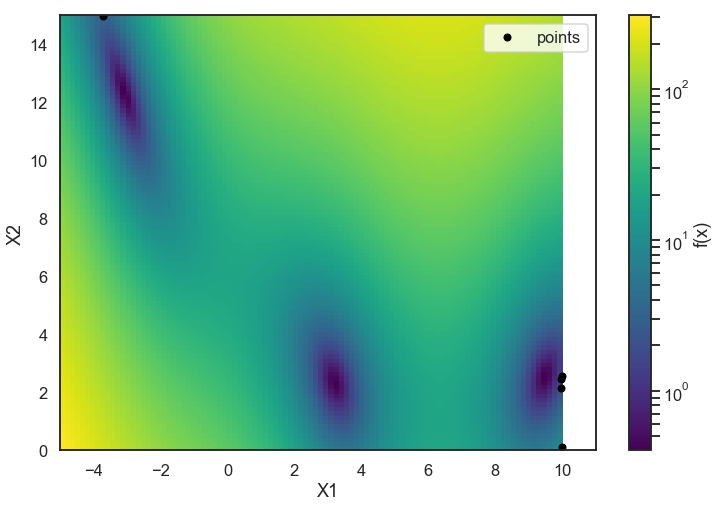

In [49]:
plot_branin_with_points(np.array(r))

In [50]:
opt.base_estimator_

LastLayerBayesianDeepNetRegressor(batch_size=50, lr_intercept=False,
                 n_units_1=50, n_units_2=50, n_units_3=50,
                 normalize_input=False, normalize_output=False,
                 normalize_output_lr=False, num_epochs=3000,
                 random_state=843828734)

In [51]:
model = opt.models[-1]

In [52]:
x1_values = np.linspace(-5, 10, 100)
x2_values = np.linspace(0, 15, 100)
x_ax, y_ax = np.meshgrid(x1_values, x2_values)
X_grid = np.zeros(shape = (x_ax.ravel().shape[0], 2))
X_grid[:,0] = x_ax.ravel()
X_grid[:,1] = y_ax.ravel()

In [53]:
x_model = opt.space.transform(X_grid.tolist())

In [54]:
y_pred, sigma = model.predict(x_model, return_std=True)

In [55]:
def plot_branin_pred(y_pred, x1_values, x2_values):
    fig, ax = plt.subplots(figsize = (12,8))
    fx = np.reshape(y_pred, (100, 100))
    cm = ax.pcolormesh(x1_values, x2_values, fx,
                       norm=LogNorm(vmin=2, 
                                    vmax=fx.max()))

    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    ax.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("m(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])
    
    
def plot_branin_var(sigma, x1_values, x2_values):
    fig, ax = plt.subplots(figsize = (12,8))
    fx = np.reshape(sigma, (100, 100))
    cm = ax.pcolormesh(x1_values, x2_values, fx,
                       norm=LogNorm(vmin=fx.min(), 
                                    vmax=fx.max()))

    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    ax.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("sigma(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])

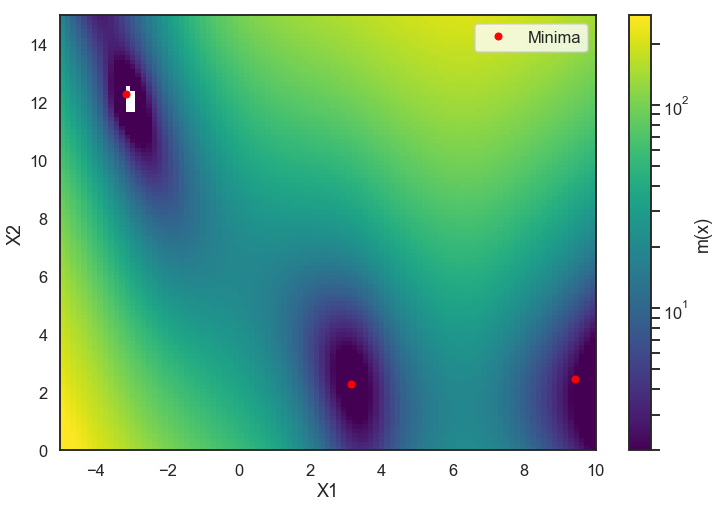

In [56]:
plot_branin_pred(y_pred, x1_values, x2_values)

In [ ]:
plot_branin_var(sigma, x1_values, x2_values)

In [ ]:
x1_values

In [ ]:
opt.Xspace.shape